In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE, RFECV

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Step 1: Reading the data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
## Let's check for the datatypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Since the Id column contains only the index and not any useful information, we can drop this column first

In [9]:
# Dropping the column
df = df.drop(['Id'],axis =1)

In [10]:
# Checking percentage of null values in decreasing order
round(100 * df.isnull().sum().sort_values(ascending = False)/len(df.index),2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageCond        5.55
GarageFinish      5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
RoofMatl          0.00
Exterior1st       0.00
RoofStyle         0.00
ExterQual         0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning   

#### We see that the PoolQC column has a lot of missing values, let's drop this column

In [11]:
## Checking the PoolQC column
df[~df.PoolQC.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


#### It looks like Pool quality is not adding much value since there may be case that the property do not have pool

In [12]:
# Dropping the column
df = df.drop(['PoolQC'],axis =1)

In [13]:
# Checking percentage of null values in decreasing order
round(100 * df.isnull().sum().sort_values(ascending = False)/len(df.index),2)

MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
RoofMatl          0.00
Exterior1st       0.00
RoofStyle         0.00
ExterQual         0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
BsmtFinSF1 

In [14]:
### Let's check the MiscFeature column
print(df[~df.MiscFeature.isnull()].MiscFeature.unique())
df[~df.MiscFeature.isnull()].MiscFeature

['Shed' 'Gar2' 'Othr' 'TenC']


5       Shed
7       Shed
16      Shed
17      Shed
51      Shed
84      Shed
95      Shed
98      Shed
99      Shed
106     Shed
214     Shed
249     Shed
250     Shed
335     Shed
338     Shed
346     Gar2
392     Shed
439     Shed
499     Shed
502     Shed
510     Shed
539     Shed
589     Shed
611     Shed
626     Shed
634     Shed
705     Othr
725     Shed
733     Shed
760     Shed
766     Shed
767     Shed
786     Shed
794     Shed
800     Shed
812     Shed
813     Shed
867     Shed
873     Othr
878     Shed
890     Shed
912     Shed
953     Shed
1061    Shed
1076    Shed
1083    Shed
1171    Shed
1200    Shed
1210    Shed
1230    Gar2
1252    Shed
1328    Shed
1386    TenC
1457    Shed
Name: MiscFeature, dtype: object

#### Since not many values are available, we can drop this column

In [15]:
# Dropping the column
df = df.drop(['MiscFeature'],axis =1)

In [16]:
# Checking percentage of null values in decreasing order
round(100 * df.isnull().sum().sort_values(ascending = False)/len(df.index),2)

Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageQual        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
YearBuilt         0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
BsmtFinSF1        0.00
Heating    

#### Let's check for Alley column now

In [17]:
### Let's check the Alley column
print(df[~df.Alley.isnull()].Alley.unique())
df[~df.Alley.isnull()].Alley

['Grvl' 'Pave']


21      Grvl
30      Pave
56      Pave
79      Grvl
87      Pave
92      Grvl
106     Grvl
115     Pave
164     Pave
204     Grvl
217     Grvl
246     Grvl
264     Grvl
281     Pave
285     Pave
291     Grvl
297     Pave
307     Grvl
314     Grvl
328     Pave
361     Pave
380     Pave
381     Pave
390     Grvl
413     Grvl
425     Grvl
439     Grvl
456     Grvl
458     Grvl
482     Pave
497     Pave
505     Grvl
520     Grvl
525     Pave
578     Pave
579     Grvl
596     Grvl
603     Pave
620     Grvl
630     Grvl
635     Pave
653     Grvl
676     Grvl
681     Pave
699     Pave
711     Pave
716     Grvl
729     Grvl
740     Grvl
747     Pave
750     Grvl
755     Pave
758     Pave
784     Grvl
814     Grvl
821     Pave
829     Pave
831     Pave
836     Pave
841     Grvl
844     Grvl
896     Grvl
914     Pave
977     Pave
991     Grvl
1062    Grvl
1076    Grvl
1089    Pave
1091    Pave
1129    Grvl
1172    Pave
1177    Grvl
1183    Grvl
1191    Pave
1192    Grvl
1248    Grvl
1263    Pave

#### Since not many values are available, we can drop this column

In [18]:
# Dropping the column
df = df.drop(['Alley'],axis =1)

In [19]:
# Checking percentage of null values in decreasing order
round(100 * df.isnull().sum().sort_values(ascending = False)/len(df.index),2)

Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
YearBuilt         0.00
Exterior2nd       0.00
Exterior1st       0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
RoofMatl          0.00
RoofStyle         0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
BsmtFinSF1        0.00
HeatingQC         0.00
BsmtFinSF2 

#### Checking for Fence column

In [20]:
### Let's check the Fence column
print(df[~df.Fence.isnull()].Fence.unique())
df[~df.Fence.isnull()].Fence

['MnPrv' 'GdWo' 'GdPrv' 'MnWw']


5       MnPrv
14       GdWo
15      GdPrv
19      MnPrv
21      GdPrv
        ...  
1436     GdWo
1438    MnPrv
1448     GdWo
1456    MnPrv
1457    GdPrv
Name: Fence, Length: 281, dtype: object

#### Since not many values are available, we can drop this column

In [21]:
# Dropping the column
df = df.drop(['Fence'],axis =1)

In [22]:
# Checking percentage of null values in decreasing order
round(100 * df.isnull().sum().sort_values(ascending = False)/len(df.index),2)

FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
YearBuilt         0.00
Exterior2nd       0.00
Exterior1st       0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
RoofMatl          0.00
RoofStyle         0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2        0.00
EnclosedPor

#### Crating function to check columns with more than 0% missing values

In [23]:
# Function to check more than 0% missing data
def missing_values_more_than_zero(data):
    lst_cols = []
    per = round(100 * data.isnull().sum().sort_values(ascending = False)/len(data.index),2)
    for i,j in per.iteritems():
        if j > 0.0:
            lst_cols.append(i)
    return round(100 * data[lst_cols].isnull().sum().sort_values(ascending = False)/len(data[lst_cols].index),2)

In [24]:
## Checking the missing values
missing_values_more_than_zero(df)

FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [25]:
### Let's check the FireplaceQu column
print(df[~df.FireplaceQu.isnull()].FireplaceQu.unique())
df[~df.FireplaceQu.isnull()].FireplaceQu

['TA' 'Gd' 'Fa' 'Ex' 'Po']


1       TA
2       TA
3       Gd
4       TA
6       Gd
        ..
1447    TA
1451    Gd
1455    TA
1456    TA
1457    Gd
Name: FireplaceQu, Length: 770, dtype: object

#### Since only 47% data is missing, let's do a value counts first

In [26]:
# Doing the value counts
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### The data dictionary says NA as an option for FireplaceQu, also the count of missing is almost 50%, we can replace missing with NA

In [27]:
## Checking null values
df[df.FireplaceQu.isnull()].FireplaceQu

0       NaN
5       NaN
10      NaN
12      NaN
15      NaN
       ... 
1452    NaN
1453    NaN
1454    NaN
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 690, dtype: object

In [28]:
## Imputing missing values with NA
df.FireplaceQu = df.FireplaceQu.replace(np.nan,'NA')

In [29]:
df[df.FireplaceQu.isnull()].FireplaceQu

Series([], Name: FireplaceQu, dtype: object)

In [30]:
# Doing the value counts
df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [31]:
## Checking for missing values
missing_values_more_than_zero(df)

LotFrontage     17.74
GarageQual       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

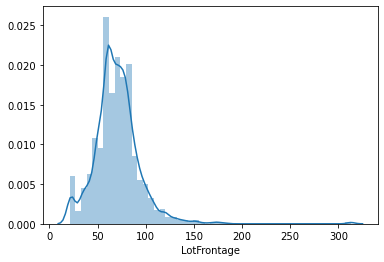

In [32]:
### Checking distribution
sns.distplot(df.LotFrontage)
plt.show()

In [33]:
## Describing the column
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

### The data is skewed to the right, we can impute the NaN's with median as median will be better indicator for this data

In [34]:
## Imputing with median
df.LotFrontage.fillna(df.LotFrontage.median(), inplace = True)

In [35]:
# Cross checking null values
df[df.LotFrontage.isnull()].LotFrontage

Series([], Name: LotFrontage, dtype: float64)

In [36]:
## Checking for missing values
missing_values_more_than_zero(df)

GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
GarageYrBlt     5.55
GarageType      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [37]:
## The columns related to Garage seems to have same percentage of missing values, lets' observe these together
df.loc[:,['GarageQual','GarageCond','GarageFinish','GarageYrBlt','GarageType']]

,GarageQual,GarageCond,GarageFinish,GarageYrBlt,GarageType
0,TA,TA,RFn,2003.0,Attchd
1,TA,TA,RFn,1976.0,Attchd
2,TA,TA,RFn,2001.0,Attchd
3,TA,TA,Unf,1998.0,Detchd
4,TA,TA,RFn,2000.0,Attchd
...,...,...,...,...,...
1455,TA,TA,RFn,1999.0,Attchd
1456,TA,TA,Unf,1978.0,Attchd
1457,TA,TA,RFn,1941.0,Attchd
1458,TA,TA,Unf,1950.0,Attchd


#### All the columns except GarageYrBlt are categorical, let's check all except GarageYrBlt

In [38]:
### Checking garage related columns
garage_columns= ['GarageQual','GarageCond','GarageFinish','GarageType']
df[df[garage_columns].isnull().any(axis=1)][garage_columns]

,GarageQual,GarageCond,GarageFinish,GarageType
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN


#### We can draw graphs for these and decide on what can be done next, before that we will write a fucntion to draw such plots

In [39]:
### Function to draw countplot
def cat_plot(column, data):
    plt.title('Count of {}'.format(column), fontsize = 16)
    ax = sns.countplot(x = column, data = data)
    axis_font = {'size':'16'}
    plt.xlabel(column, **axis_font)
    plt.ylabel("Count", **axis_font)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.tight_layout(pad=5.0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

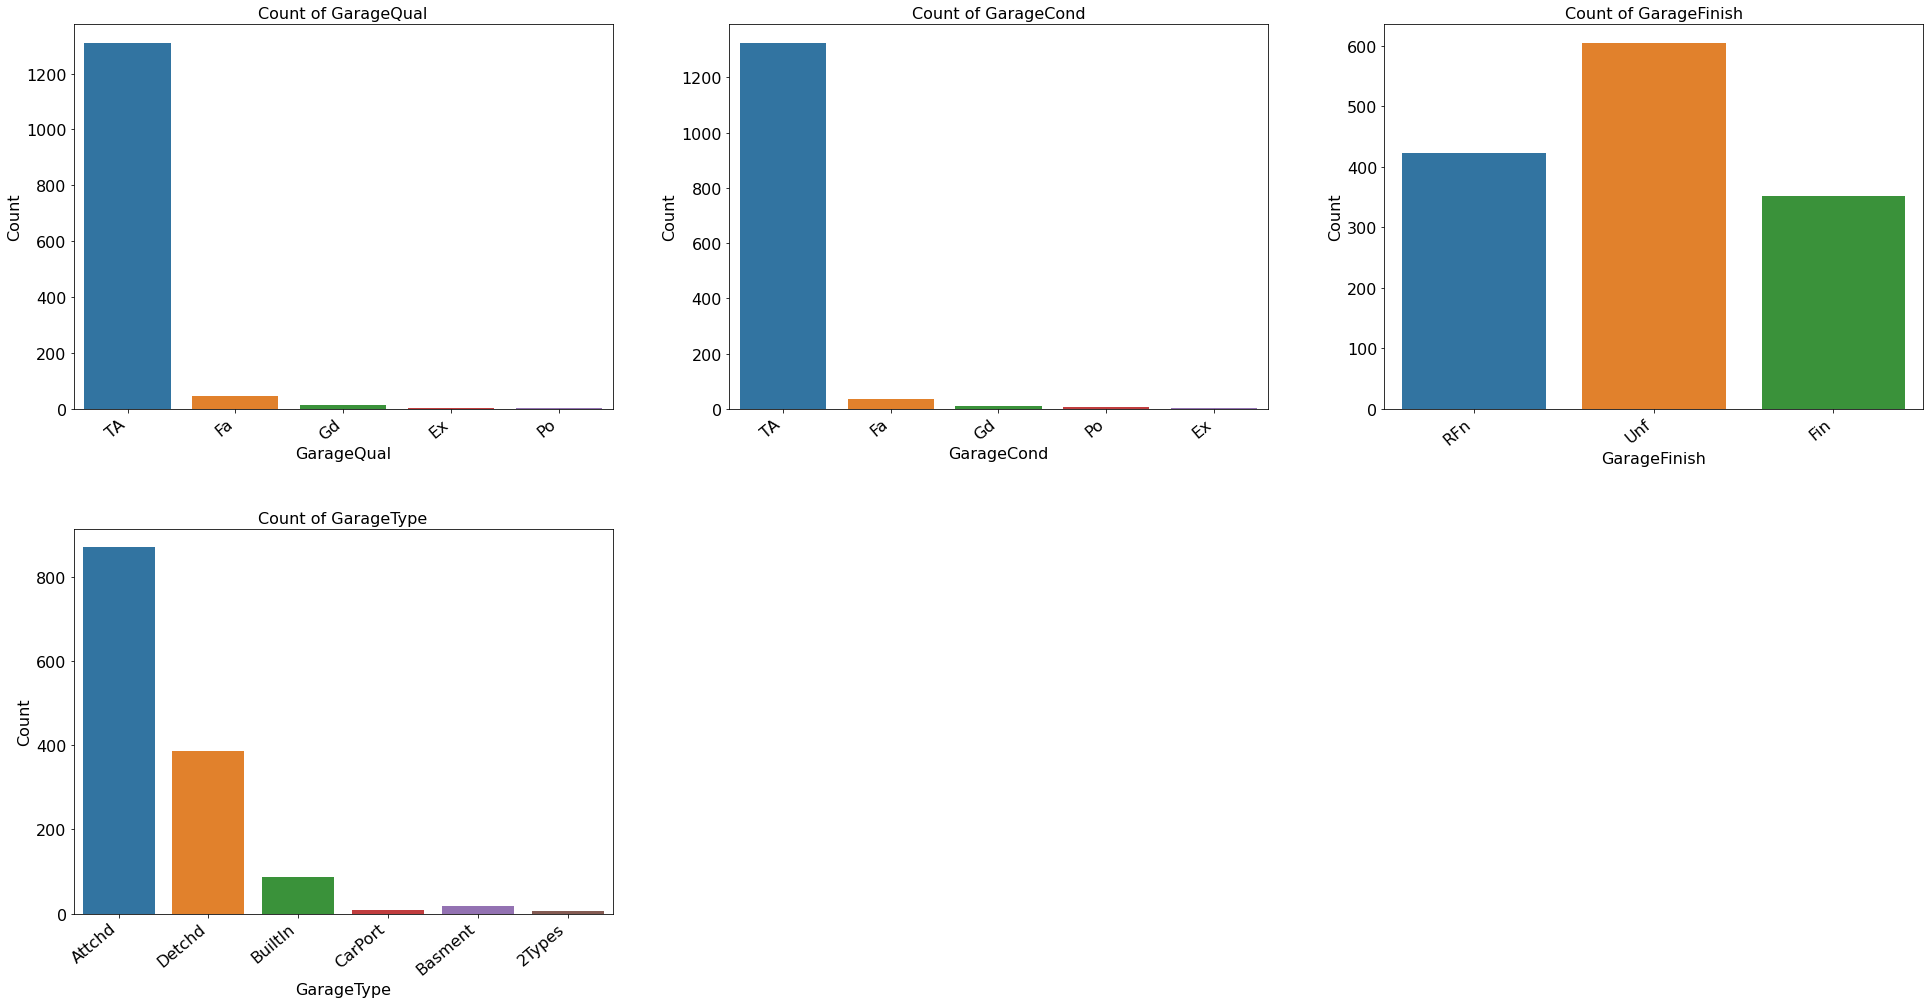

In [40]:
# Visualizing the data
plt.figure(figsize = (28,21))
for i,j in enumerate(df[garage_columns]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

#### The data dictionary says NA as an option for all of these columns, we can replace missing with NA

In [41]:
### Imputing null values with NA
for col in garage_columns:
    df[col] = df[col].replace(np.nan,'NA')

In [42]:
df.shape

(1460, 76)

In [43]:
### Checking missing values again
missing_values_more_than_zero(df)

GarageYrBlt     5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

#### We still need to handle GarageYrBlt column, let's visualise it

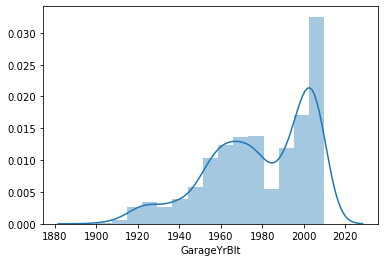

In [44]:
## Checking the distribution
sns.distplot(df.GarageYrBlt)
plt.show()

#### Let's also describe this column

In [45]:
# Describing the column
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

#### There is not much difference in median and mean value. Also the mean value is coming as decimal value, which does not make sense for year column, so we will impute with median

In [46]:
## Imputing with median
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace = True)

In [47]:
### Checking missing values again
missing_values_more_than_zero(df)

BsmtExposure    2.60
BsmtFinType2    2.60
BsmtCond        2.53
BsmtFinType1    2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [48]:
## Checking basement related columns
df.loc[:,['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1' , 'BsmtQual']]

,BsmtExposure,BsmtFinType2,BsmtCond,BsmtFinType1,BsmtQual
0,No,Unf,TA,GLQ,Gd
1,Gd,Unf,TA,ALQ,Gd
2,Mn,Unf,TA,GLQ,Gd
3,No,Unf,Gd,ALQ,TA
4,Av,Unf,TA,GLQ,Gd
...,...,...,...,...,...
1455,No,Unf,TA,Unf,Gd
1456,No,Rec,TA,ALQ,Gd
1457,No,Unf,Gd,GLQ,TA
1458,Mn,Rec,TA,GLQ,TA


#### All the columns are categorical, let's check all 

In [49]:
bsmt_columns= ['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1' , 'BsmtQual']
df[df[bsmt_columns].isnull().any(axis=1)][bsmt_columns]

,BsmtExposure,BsmtFinType2,BsmtCond,BsmtFinType1,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,No,NaN,TA,GLQ,Gd
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


#### We can draw graphs for these and decide on what can be done next, before that we will write a fucntion to draw such plots

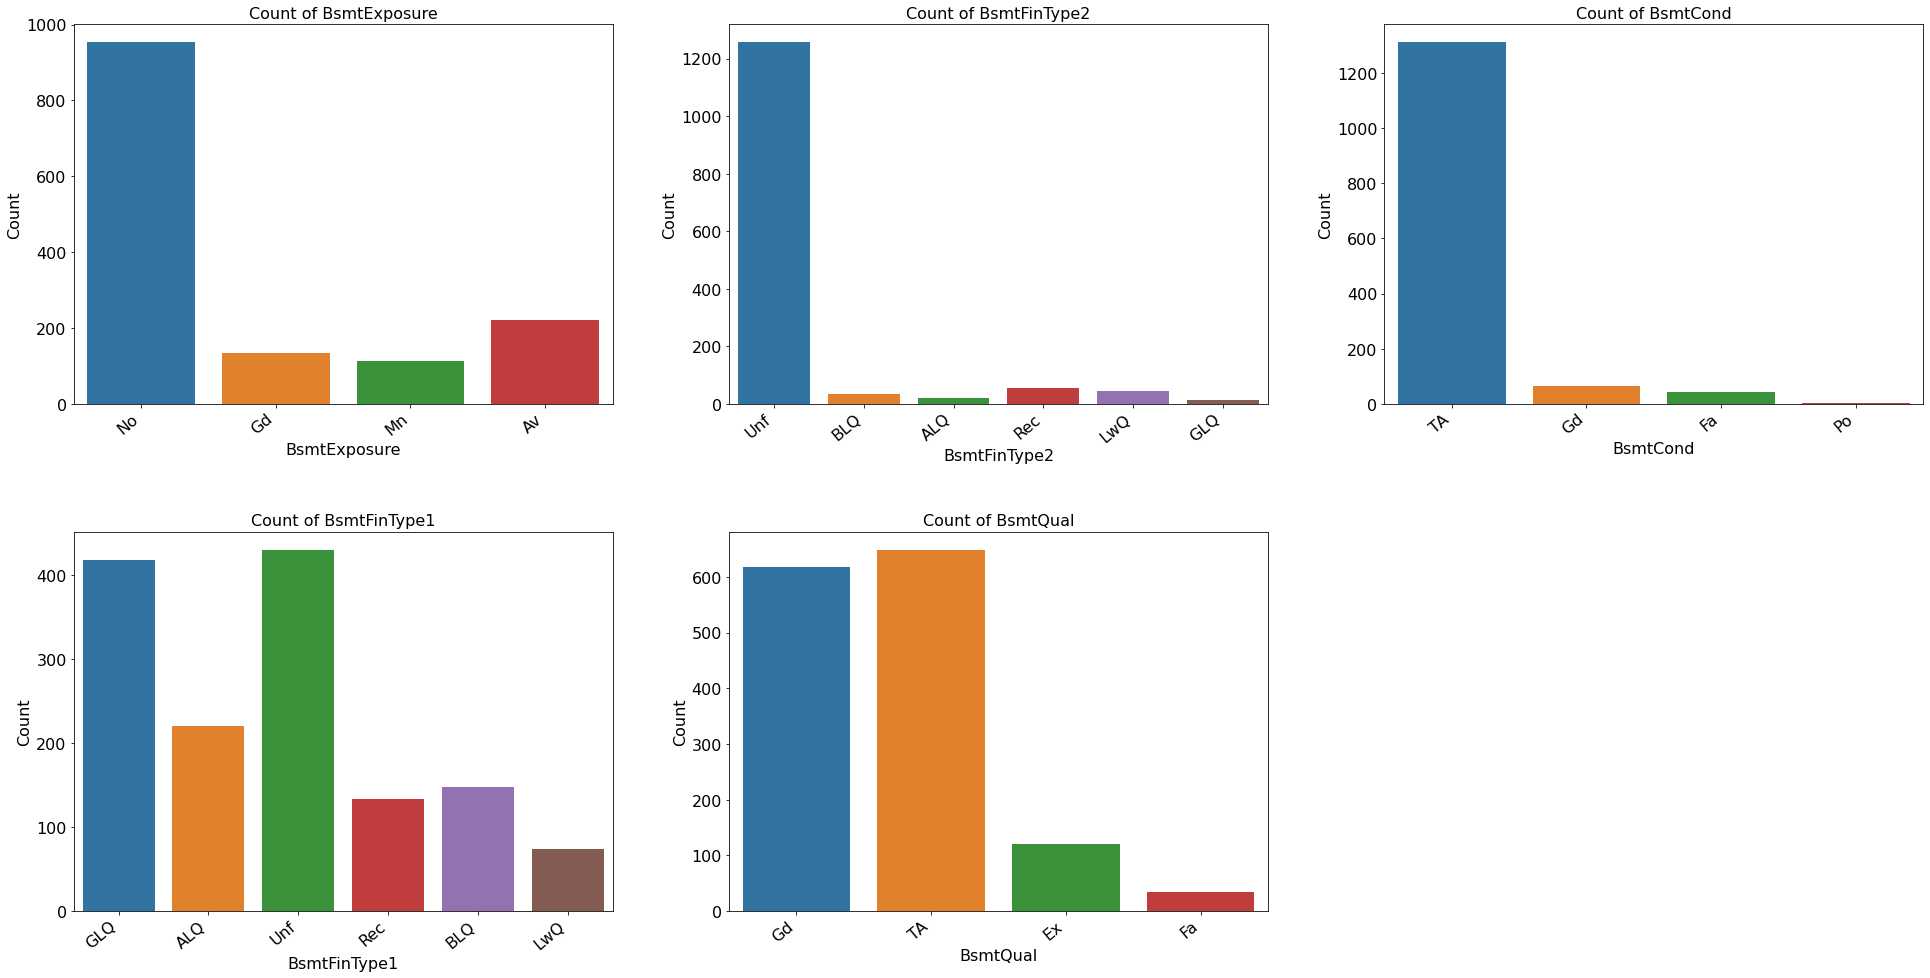

In [50]:
# Visualizing the data
plt.figure(figsize = (28,21))
for i,j in enumerate(df[bsmt_columns]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

#### The data dictionary says NA as an option for all of these columns, we can replace missing with NA

In [51]:
## Replacing null with NA for basement columns
for col in bsmt_columns:
    df[col] = df[col].replace(np.nan,'NA')

In [52]:
### Checking missing values again
missing_values_more_than_zero(df)

MasVnrArea    0.55
MasVnrType    0.55
Electrical    0.07
dtype: float64

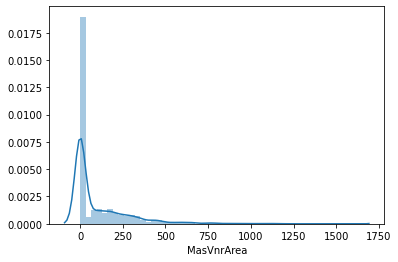

In [53]:
## Checking for MasVnrArea column

sns.distplot(df.MasVnrArea)
plt.show()

In [54]:
## Describing the column
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [55]:
## From the plot and the description, we see that most of the values are concentrated around 0, also the median is 0, se we can do imputation here
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace = True)

In [56]:
### Checking missing values again
missing_values_more_than_zero(df)

MasVnrType    0.55
Electrical    0.07
dtype: float64

In [57]:
# Checking the column
df[df.MasVnrType.isnull()].MasVnrType

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [58]:
## Checking for MasVnrType column
df.MasVnrType.mode()

0    None
dtype: object

In [59]:
### Since most of the values are null, we can impute with mode
df.MasVnrType.mode().iloc[0]

'None'

In [60]:
# Replacing with mode
df.MasVnrType.fillna(df.MasVnrType.mode().iloc[0], inplace = True)

In [61]:
### Checking missing values again
missing_values_more_than_zero(df)

Electrical    0.07
dtype: float64

In [62]:
## Checking for Electrical column
df.Electrical.mode()

0    SBrkr
dtype: object

In [63]:
## Imputing the values
df.Electrical.fillna(df.Electrical.mode().iloc[0], inplace = True)

In [64]:
#### CHecking for missing values again, there should be 0 missing values
missing_values_more_than_zero(df)

Series([], dtype: float64)

#### Now, there is no missing data in any column

#### Let's check the shape, the columns and the top 5 records

In [65]:
print(df.shape)
print(df.columns)
df.head()

(1460, 76)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#### Now, we have 1460 records and 76 columns. Our data understanding process is complete at this point.

#### Now, the dataframe is clean, let's see the percentage of retained rows, we had __1460__ rows initially

In [66]:
## Check the percentage of data retained
round(100* df.shape[0]/1460,2)

100.0

#### We have retained all the data

#### Looking at the data dictionary we have some columns which are given as numerical type but needs to be converted to categorical type. These columns are MSSubClass, OverallQual and OverallCond

In [67]:
## Let's keep these special columns in a list, and obeseve the data for these
spcl_columns = ['MSSubClass', 'OverallQual', 'OverallCond']
df[spcl_columns]

,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5
3,70,7,5
4,60,8,5
...,...,...,...
1455,60,6,5
1456,20,6,6
1457,70,7,9
1458,20,5,6


#### Let's create dictionaries that will help us to do the conversion from numeical to categorical datatype

In [68]:
sub_dict = {20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

In [69]:
over_dict = {10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'}

In [70]:
#changing numerical variables to categorical variables
df['MSSubClass'] = df['MSSubClass'].replace(sub_dict)
df['OverallQual'] = df['OverallQual'].replace(over_dict)
df['OverallCond'] = df['OverallCond'].replace(over_dict)

In [71]:
### Checking our special columns after conversion
df[spcl_columns]

,MSSubClass,OverallQual,OverallCond
0,2-STORY 1946 & NEWER,Good,Average
1,1-STORY 1946 & NEWER ALL STYLES,Above Average,Very Good
2,2-STORY 1946 & NEWER,Good,Average
3,2-STORY 1945 & OLDER,Good,Average
4,2-STORY 1946 & NEWER,Very Good,Average
...,...,...,...
1455,2-STORY 1946 & NEWER,Above Average,Average
1456,1-STORY 1946 & NEWER ALL STYLES,Above Average,Above Average
1457,2-STORY 1945 & OLDER,Good,Excellent
1458,1-STORY 1946 & NEWER ALL STYLES,Average,Above Average


#### We have succesfully done the conversion, now, let's take a look at the dependent column SalePrice

In [72]:
# Checking salesprice
df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

#### Let's describe the data

In [73]:
# Describing the data
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Let's visualize by drawing a plot for the same

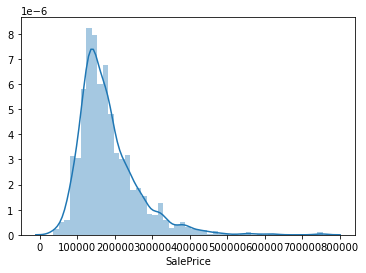

In [74]:
## Visualizing the data
sns.distplot(df.SalePrice)
plt.show()

In [75]:
# We can observe that the data is skewed highly and not a normal distribution, we can do the transformation and observe the changes
df['SalePrice']=np.log(df.SalePrice) #tranforming to form normal disribution

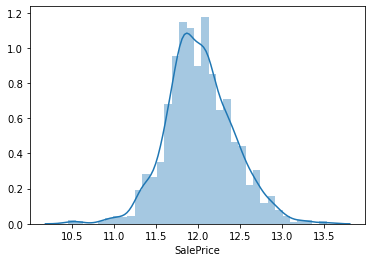

In [76]:
## Visualizing the transformed data
sns.distplot(df.SalePrice)
plt.show()

#### We can observe that the sales price is now normally distributed

#### Let's indentify the binary variables(having values either 0 or 1) and the categorical variables

In [77]:
## We will first describe the dataset which will give us only the numerical cols
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


In [78]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [79]:
## Let's keep the above columns in a variable called num_vars
num_vars = list(df.describe().columns)

In [80]:
## Let's look at num_vars
num_vars

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Step 2: Outlier Analysis

#### Let's check for the outliers in the numerical columns

#### Since we will need to detect and remove outliers, let's cerate a function that will give us the boundry values so that we can remove values beyond boundry

In [81]:
### Function to get boundries for outlier detection
def get_boundries(data, column):
    p_25 = np.percentile(data[column],25)
    p_75 = np.percentile(data[column],75)
    
    ## Inter-quartile range
    iqr = p_75 - p_25

    l_limit = round(p_25 - 1.5 * iqr)
    u_limit = round(p_75 + 1.5 * iqr)
    return (l_limit, u_limit)

#### Visualizing the data for outliers in numerical columns, since there are 34 categorical columns we will visualize these chunks by chunks

In [82]:
from itertools import islice

def chunks(data, n):
    it = iter(data)
    for i in range(0, len(data), n):
        yield {k:data[k] for k in islice(it, n)}

In [83]:
## Creating a dictionary for numerical variables
group_data = {idx:col for idx,col in enumerate(num_vars)}

In [84]:
## Checking for slots
for item in chunks(group_data, 7):
    print(item)

{0: 'LotFrontage', 1: 'LotArea', 2: 'YearBuilt', 3: 'YearRemodAdd', 4: 'MasVnrArea', 5: 'BsmtFinSF1', 6: 'BsmtFinSF2'}
{7: 'BsmtUnfSF', 8: 'TotalBsmtSF', 9: '1stFlrSF', 10: '2ndFlrSF', 11: 'LowQualFinSF', 12: 'GrLivArea', 13: 'BsmtFullBath'}
{14: 'BsmtHalfBath', 15: 'FullBath', 16: 'HalfBath', 17: 'BedroomAbvGr', 18: 'KitchenAbvGr', 19: 'TotRmsAbvGrd', 20: 'Fireplaces'}
{21: 'GarageYrBlt', 22: 'GarageCars', 23: 'GarageArea', 24: 'WoodDeckSF', 25: 'OpenPorchSF', 26: 'EnclosedPorch', 27: '3SsnPorch'}
{28: 'ScreenPorch', 29: 'PoolArea', 30: 'MiscVal', 31: 'MoSold', 32: 'YrSold', 33: 'SalePrice'}


In [85]:
## Assigning data to different groups
group_a,group_b,group_c,group_d,group_e = chunks(group_data,7)

In [86]:
### We will remove items from dictionary that will be dropped, we will create function to do that
def rem_col(data, to_del):
    for key, value in data.items():
        if value == to_del:
            del data[key]
            break

In [87]:
## Let's check the data for first slot
df.loc[:,group_a.values()]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2
0,65.0,8450,2003,2003,196.0,706,0
1,80.0,9600,1976,1976,0.0,978,0
2,68.0,11250,2001,2002,162.0,486,0
3,60.0,9550,1915,1970,0.0,216,0
4,84.0,14260,2000,2000,350.0,655,0
...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0
1456,85.0,13175,1978,1988,119.0,790,163
1457,66.0,9042,1941,2006,0.0,275,0
1458,68.0,9717,1950,1996,0.0,49,1029


#### Let's create a function to draw box plot for outlier detection

In [88]:
## Function to draw boxplot
def detect_outliers(data,col):
    ## Drawing the boxplot
    sns.boxplot(data[col])

#### Visualizing the data for the first group

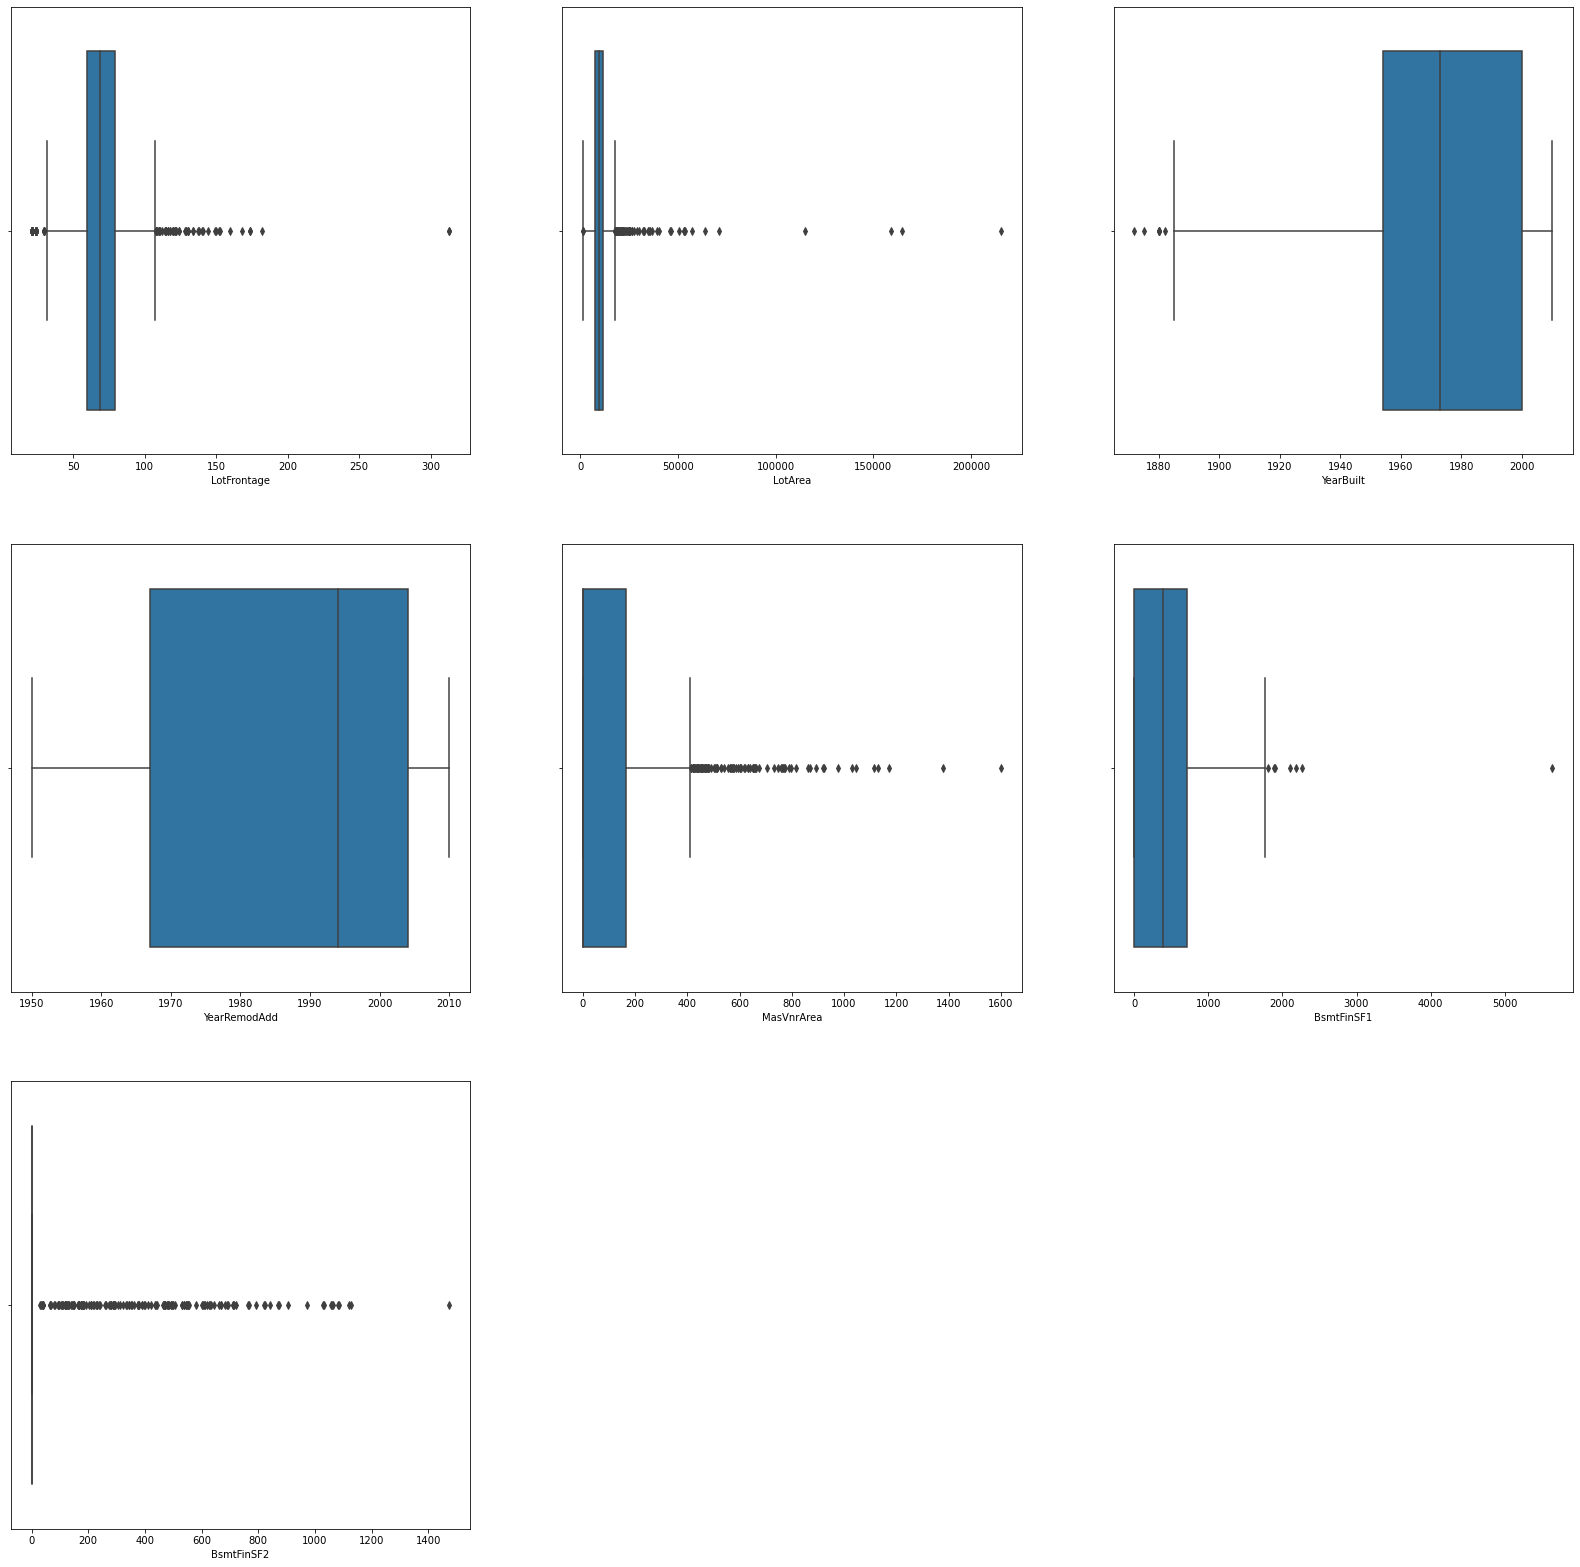

In [89]:
# Visualizing the data for first group
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,group_a.values()]):
    plt.subplot(3,3,i+1)
    detect_outliers(df,j)
plt.show()

#### Let's get boundries for outliers in LotFrontage column

In [90]:
## Finding lower and upper fence for outlers in LotFrontage column
lower_LotFrontage , upper_LotFrontage = get_boundries(df,'LotFrontage')

In [91]:
## Printing the values
print(lower_LotFrontage)
print(upper_LotFrontage)

32.0
108.0


In [92]:
# Checking statistics for LotFrontage column
df.LotFrontage.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1])

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
5%         35.950000
10%        49.000000
25%        60.000000
50%        69.000000
75%        79.000000
90%        92.000000
95%       104.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### Visually we can see that there are outliers beyond the lower as well as upper fence

In [93]:
## Checking outlier values
df[df.LotFrontage <= lower_LotFrontage].LotFrontage.count()

53

In [94]:
df[df.LotFrontage >= upper_LotFrontage].LotFrontage.count()

58

#### We can cap the lower outlier values at 5% (35.95) and higher outlier values at 95% (104)

#### Capping the values at 5%

In [95]:
# Taking the 5th percentile in a variable
per_5_LotFrontage = round(df.LotFrontage.quantile(0.05))

#### Capping the values at 95%

In [96]:
# Taking the 5th percentile in a variable
per_95_LotFrontage = round(df.LotFrontage.quantile(0.95))

#### Replacing lower outliers with 5th percentile value to treat the outliers in __LotFrontage__

In [97]:
### Assigning nan to outlier values
df.loc[df.LotFrontage <= lower_LotFrontage, 'LotFrontage'] = np.nan

In [98]:
# Replacing above avalues with 5th percentile
df.fillna(per_5_LotFrontage,inplace=True)

#### Replacing upper outliers with 95th percentile value to treat the outliers in __LotFrontage__

In [99]:
### Assigning nan to outlier values
df.loc[df.LotFrontage >= upper_LotFrontage, 'LotFrontage'] = np.nan

In [100]:
# Replacing above avalues with 5th percentile
df.LotFrontage.fillna(per_95_LotFrontage,inplace=True)

#### Let's get boundries for outliers in LotArea column

In [101]:
## Finding lower and upper fence for outlers in LotArea column
lower_LotArea , upper_LotArea = get_boundries(df,'LotArea')

In [102]:
## Printing the values
print(lower_LotArea)
print(upper_LotArea)

1482.0
17674.0


In [103]:
# Checking statistics for LotArea column
df.LotArea.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1])

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
5%         3311.700000
10%        5000.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
90%       14381.700000
95%       17401.150000
100%     215245.000000
max      215245.000000
Name: LotArea, dtype: float64

#### Visually we can see that there are outliers beyond the lower as well as upper fence

In [104]:
## Checking outlier values
df[df.LotArea <= lower_LotArea].LotArea.count()

2

In [105]:
df[df.LotArea >= upper_LotArea].LotArea.count()

67

#### We can cap the lower outlier values at 5% (3311.70) and higher outlier values at 95% (17401.15)

In [106]:
# Taking the 5th percentile in a variable
per_5_LotArea = round(df.LotArea.quantile(0.05))

In [107]:
# Taking the 95th percentile in a variable
per_95_LotArea = round(df.LotArea.quantile(0.95))

#### Replacing lower outliers with 5th percentile value to treat the outliers in __LotArea__

In [108]:
### Assigning nan to outlier values
df.loc[df.LotArea <= lower_LotArea, 'LotArea'] = np.nan

In [109]:
# Replacing above avalues with 5th percentile
df.fillna(per_5_LotArea,inplace=True)

#### Replacing upper outliers with 95th percentile value to treat the outliers in __LotArea__

In [110]:
### Assigning nan to outlier values
df.loc[df.LotArea >= upper_LotArea, 'LotArea'] = np.nan

In [111]:
# Replacing above avalues with 5th percentile
df.LotArea.fillna(per_95_LotArea,inplace=True)

#### Next column with outliers is YearBuilt, since it indicates the year in which the building was made, its ok to keep this column as is

#### Let's get boundries for outliers in MasVnrArea column

In [112]:
## Finding lower and upper fence for outlers in MasVnrArea column
lower_MasVnrArea , upper_MasVnrArea = get_boundries(df,'MasVnrArea')

In [113]:
## Printing the values
print(lower_MasVnrArea)
print(upper_MasVnrArea)

-246.0
411.0


In [114]:
# Checking statistics for MasVnrArea column
df.MasVnrArea.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.93, 0.95, 0.99, 1])

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
90%       335.000000
93%       390.610000
95%       456.000000
99%       791.280000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

#### We can see that there are outliers beyond the upper fence only in this case

In [115]:
## Checking outlier values
df[df.MasVnrArea <= lower_MasVnrArea].MasVnrArea.count()

0

In [116]:
df[df.MasVnrArea >= upper_MasVnrArea].MasVnrArea.count()

98

#### There is no outlier in the lowers side , but some on the right side

#### We can cap the upper outlier values at 93% (390.61)

In [117]:
# Taking the 99th percentile in a variable
per_93_MasVnrArea = round(df.MasVnrArea.quantile(0.93))

In [118]:
print(per_93_MasVnrArea)

391.0


In [119]:
# Replacing above avalues with 5th percentile
df.fillna(per_93_MasVnrArea,inplace=True)

#### Replacing upper outliers with 93rd percentile value to treat the outliers in __MasVnrArea__

In [120]:
### Assigning nan to outlier values
df.loc[df.MasVnrArea >= upper_MasVnrArea, 'MasVnrArea'] = np.nan

In [121]:
# Replacing above avalues with 99th percentile
df.MasVnrArea.fillna(per_93_MasVnrArea,inplace=True)

#### Let's get boundries for outliers in BsmtFinSF1 column

In [122]:
## Finding lower and upper fence for outlers in BsmtFinSF1 column
lower_BsmtFinSF1 , upper_BsmtFinSF1 = get_boundries(df,'BsmtFinSF1')

In [123]:
## Printing the values
print(lower_BsmtFinSF1)
print(upper_BsmtFinSF1)

-1068.0
1781.0


In [124]:
# Checking statistics for BsmtFinSF1 column
df.BsmtFinSF1.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95,0.99, 1])

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
95%      1274.000000
99%      1572.410000
100%     5644.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

#### We can see that there are outliers beyond the upper fence only in this case

In [125]:
## Checking outlier values
df[df.BsmtFinSF1 <= lower_BsmtFinSF1].BsmtFinSF1.count()

0

In [126]:
df[df.BsmtFinSF1 >= upper_BsmtFinSF1].BsmtFinSF1.count()

7

#### There is no outlier in the lower side , but some on the right side

#### We can cap the upper outlier values at 99% (1572.41)

In [127]:
# Taking the 99th percentile in a variable
per_99_BsmtFinSF1 = round(df.BsmtFinSF1.quantile(0.99))

In [128]:
print(per_99_BsmtFinSF1)

1572.0


In [129]:
# Replacing above avalues with 99th percentile
df.fillna(per_99_BsmtFinSF1,inplace=True)

#### Replacing upper outliers with 99th percentile value to treat the outliers in __BsmtFinSF1__

In [130]:
### Assigning nan to outlier values
df.loc[df.BsmtFinSF1 >= upper_BsmtFinSF1, 'BsmtFinSF1'] = np.nan

#### Replacing upper outliers with 99th percentile value to treat the outliers in __BsmtFinSF1__

In [131]:
# Replacing above values with 99th percentile
df.BsmtFinSF1.fillna(per_99_BsmtFinSF1,inplace=True)

#### Let's get boundries for outliers in BsmtFinSF2 column

In [132]:
## Finding lower and upper fence for outlers in BsmtFinSF2 column
lower_BsmtFinSF2 , upper_BsmtFinSF2 = get_boundries(df,'BsmtFinSF2')

In [133]:
## Printing the values
print(lower_BsmtFinSF2)
print(upper_BsmtFinSF2)

0.0
0.0


In [134]:
# Checking statistics for BsmtFinSF2 column
df.BsmtFinSF2.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95,0.99, 1])

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
100%     1474.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

#### Let's look at outliers on both sides

In [135]:
## Checking outlier values
df[df.BsmtFinSF2 <= lower_BsmtFinSF2].BsmtFinSF2.count()

1293

In [136]:
df[df.BsmtFinSF2 >= upper_BsmtFinSF2].BsmtFinSF2.count()

1460

In [137]:
# Looks like 0 is the boundary for both sides and some values are 0
df[df.BsmtFinSF2 > 0].BsmtFinSF2.count()

167

#### We see that most of the values are 0

#### This column is highly skewed at 0 and its safe to drop this column

In [138]:
df = df.drop(['BsmtFinSF2'],axis =1)
rem_col(group_a,'BsmtFinSF2')
num_vars.remove('BsmtFinSF2')

#### Visualizing the data for the second group

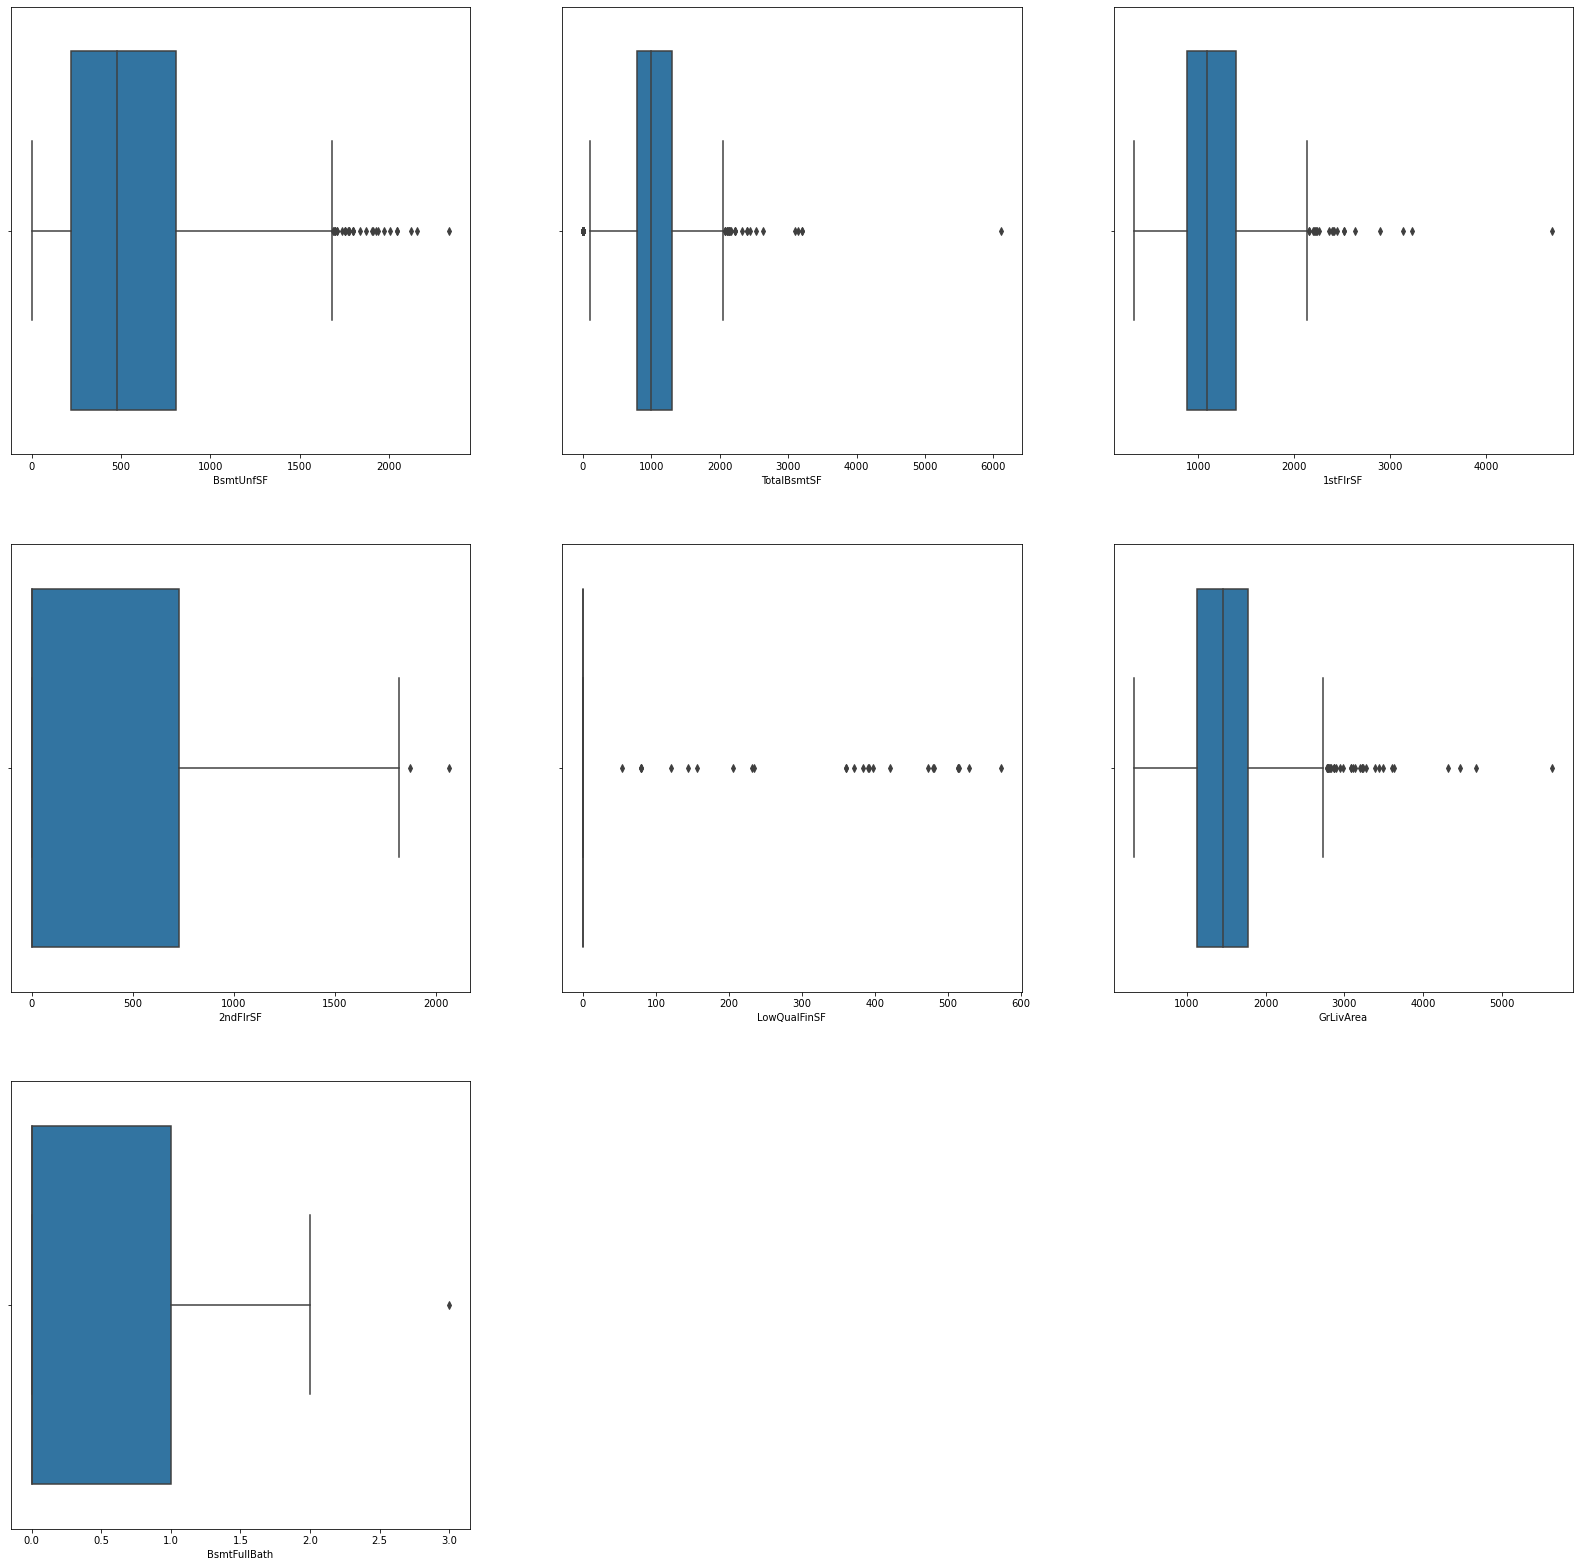

In [139]:
# Visualizing the data for second group
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,group_b.values()]):
    plt.subplot(3,3,i+1)
    detect_outliers(df,j)
plt.show()

#### Let's get boundries for outliers in BsmtUnfSF column

In [140]:
## Finding lower and upper fence for outlers in BsmtUnfSF column
lower_BsmtUnfSF , upper_BsmtUnfSF = get_boundries(df,'BsmtUnfSF')

In [141]:
## Printing the values
print(lower_BsmtUnfSF)
print(upper_BsmtUnfSF)

-654.0
1686.0


In [142]:
# Checking statistics for BsmtUnfSF column
df.BsmtUnfSF.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1])

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
5%          0.000000
10%        74.900000
25%       223.000000
50%       477.500000
75%       808.000000
90%      1232.000000
95%      1468.000000
100%     2336.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

#### Visually we can see that there are outliers beyond the upper fence

In [143]:
## Checking outlier values
df[df.BsmtUnfSF <= lower_BsmtUnfSF].BsmtUnfSF.count()

0

In [144]:
df[df.BsmtUnfSF >= upper_BsmtUnfSF].BsmtUnfSF.count()


29

#### We can cap the higher outlier values at 95% (1468)

#### Capping the values at 95%

In [145]:
# Taking the 95th percentile in a variable
per_95_BsmtUnfSF = round(df.BsmtUnfSF.quantile(0.95))

#### Replacing upper outliers with 95th percentile value to treat the outliers in __BsmtUnfSF__

In [146]:
### Assigning nan to outlier values
df.loc[df.BsmtUnfSF >= upper_BsmtUnfSF, 'BsmtUnfSF'] = np.nan

In [147]:
# Replacing above avalues with 95th percentile
df.BsmtUnfSF.fillna(per_95_BsmtUnfSF,inplace=True)

#### Let's get boundries for outliers in TotalBsmtSF column

In [148]:
## Finding lower and upper fence for outlers in TotalBsmtSF column
lower_TotalBsmtSF , upper_TotalBsmtSF = get_boundries(df,'TotalBsmtSF')

In [149]:
## Printing the values
print(lower_TotalBsmtSF)
print(upper_TotalBsmtSF)

42.0
2052.0


In [150]:
# Checking statistics for TotalBsmtSF column
df.TotalBsmtSF.describe(percentiles = [0.03,0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 1])

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
3%        312.330000
5%        519.300000
10%       636.900000
25%       795.750000
50%       991.500000
75%      1298.250000
90%      1602.200000
95%      1753.000000
97%      1905.460000
100%     6110.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

#### Visually we can see that there are outliers beyond the lower as well as upper fence

In [151]:
## Checking outlier values
df[df.TotalBsmtSF <= lower_TotalBsmtSF].TotalBsmtSF.count()

37

In [152]:
df[df.TotalBsmtSF >= upper_TotalBsmtSF].TotalBsmtSF.count()

24

#### We can cap the lower outlier values at 3% (312.33) and higher outlier values at 97% (1905.46)

In [153]:
# Taking the 3rd percentile in a variable
per_3_TotalBsmtSF = round(df.TotalBsmtSF.quantile(0.03))

In [154]:
# Taking the 97th percentile in a variable
per_97_TotalBsmtSF = round(df.TotalBsmtSF.quantile(0.97))

#### Replacing lower outliers with 3rd percentile value to treat the outliers in __TotalBsmtSF__

In [155]:
### Assigning nan to outlier values
df.loc[df.TotalBsmtSF <= lower_TotalBsmtSF, 'TotalBsmtSF'] = np.nan

In [156]:
# Replacing above avalues with 3rd percentile
df.fillna(per_3_TotalBsmtSF,inplace=True)

#### Replacing upper outliers with 97th percentile value to treat the outliers in __TotalBsmtSF__

In [157]:
### Assigning nan to outlier values
df.loc[df.TotalBsmtSF >= upper_TotalBsmtSF, 'TotalBsmtSF'] = np.nan

In [158]:
# Replacing above avalues with 97th percentile
df.TotalBsmtSF.fillna(per_97_TotalBsmtSF,inplace=True)

#### Let's get boundries for outliers in 1stFlrSF column

In [159]:
## Finding lower and upper fence for outlers in 1stFlrSF column
lower_1stFlrSF , upper_1stFlrSF = get_boundries(df,'1stFlrSF')

In [160]:
## Printing the values
print(lower_1stFlrSF)
print(upper_1stFlrSF)

118.0
2155.0


In [161]:
# Checking statistics for 1stFlrSF column
df['1stFlrSF'].describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95,0.98, 1])

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
5%        672.950000
10%       756.900000
25%       882.000000
50%      1087.000000
75%      1391.250000
90%      1680.000000
95%      1831.250000
98%      2072.280000
100%     4692.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

#### Visually we can see that there are outliers beyond the upper fence only

In [162]:
## Checking outlier values
df[df['1stFlrSF'] <= lower_1stFlrSF]['1stFlrSF'].count()

0

In [163]:
df[df['1stFlrSF'] >= upper_1stFlrSF]['1stFlrSF'].count()

20

#### We can cap the higher outlier values at 98% (2072.28)

#### Capping the values at 98%

In [164]:
# Taking the 5th percentile in a variable
per_98_1stFlrSF = round(df['1stFlrSF'].quantile(0.98))

#### Replacing upper outliers with 98th percentile value to treat the outliers in __1stFlrSF__

In [165]:
### Assigning nan to outlier values
df.loc[df['1stFlrSF'] >= upper_1stFlrSF, '1stFlrSF'] = np.nan

In [166]:
# Replacing above avalues with 5th percentile
df['1stFlrSF'].fillna(per_98_1stFlrSF,inplace=True)

#### The next column with outliers is 2ndFlrSF, we can ignore these as there are very few

#### The next columns with outliers is LowQualFinSF, it is behaving just like the BsmtFinSF2 column, so we can drop this column too

In [167]:
df = df.drop(['LowQualFinSF'],axis =1)
rem_col(group_b,'LowQualFinSF')
num_vars.remove('LowQualFinSF')

#### Let's get boundries for outliers in GrLivArea column

In [168]:
## Finding lower and upper fence for outlers in GrLivArea column
lower_GrLivArea , upper_GrLivArea = get_boundries(df,'GrLivArea')

In [169]:
## Printing the values
print(lower_GrLivArea)
print(upper_GrLivArea)

159.0
2748.0


In [170]:
# Checking statistics for BsmtUnfSF column
df['GrLivArea'].describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95,0.98, 1])

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
5%        848.000000
10%       912.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
90%      2158.300000
95%      2466.100000
98%      2782.380000
100%     5642.000000
max      5642.000000
Name: GrLivArea, dtype: float64

#### Visually we can see that there are outliers beyond the upper fence only

In [171]:
## Checking outlier values
df[df['GrLivArea'] <= lower_GrLivArea]['GrLivArea'].count()

0

In [172]:
df[df['GrLivArea'] >= upper_GrLivArea]['GrLivArea'].count()

31

#### We can cap the higher outlier values at 98% (2782.38)

#### Capping the values at 98%

In [173]:
# Taking the 5th percentile in a variable
per_98_GrLivArea = round(df['GrLivArea'].quantile(0.98))

#### Replacing upper outliers with 98th percentile value to treat the outliers in __GrLivArea__

In [174]:
### Assigning nan to outlier values
df.loc[df['GrLivArea'] >= upper_GrLivArea, 'GrLivArea'] = np.nan

In [175]:
# Replacing above values with 98th percentile
df['GrLivArea'].fillna(per_98_GrLivArea,inplace=True)

#### The next column is BsmtFullBath, but looking at its shape, its behaving like a categorical column, let's do a value count

In [176]:
df.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [177]:
### We observe that the represenation of 3 bathrooms is quite low, we can merge it with 2 bathrooms and rename
df['BsmtFullBath'] = df['BsmtFullBath'].replace(3,2)

#### Visualizing the data for the third group

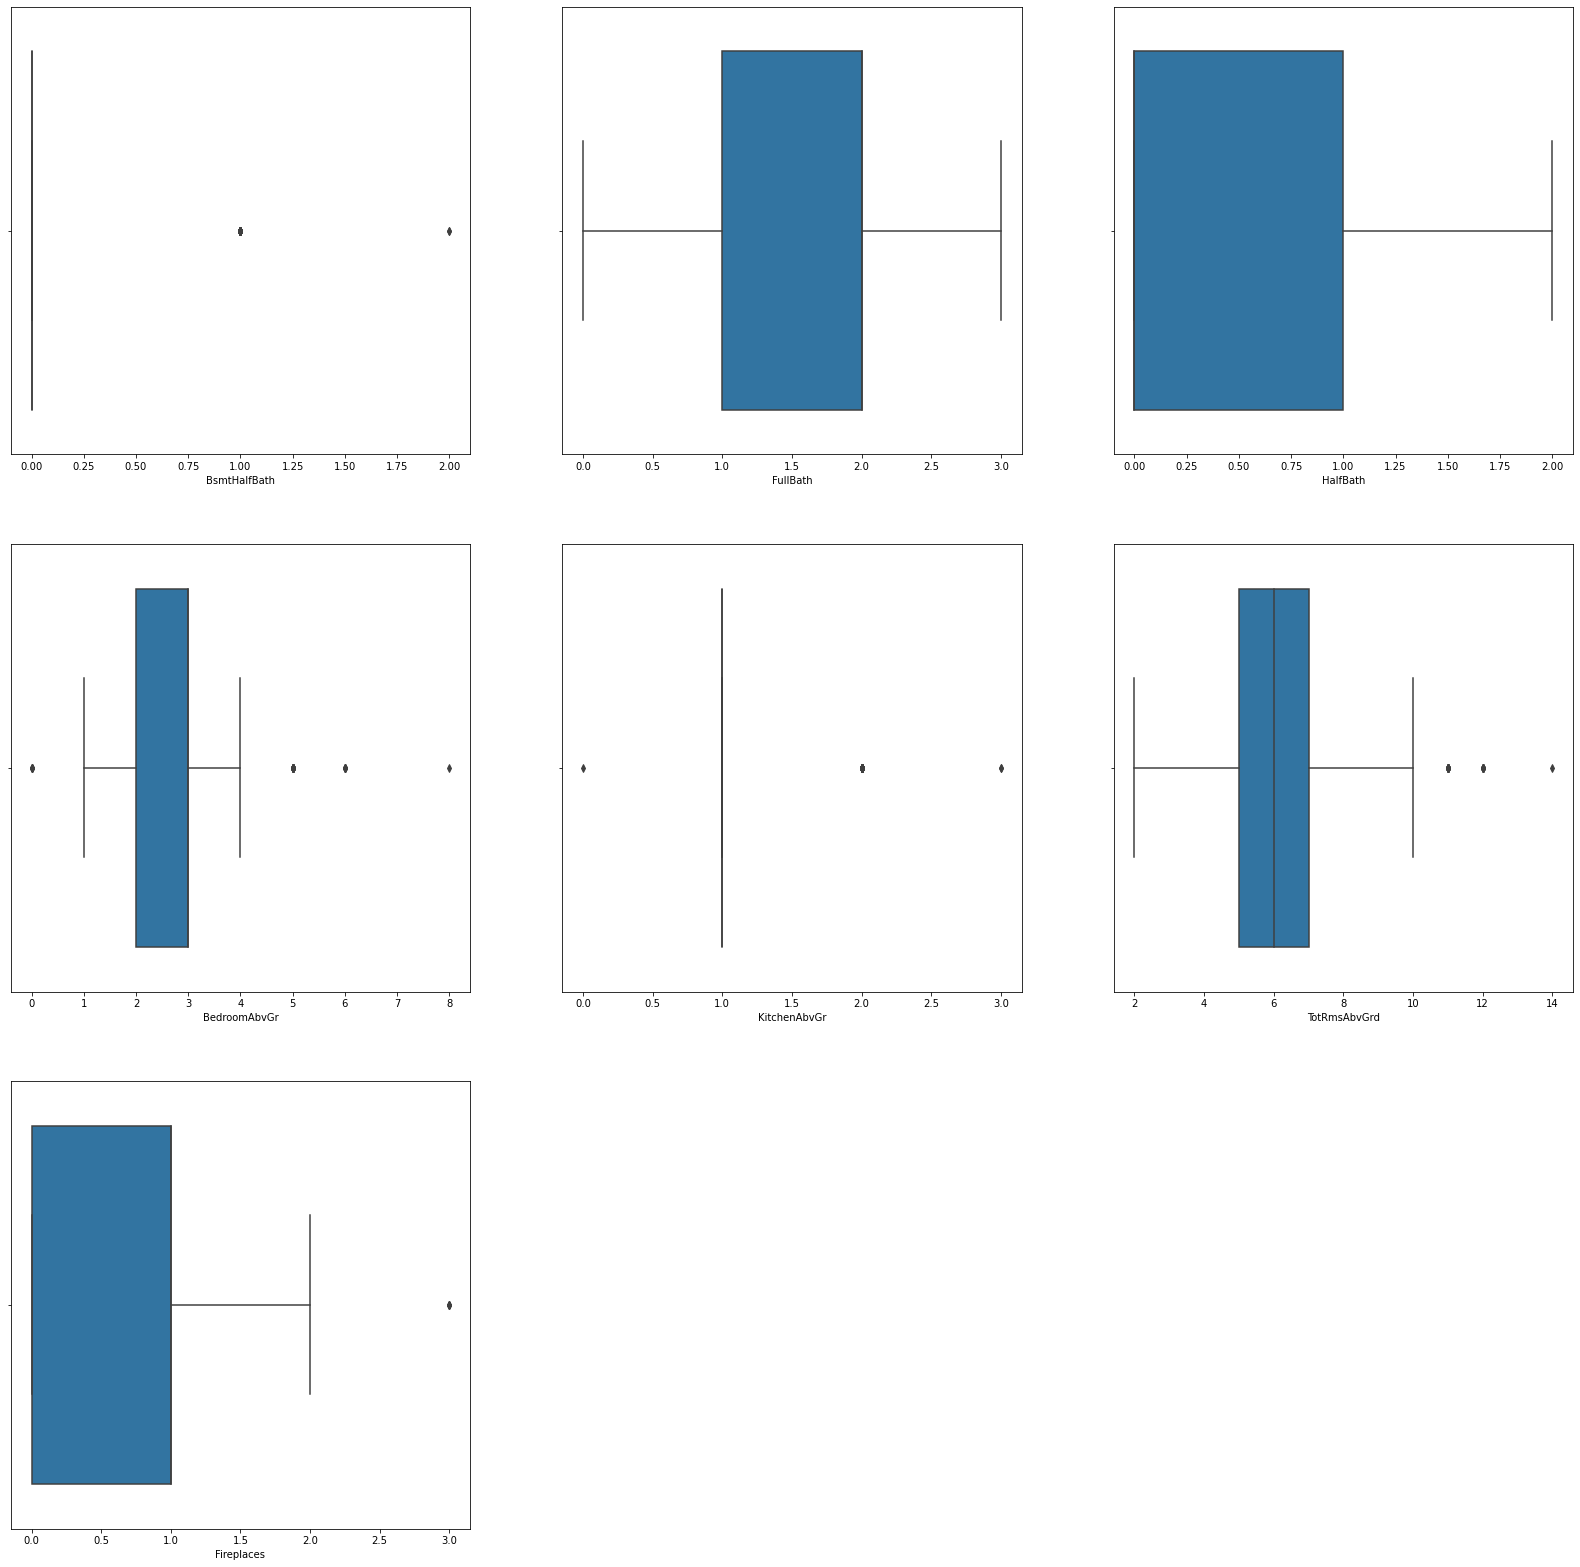

In [178]:
# Visualizing the data for third group
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,group_c.values()]):
    plt.subplot(3,3,i+1)
    detect_outliers(df,j)
plt.show()

#### All the columns in this group are categorical in nature, these need to be converted

#### The column BsmtHalfBath has values ranging between 0 and 2, it looks like a categorical column, let's do a value counts to verify

In [179]:
df.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

#### We can see that the column is highly skewed for 0, so we can drop this column

In [180]:
df = df.drop(['BsmtHalfBath'],axis =1)
rem_col(group_b,'BsmtHalfBath')
num_vars.remove('BsmtHalfBath')

#### Let's look at FullBath column

In [181]:
df.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [182]:
### We observe that the represenation of 0 bathrooms is quite low, we can merge it with 1 bathrooms and rename
df['FullBath'] = df['FullBath'].replace(0,1)

#### Let's look at HalfBath column

In [183]:
df.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [184]:
### We observe that the represenation of 2 bathrooms is quite low, we can merge it with 1 bathrooms and rename
df['HalfBath'] = df['HalfBath'].replace(2,1)

#### Let's look at BedroomAbvGr column

In [185]:
df.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [186]:
### We observe that the represenation of 8,0 and 6 rooms is quite low, we can merge these with nearest values
df['BedroomAbvGr'] = df['BedroomAbvGr'].replace(8,6).replace(0,1).replace(6,5)

#### Let's look at KitchenAbvGr column

In [187]:
df.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

#### We can see that the column is highly skewed for 1, so we can drop this column

In [188]:
df = df.drop(['KitchenAbvGr'],axis =1)
rem_col(group_c,'KitchenAbvGr')
num_vars.remove('KitchenAbvGr')

### Let's look at Fireplaces column

In [189]:
df.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [190]:
### We observe that the represenation of 3 fireplaces is very low, we can merge 3 and 2
df['Fireplaces'] = df['Fireplaces'].replace(3,2)

#### Visualizing the data for the fourth group

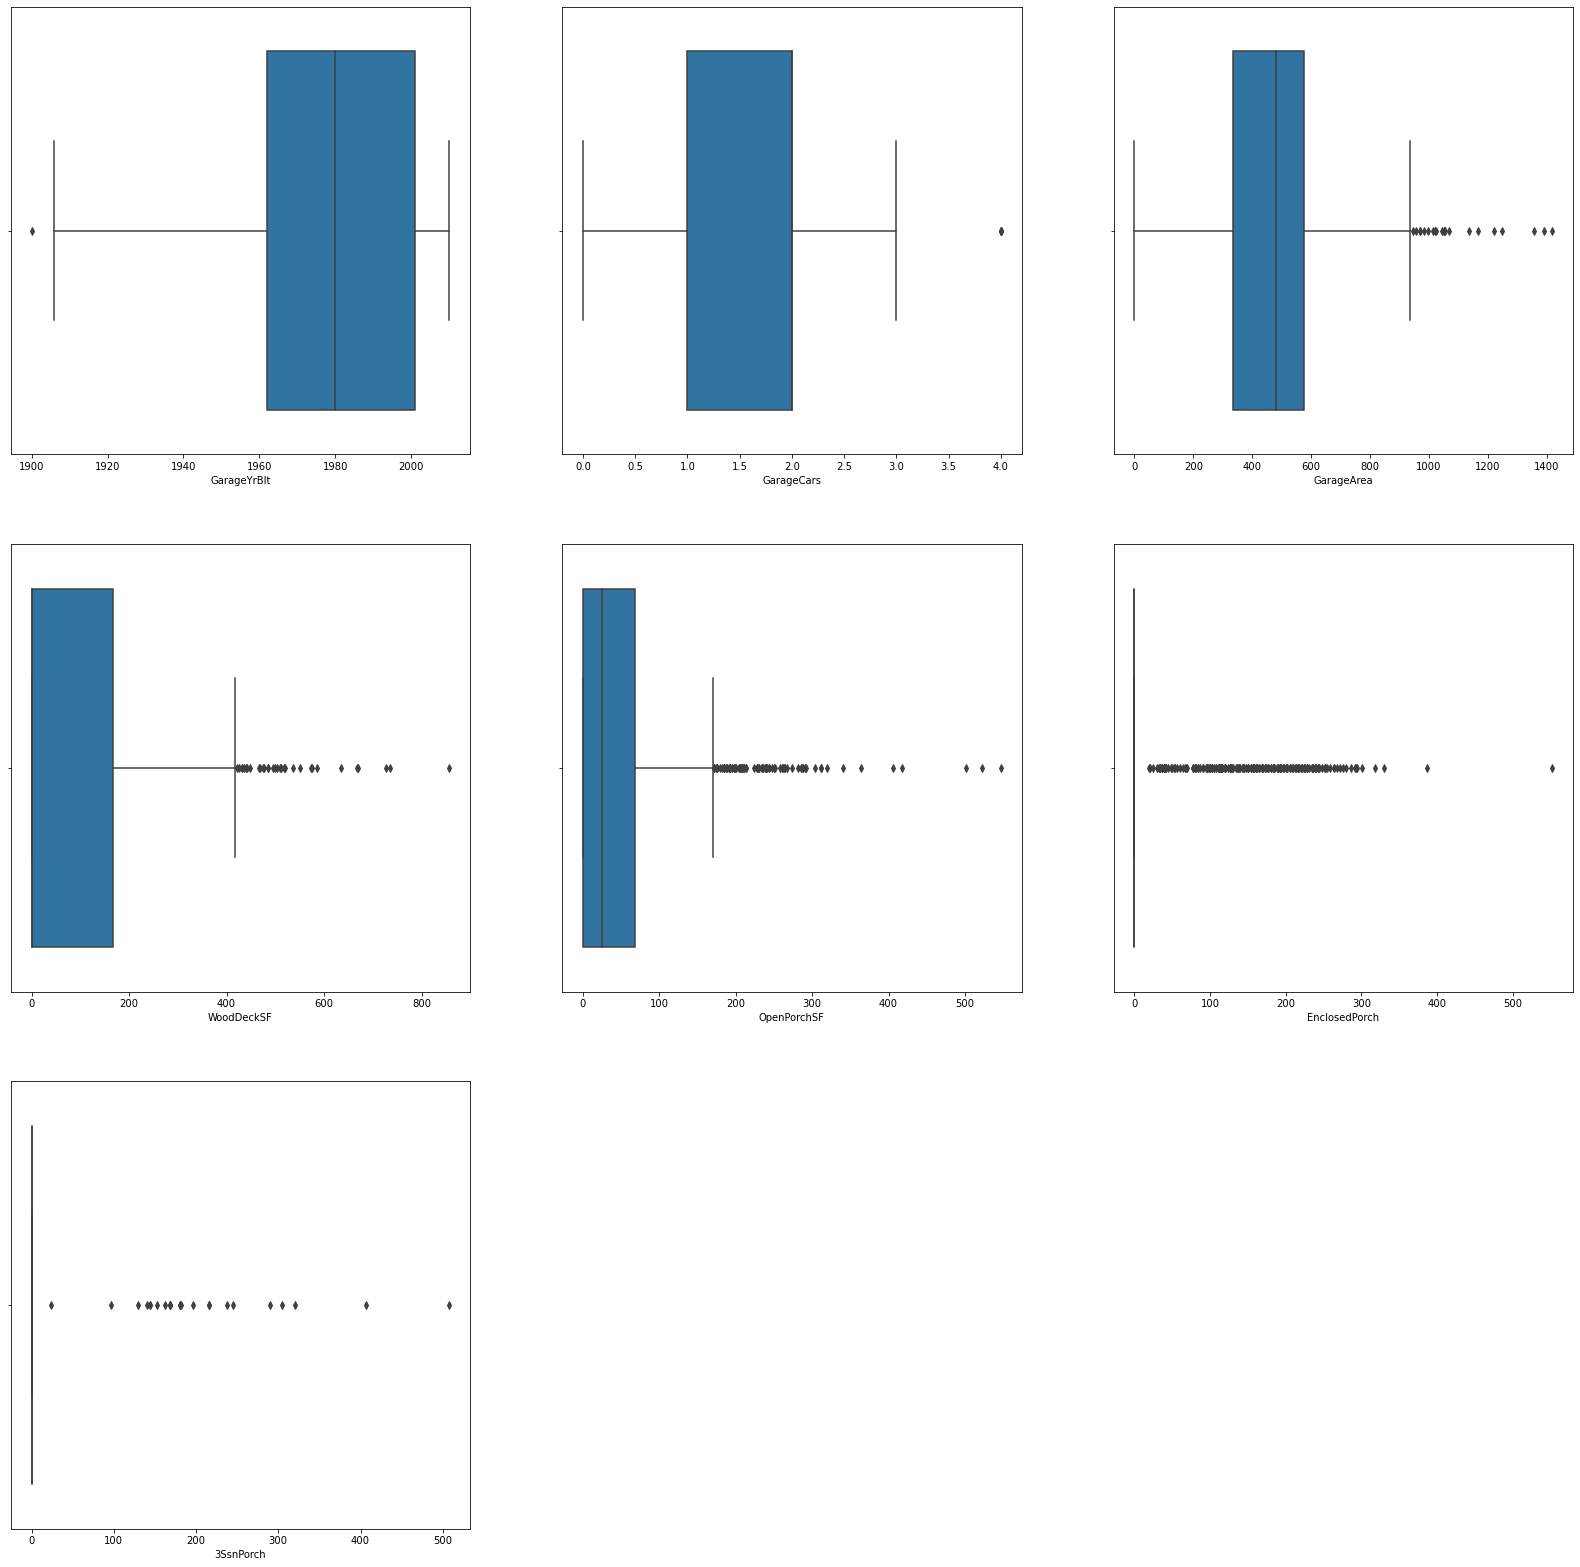

In [191]:
# Visualizing the data for fourth group
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,group_d.values()]):
    plt.subplot(3,3,i+1)
    detect_outliers(df,j)
plt.show()

#### The first column is GarageYrBlt column, since it holds year data, we can ignore outliers for it

#### The next column is GarageCars, but looking at its shape, its behaving like a categorical column, let's do a value count

In [192]:
df.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [193]:
### We observe that the represenation of GarageCars 4 is low, we can mergre it with 3
df['GarageCars'] = df['GarageCars'].replace(4,3)

#### The next column is GarageArea

#### Let's get boundries for outliers in GarageArea column

In [194]:
## Finding lower and upper fence for outlers in GarageArea column
lower_GarageArea , upper_GarageArea = get_boundries(df,'GarageArea')

In [195]:
## Printing the values
print(lower_GarageArea)
print(upper_GarageArea)

-28.0
938.0


In [196]:
# Checking statistics for BsmtUnfSF column
df.GarageArea.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1])

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
5%          0.000000
10%       240.000000
25%       334.500000
50%       480.000000
75%       576.000000
90%       757.100000
95%       850.100000
100%     1418.000000
max      1418.000000
Name: GarageArea, dtype: float64

#### Visually we can see that there are outliers beyond the upper fence

In [197]:
## Checking outlier values
df[df.GarageArea <= lower_GarageArea].GarageArea.count()

0

In [198]:
df[df.GarageArea >= upper_GarageArea].GarageArea.count()


21

#### We can cap the higher outlier values at 95% (850.10)

#### Capping the values at 95%

In [199]:
# Taking the 5th percentile in a variable
per_95_GarageArea = round(df.GarageArea.quantile(0.95))

#### Replacing upper outliers with 95th percentile value to treat the outliers in __GarageArea__

In [200]:
### Assigning nan to outlier values
df.loc[df.GarageArea >= upper_GarageArea, 'GarageArea'] = np.nan

In [201]:
# Replacing above avalues with 5th percentile
df.GarageArea.fillna(per_95_GarageArea,inplace=True)

#### Let's get boundries for outliers in WoodDeckSF column

In [202]:
## Finding lower and upper fence for outlers in WoodDeckSF column
lower_WoodDeckSF , upper_WoodDeckSF = get_boundries(df,'WoodDeckSF')

In [203]:
## Printing the values
print(lower_WoodDeckSF)
print(upper_WoodDeckSF)

-252.0
420.0


In [204]:
# Checking statistics for BsmtUnfSF column
df.WoodDeckSF.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95,0.97, 1])

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
90%       262.000000
95%       335.000000
97%       385.380000
100%      857.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

#### Visually we can see that there are outliers beyond the upper fence

In [205]:
## Checking outlier values
df[df.WoodDeckSF <= lower_WoodDeckSF].WoodDeckSF.count()

0

In [206]:
df[df.WoodDeckSF >= upper_WoodDeckSF].WoodDeckSF.count()


32

#### We can cap the higher outlier values at 97% (385.38)

#### Capping the values at 97%

In [207]:
# Taking the 5th percentile in a variable
per_97_WoodDeckSF = round(df.WoodDeckSF.quantile(0.97))

#### Replacing upper outliers with 97th percentile value to treat the outliers in __WoodDeckSF__

In [208]:
### Assigning nan to outlier values
df.loc[df.WoodDeckSF >= upper_WoodDeckSF, 'WoodDeckSF'] = np.nan

In [209]:
# Replacing above avalues with 5th percentile
df.WoodDeckSF.fillna(per_97_WoodDeckSF,inplace=True)

#### Let's get boundries for outliers in OpenPorchSF column

In [210]:
## Finding lower and upper fence for outlers in OpenPorchSF column
lower_OpenPorchSF , upper_OpenPorchSF = get_boundries(df,'OpenPorchSF')

In [211]:
## Printing the values
print(lower_OpenPorchSF)
print(upper_OpenPorchSF)

-102.0
170.0


In [212]:
# Checking statistics for BsmtUnfSF column
df.OpenPorchSF.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.94, 1])

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
90%       130.000000
94%       163.840000
100%      547.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

#### Visually we can see that there are outliers beyond the upper fence

In [213]:
## Checking outlier values
df[df.OpenPorchSF <= lower_OpenPorchSF].OpenPorchSF.count()

0

In [214]:
df[df.OpenPorchSF >= upper_OpenPorchSF].OpenPorchSF.count()


79

#### We can cap the higher outlier values at 94% (163.84)

#### Capping the values at 94%

In [215]:
# Taking the 5th percentile in a variable
per_94_OpenPorchSF = round(df.OpenPorchSF.quantile(0.94))

#### Replacing upper outliers with 94th percentile value to treat the outliers in __OpenPorchSF__

In [216]:
### Assigning nan to outlier values
df.loc[df.OpenPorchSF >= upper_OpenPorchSF, 'OpenPorchSF'] = np.nan

In [217]:
# Replacing above avalues with 5th percentile
df.OpenPorchSF.fillna(per_94_OpenPorchSF,inplace=True)

#### The columns EnclosedPorch and 3SsnPorch are outlier heavy and can be dropped

In [218]:
df = df.drop(['EnclosedPorch','3SsnPorch'],axis =1)
rem_col(group_d,'EnclosedPorch')
rem_col(group_d,'3SsnPorch')
num_vars.remove('EnclosedPorch')
num_vars.remove('3SsnPorch')

#### Visualizing the data for the fifth group

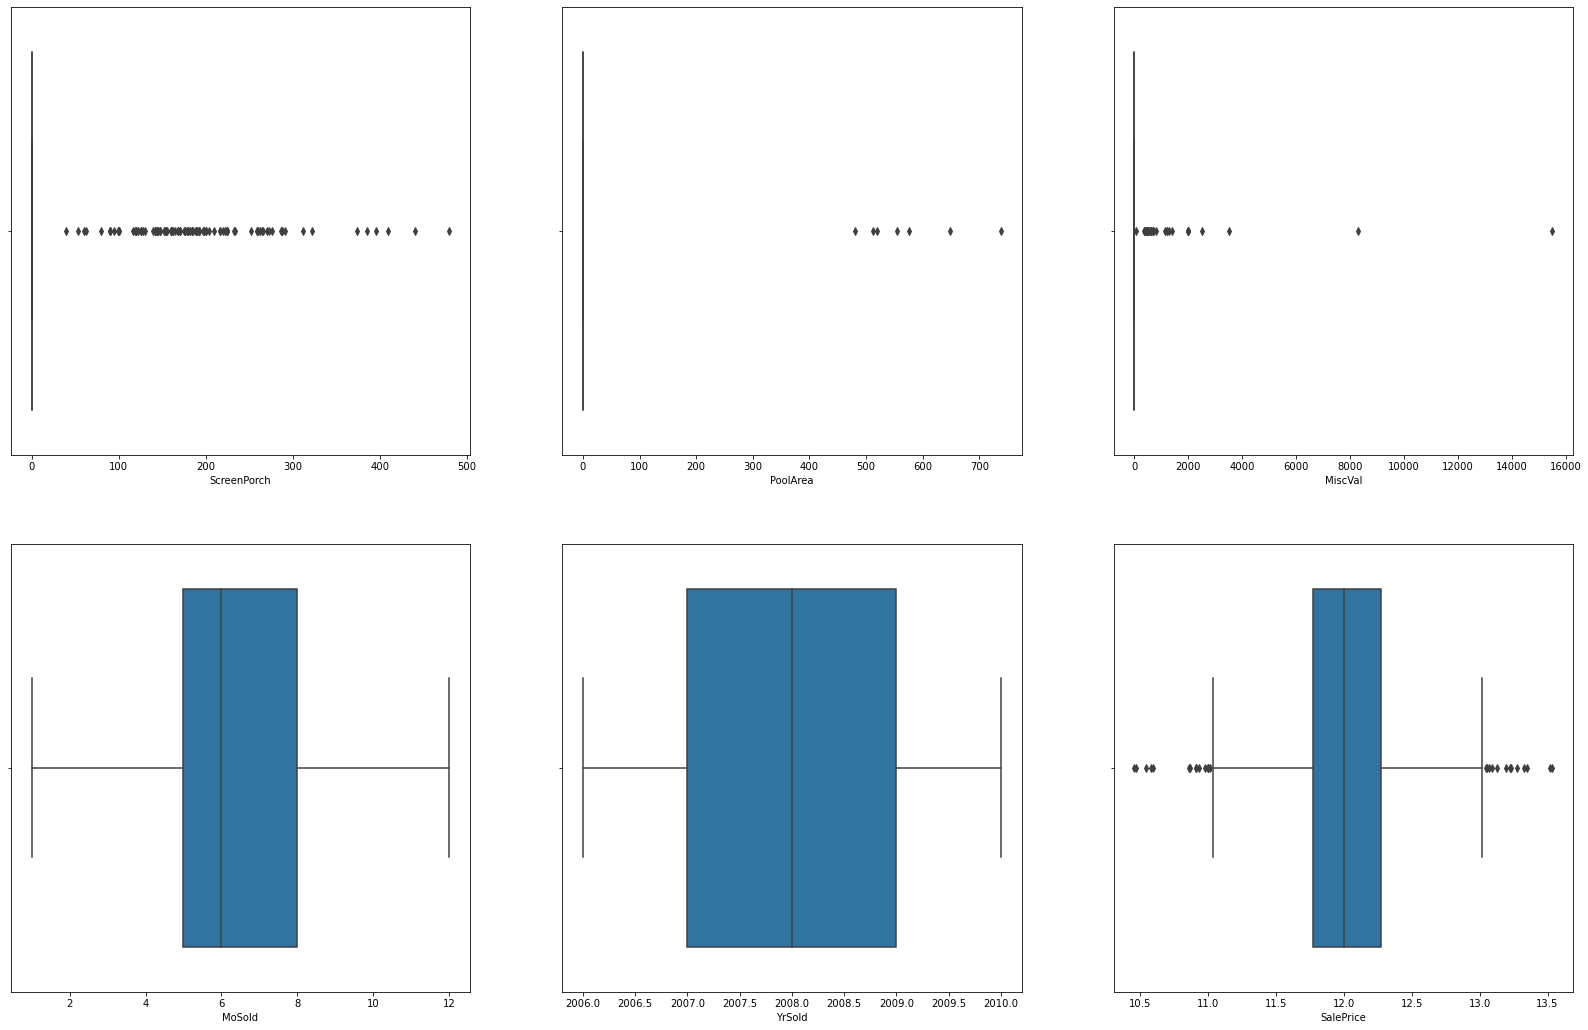

In [219]:
# Visualizing the data for fifth group
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,group_e.values()]):
    plt.subplot(3,3,i+1)
    detect_outliers(df,j)
plt.show()

#### The first three columns ScreenPorch, PoolArea and MiscVal are outlier heavy, so we can drop these columns

In [220]:
df = df.drop(['ScreenPorch', 'PoolArea', 'MiscVal'],axis =1)
rem_col(group_e,'ScreenPorch')
rem_col(group_e,'PoolArea')
rem_col(group_e,'MiscVal')
num_vars.remove('ScreenPorch')
num_vars.remove('PoolArea')
num_vars.remove('MiscVal')

#### The columns MoSold is the month in which the house was sold, we can map values from 1 to 12 with corresponding month name

In [221]:
df.MoSold = df.MoSold.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'})

In [222]:
## As this column is no more numerical, we can remove it from list
rem_col(group_e,'MoSold')
num_vars.remove('MoSold')

#### The column YrSold is when the house was sold, we can keep it as is

#### The next is SalesPrice, since it is dependent variable, we can keep it as is

#### Let's check which of the num_vars is left

In [223]:
print(len(num_vars))
num_vars

24


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'YrSold',
 'SalePrice']

#### Let's filter out categorical data

In [224]:
cat_data =  [col for col in df.columns if col not in num_vars]

In [225]:
## Now, let's observe the other columns except the above and keep in a variable
cat_vars = {idx:col for idx,col in enumerate(cat_data)}

In [226]:
## Let's take a look
cat_vars

{0: 'MSSubClass',
 1: 'MSZoning',
 2: 'Street',
 3: 'LotShape',
 4: 'LandContour',
 5: 'Utilities',
 6: 'LotConfig',
 7: 'LandSlope',
 8: 'Neighborhood',
 9: 'Condition1',
 10: 'Condition2',
 11: 'BldgType',
 12: 'HouseStyle',
 13: 'OverallQual',
 14: 'OverallCond',
 15: 'RoofStyle',
 16: 'RoofMatl',
 17: 'Exterior1st',
 18: 'Exterior2nd',
 19: 'MasVnrType',
 20: 'ExterQual',
 21: 'ExterCond',
 22: 'Foundation',
 23: 'BsmtQual',
 24: 'BsmtCond',
 25: 'BsmtExposure',
 26: 'BsmtFinType1',
 27: 'BsmtFinType2',
 28: 'Heating',
 29: 'HeatingQC',
 30: 'CentralAir',
 31: 'Electrical',
 32: 'KitchenQual',
 33: 'Functional',
 34: 'FireplaceQu',
 35: 'GarageType',
 36: 'GarageFinish',
 37: 'GarageQual',
 38: 'GarageCond',
 39: 'PavedDrive',
 40: 'MoSold',
 41: 'SaleType',
 42: 'SaleCondition'}

In [227]:
## Let's look at data for the cat_vars
df[cat_vars.values()]

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,February,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,May,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,September,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,February,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,December,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Above Average,Average,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,August,WD,Normal
1456,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Above Average,Above Average,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,February,WD,Normal
1457,2-STORY 1945 & OLDER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Excellent,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,May,WD,Normal
1458,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Average,Above Average,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NA,Attchd,Unf,TA,TA,Y,April,WD,Normal


### Step3: Exporatory Data Analysis and Feature Reduction

#### Let's look at current shape of the data

In [228]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleConditio

#### At this point we have 67 features

#### Creating a function to visualise data:

In [229]:
# Function to visualise data:

def category_plot(column, data, dep = 'SalePrice'):
    plt.title('Sales price based on {}'.format(column), fontsize = 16)
    ax = sns.boxplot(x = column, y = dep, data = data)
    axis_font = {'size':'16'}
    plt.xlabel(column, **axis_font)
    plt.ylabel(dep, **axis_font)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.tight_layout(pad= 3.0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### Visualizing the data for categorical columns, since there are 42 categorical columns we will visualize these chunks by chunks

#### We will use the chunks function created above

In [230]:
## Checking for slots
for item in chunks(cat_vars, 7):
    print(item)

{0: 'MSSubClass', 1: 'MSZoning', 2: 'Street', 3: 'LotShape', 4: 'LandContour', 5: 'Utilities', 6: 'LotConfig'}
{7: 'LandSlope', 8: 'Neighborhood', 9: 'Condition1', 10: 'Condition2', 11: 'BldgType', 12: 'HouseStyle', 13: 'OverallQual'}
{14: 'OverallCond', 15: 'RoofStyle', 16: 'RoofMatl', 17: 'Exterior1st', 18: 'Exterior2nd', 19: 'MasVnrType', 20: 'ExterQual'}
{21: 'ExterCond', 22: 'Foundation', 23: 'BsmtQual', 24: 'BsmtCond', 25: 'BsmtExposure', 26: 'BsmtFinType1', 27: 'BsmtFinType2'}
{28: 'Heating', 29: 'HeatingQC', 30: 'CentralAir', 31: 'Electrical', 32: 'KitchenQual', 33: 'Functional', 34: 'FireplaceQu'}
{35: 'GarageType', 36: 'GarageFinish', 37: 'GarageQual', 38: 'GarageCond', 39: 'PavedDrive', 40: 'MoSold', 41: 'SaleType'}
{42: 'SaleCondition'}


In [231]:
## Assigning values to different slots
slot_a,slot_b,slot_c,slot_d,slot_e,slot_f, slot_g = chunks(cat_vars,7)

In [232]:
## Let's check the data for first slot
df.loc[:,slot_a.values()]

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2
...,...,...,...,...,...,...,...
1455,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside
1456,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Inside
1457,2-STORY 1945 & OLDER,RL,Pave,Reg,Lvl,AllPub,Inside
1458,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Inside


In [233]:
### Checking the dataframe shape 
df.shape

(1460, 67)

#### Visualizing the data for the first slot

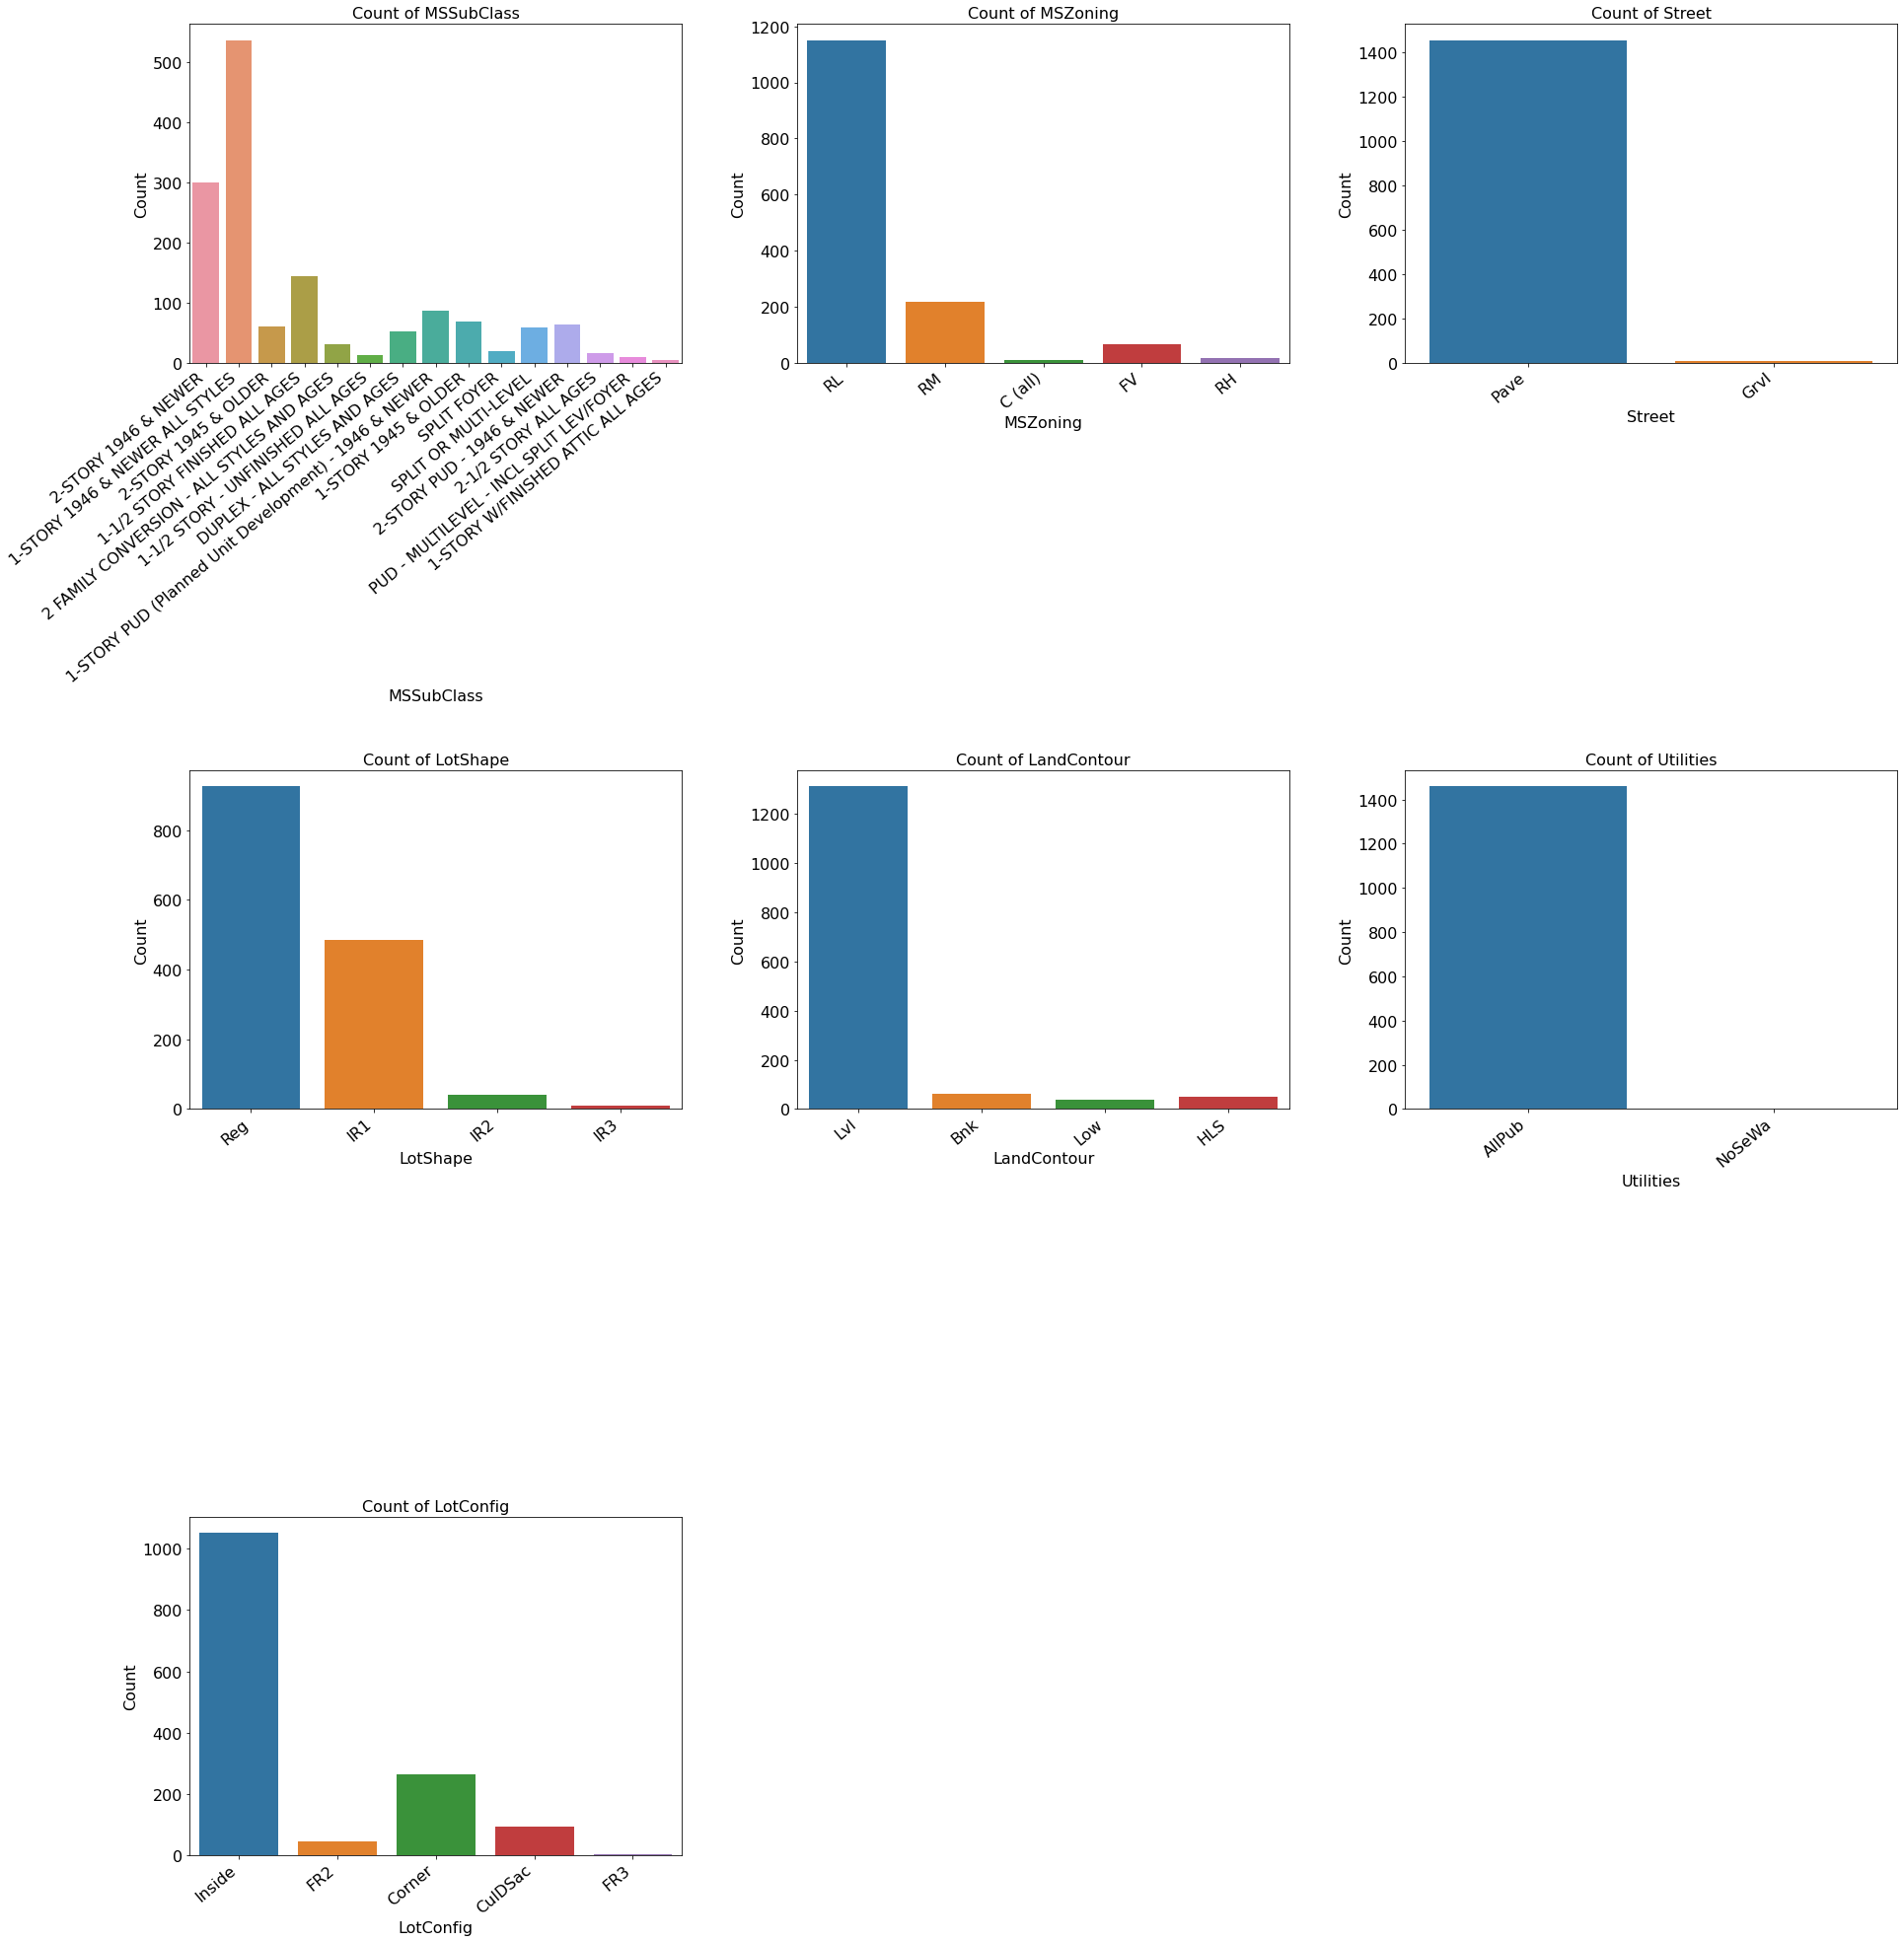

In [234]:
# Visualizing the data for first slot
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_a.values()]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

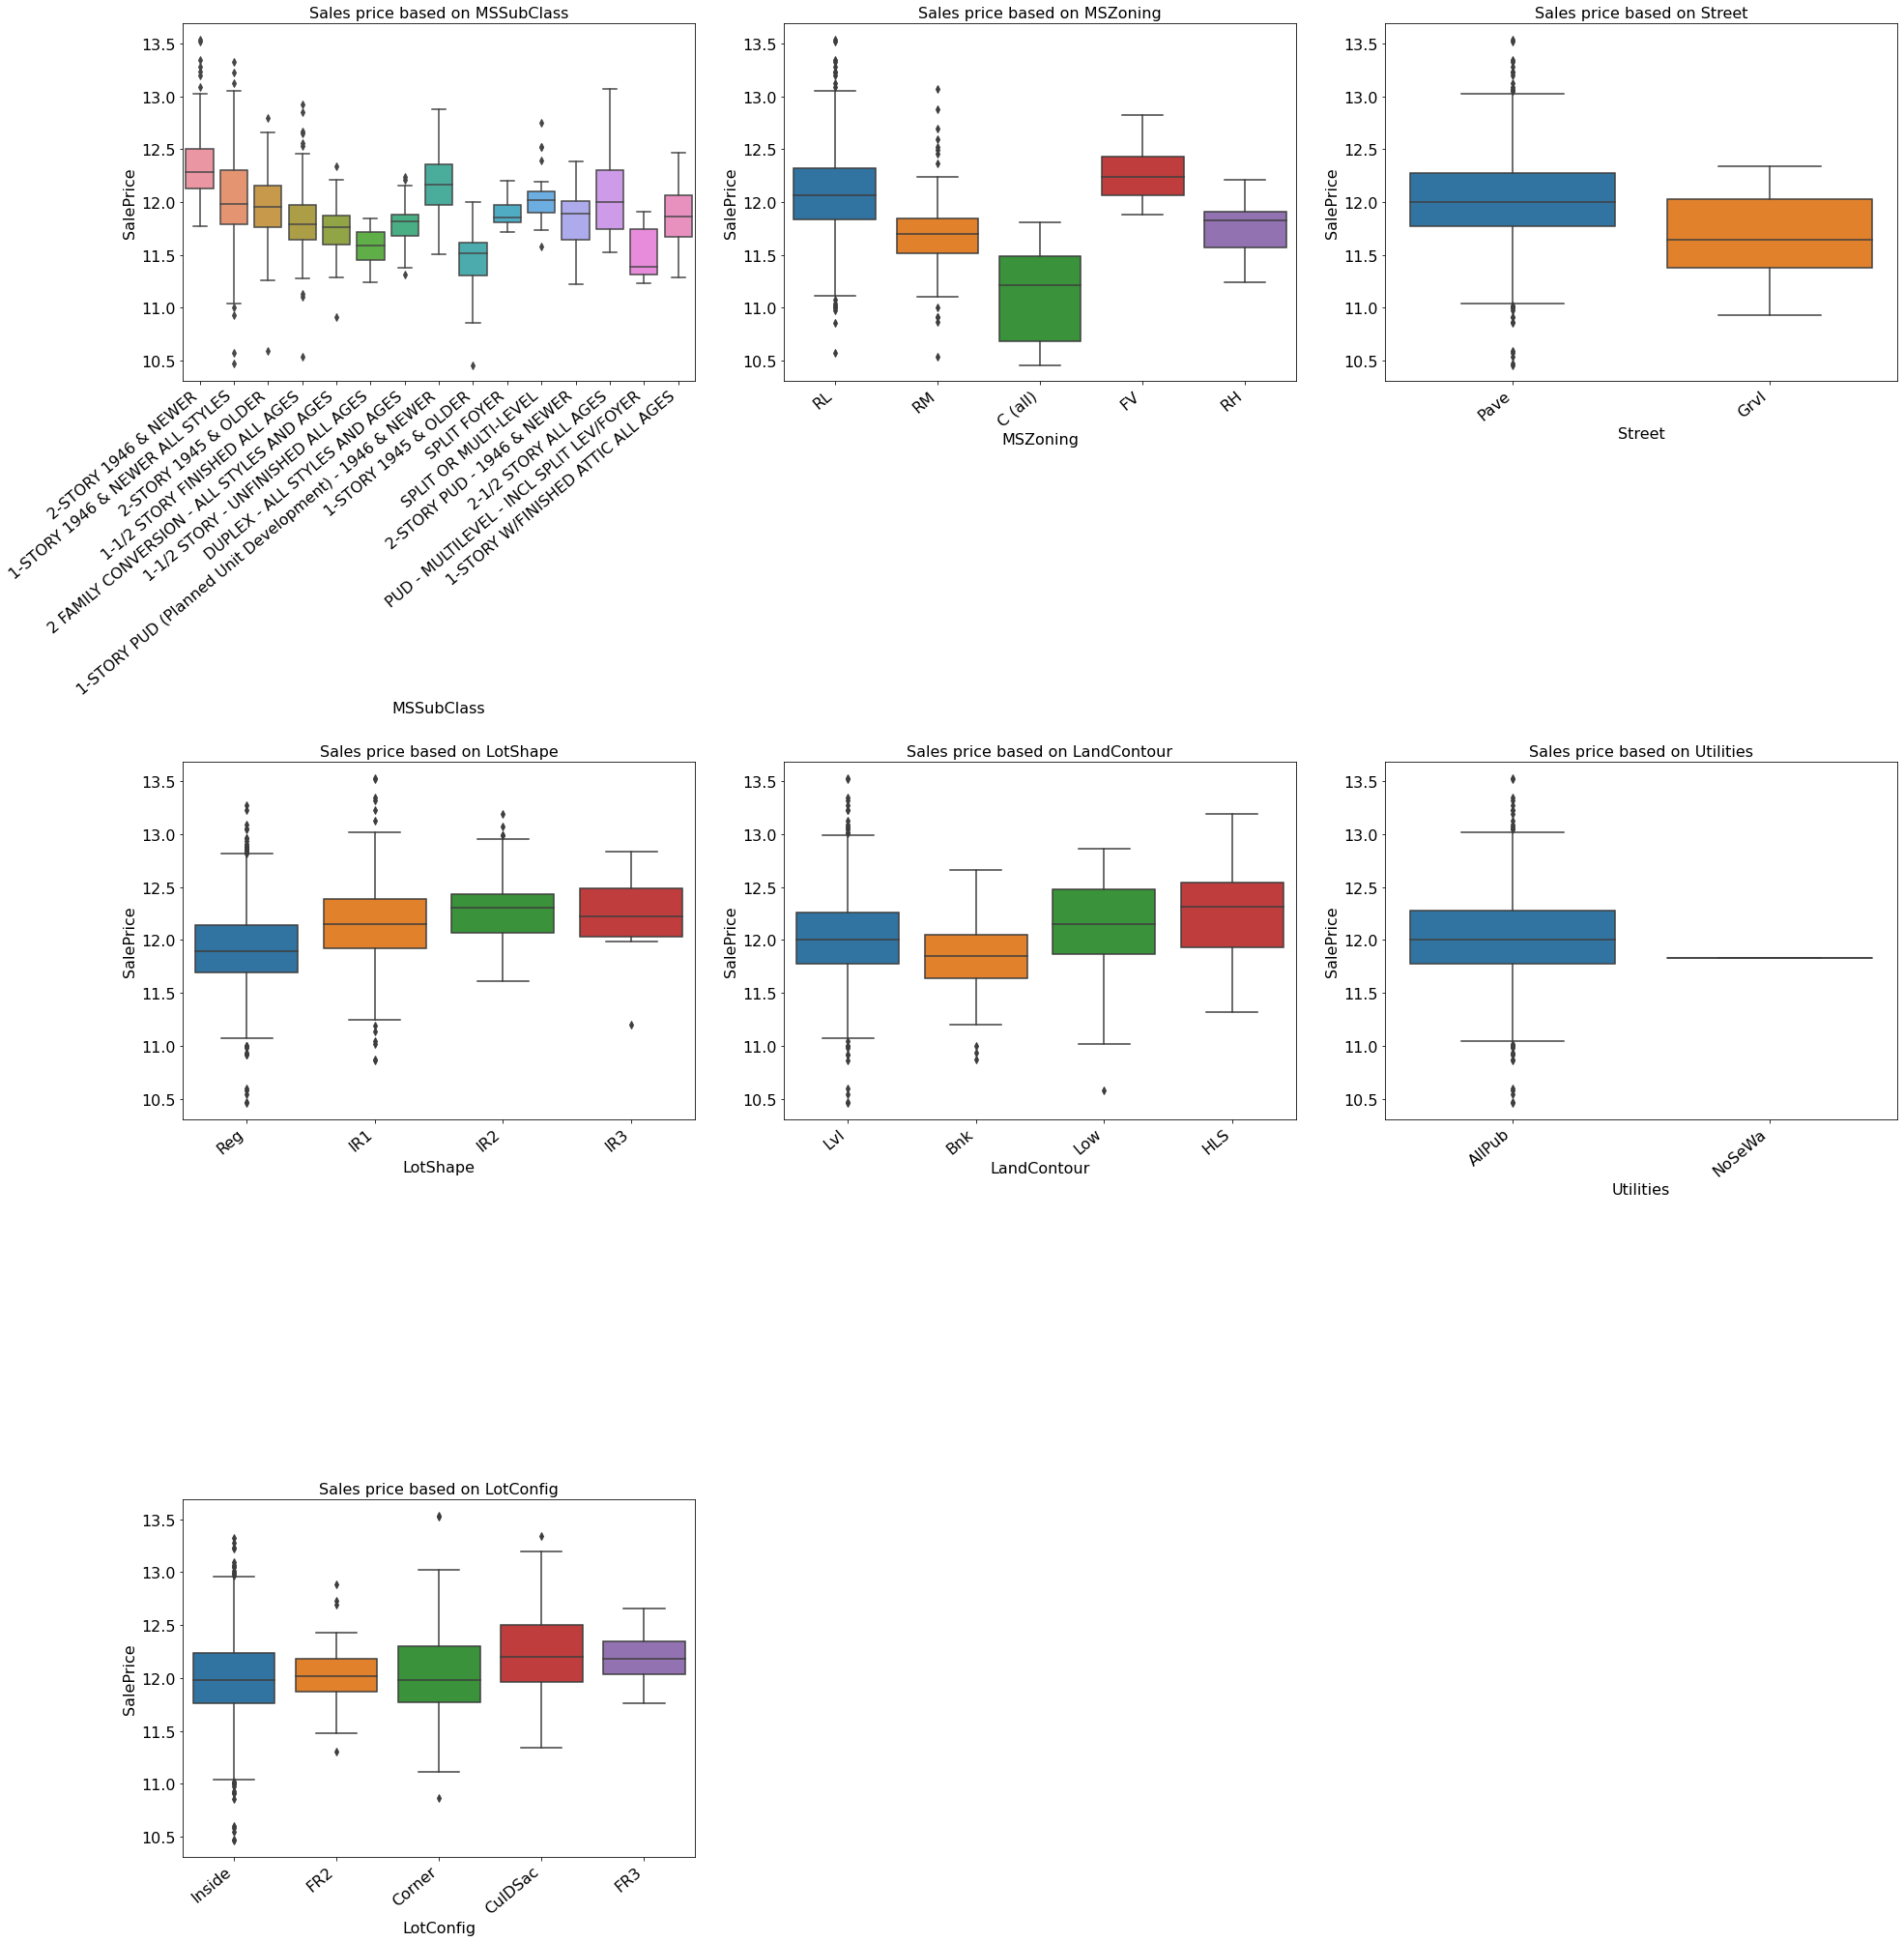

In [235]:
## Let's check these columns for the distribution of Sales price
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_a.values()]):
    plt.subplot(3,3,i+1)
    category_plot(j,df)
plt.show()

#### From above graphs, we have below observations:
- The Sales price are usually high for Floating Village Residential(FV) MSZoning variable
- There is not much variance in terms of Lotshape as the distribution is similar
- The Sales price are usually high for Hillside and Low for Land Contour variable
- The Sales price are usually high for Cul-de-sac Lot configuration

In [236]:
## For the column MSZoning, the representation for C (all) and RH is very low, we can merge these and assign a new name
df['MSZoning'] = df['MSZoning'].replace(['RH','C (all)'],'Others')

#### The Street columns seems heavily biased towards Pave value, let's do a value

In [237]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [238]:
## We can drop the Street column since all the values are shifted towards Pave values
df = df.drop(['Street'],axis =1)
rem_col(slot_a, 'Street')
cat_data.remove('Street')

#### Also the LandContour columns seems heavily biased towards AllPub value, let's do a value counts

In [239]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [240]:
## We can drop the LandContour column since all the values are shifted towards Lvl values
df = df.drop(['LandContour'],axis =1)
rem_col(slot_a, 'LandContour')
cat_data.remove('LandContour')

#### Also the Utilities columns seems heavily biased towards AllPub value, let's do a value counts

In [241]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [242]:
## We can drop the Utilities column since all the values are shifted towards AllPub values
df = df.drop(['Utilities'],axis =1)
rem_col(slot_a, 'Utilities')
cat_data.remove('Utilities')

In [243]:
### Checking the dataframe shape 
df.shape

(1460, 64)

#### Visualizing the data for the second slot

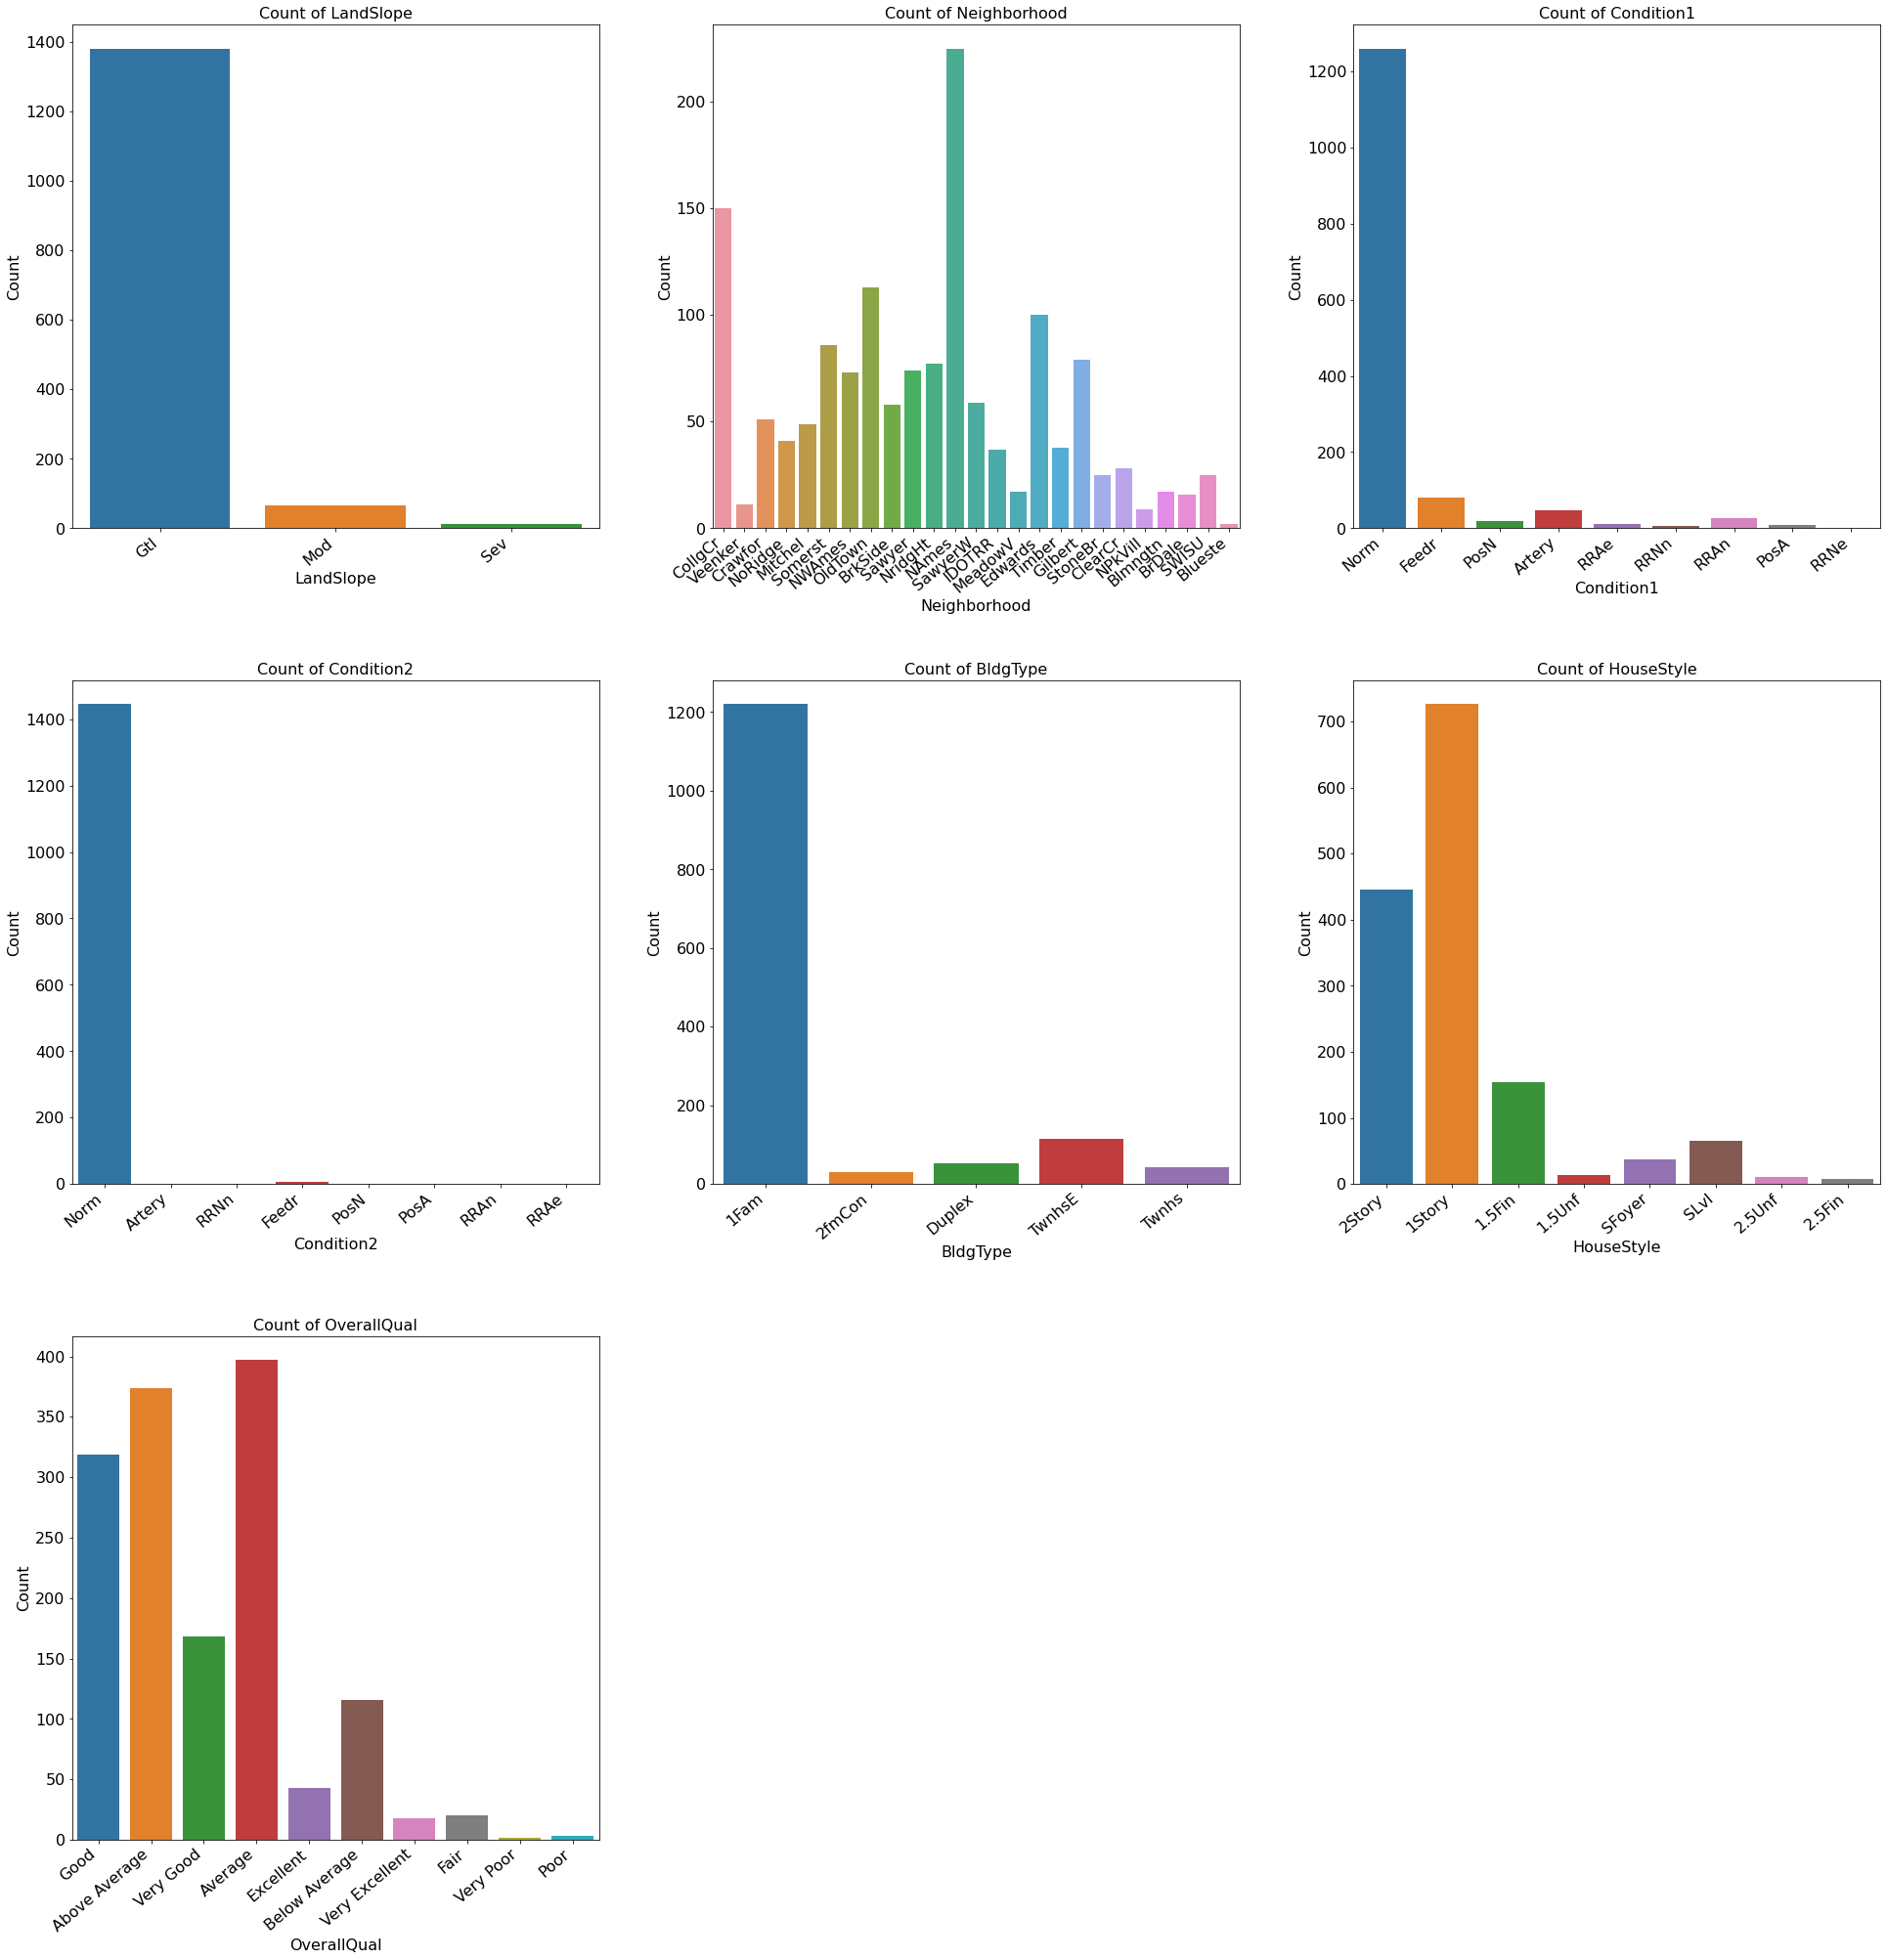

In [244]:
# Visualizing the data for the second slot
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_b.values()]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

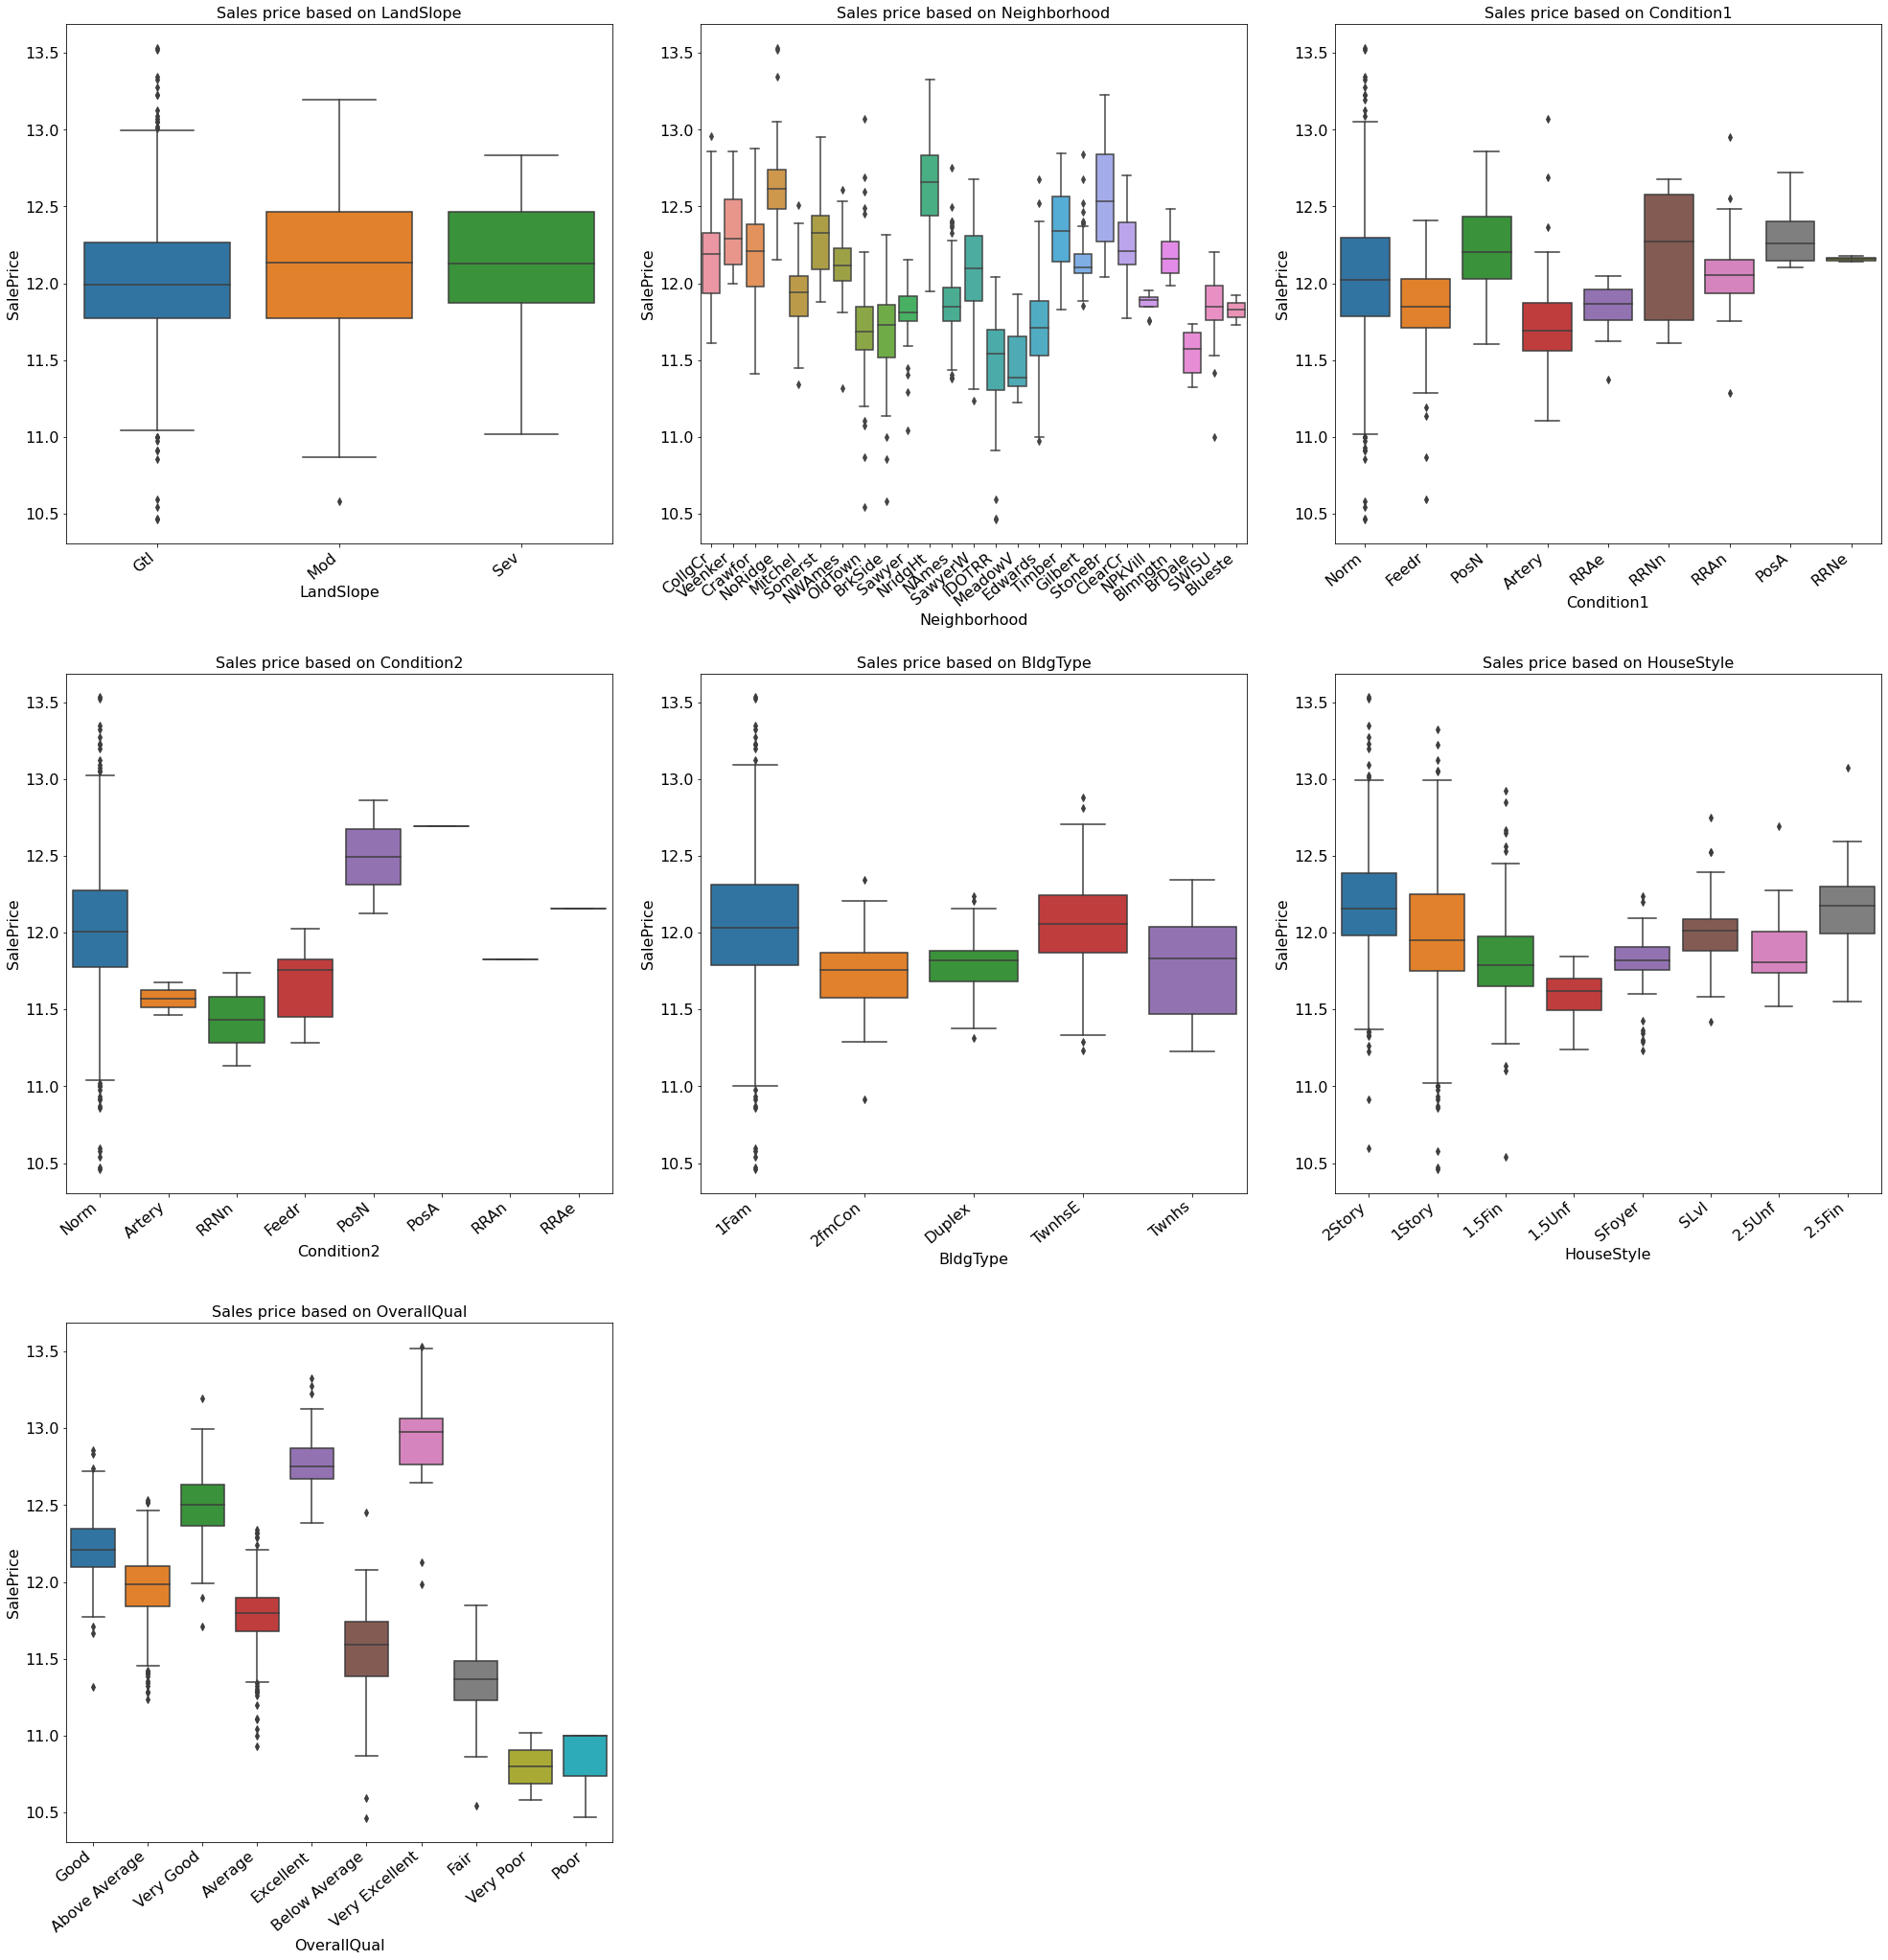

In [245]:
## Let's check these columns for the distribution of Sales price
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_b.values()]):
    plt.subplot(3,3,i+1)
    category_plot(j,df)
plt.show()

#### From above graphs, we have below observations:
- The Sales price are usually high for Single-family Detached BldgType(Type of dwelling)
- The Sales price are usually high for Two story Housestyle(Style of dwelling)
- The Sales price are very high for Very Excellent type of Overall Quality as expected
- The Sales price are very high for Excellent type of Overall Condition as expected, since there is no house with Very Excellent condition in the sample

#### The LandSlope columns seems heavily biased towards Gtl value, let's do a value count

In [246]:
# Doing the value counts
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

#### The distribution is highly skewed, 1382 for Gtl alone

In [247]:
## We can drop the Condition1 column since all the values are shifted towards Pave values
df = df.drop(['LandSlope'],axis =1)
rem_col(slot_a, 'LandSlope')
cat_data.remove('LandSlope')

#### The Condition1 columns seems heavily biased towards Norm value, let's do a value count

In [248]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

#### The distribution is highly skewed, 1260 for Norm alone and 200 for others

In [249]:
## We can drop the Condition1 column since all the values are shifted towards Pave values
df = df.drop(['Condition1'],axis =1)
rem_col(slot_b, 'Condition1')
cat_data.remove('Condition1')

#### Also the Condition2 columns seems heavily biased towards Norm value, let's do a value counts

In [250]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [251]:
## We can drop the Condition2 column since all the values are shifted towards Norm values
df = df.drop(['Condition2'],axis =1)
rem_col(slot_b, 'Condition2')
cat_data.remove('Condition2')

In [252]:
## Next considerable column is HouseStyle, let's do a value count on it
df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [253]:
## We observe that the weightage of SFoyer, 1.5Unf, 2.5Unf and 2.5Fin is quite low, we can merge these together and rename
df['HouseStyle'] = df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

In [254]:
## Next considerable column is OverallQual, let's do a value count on it
df.OverallQual.value_counts()

Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64

In [255]:
## We observe that the weightage of Very Poor and Poor is quite low, we can merge these together and rename
df['OverallQual'] = df['OverallQual'].replace(['Very Poor'],'Poor')

In [256]:
### Checking the dataframe shape 
df.shape

(1460, 61)

#### Visualizing the data for the third slot

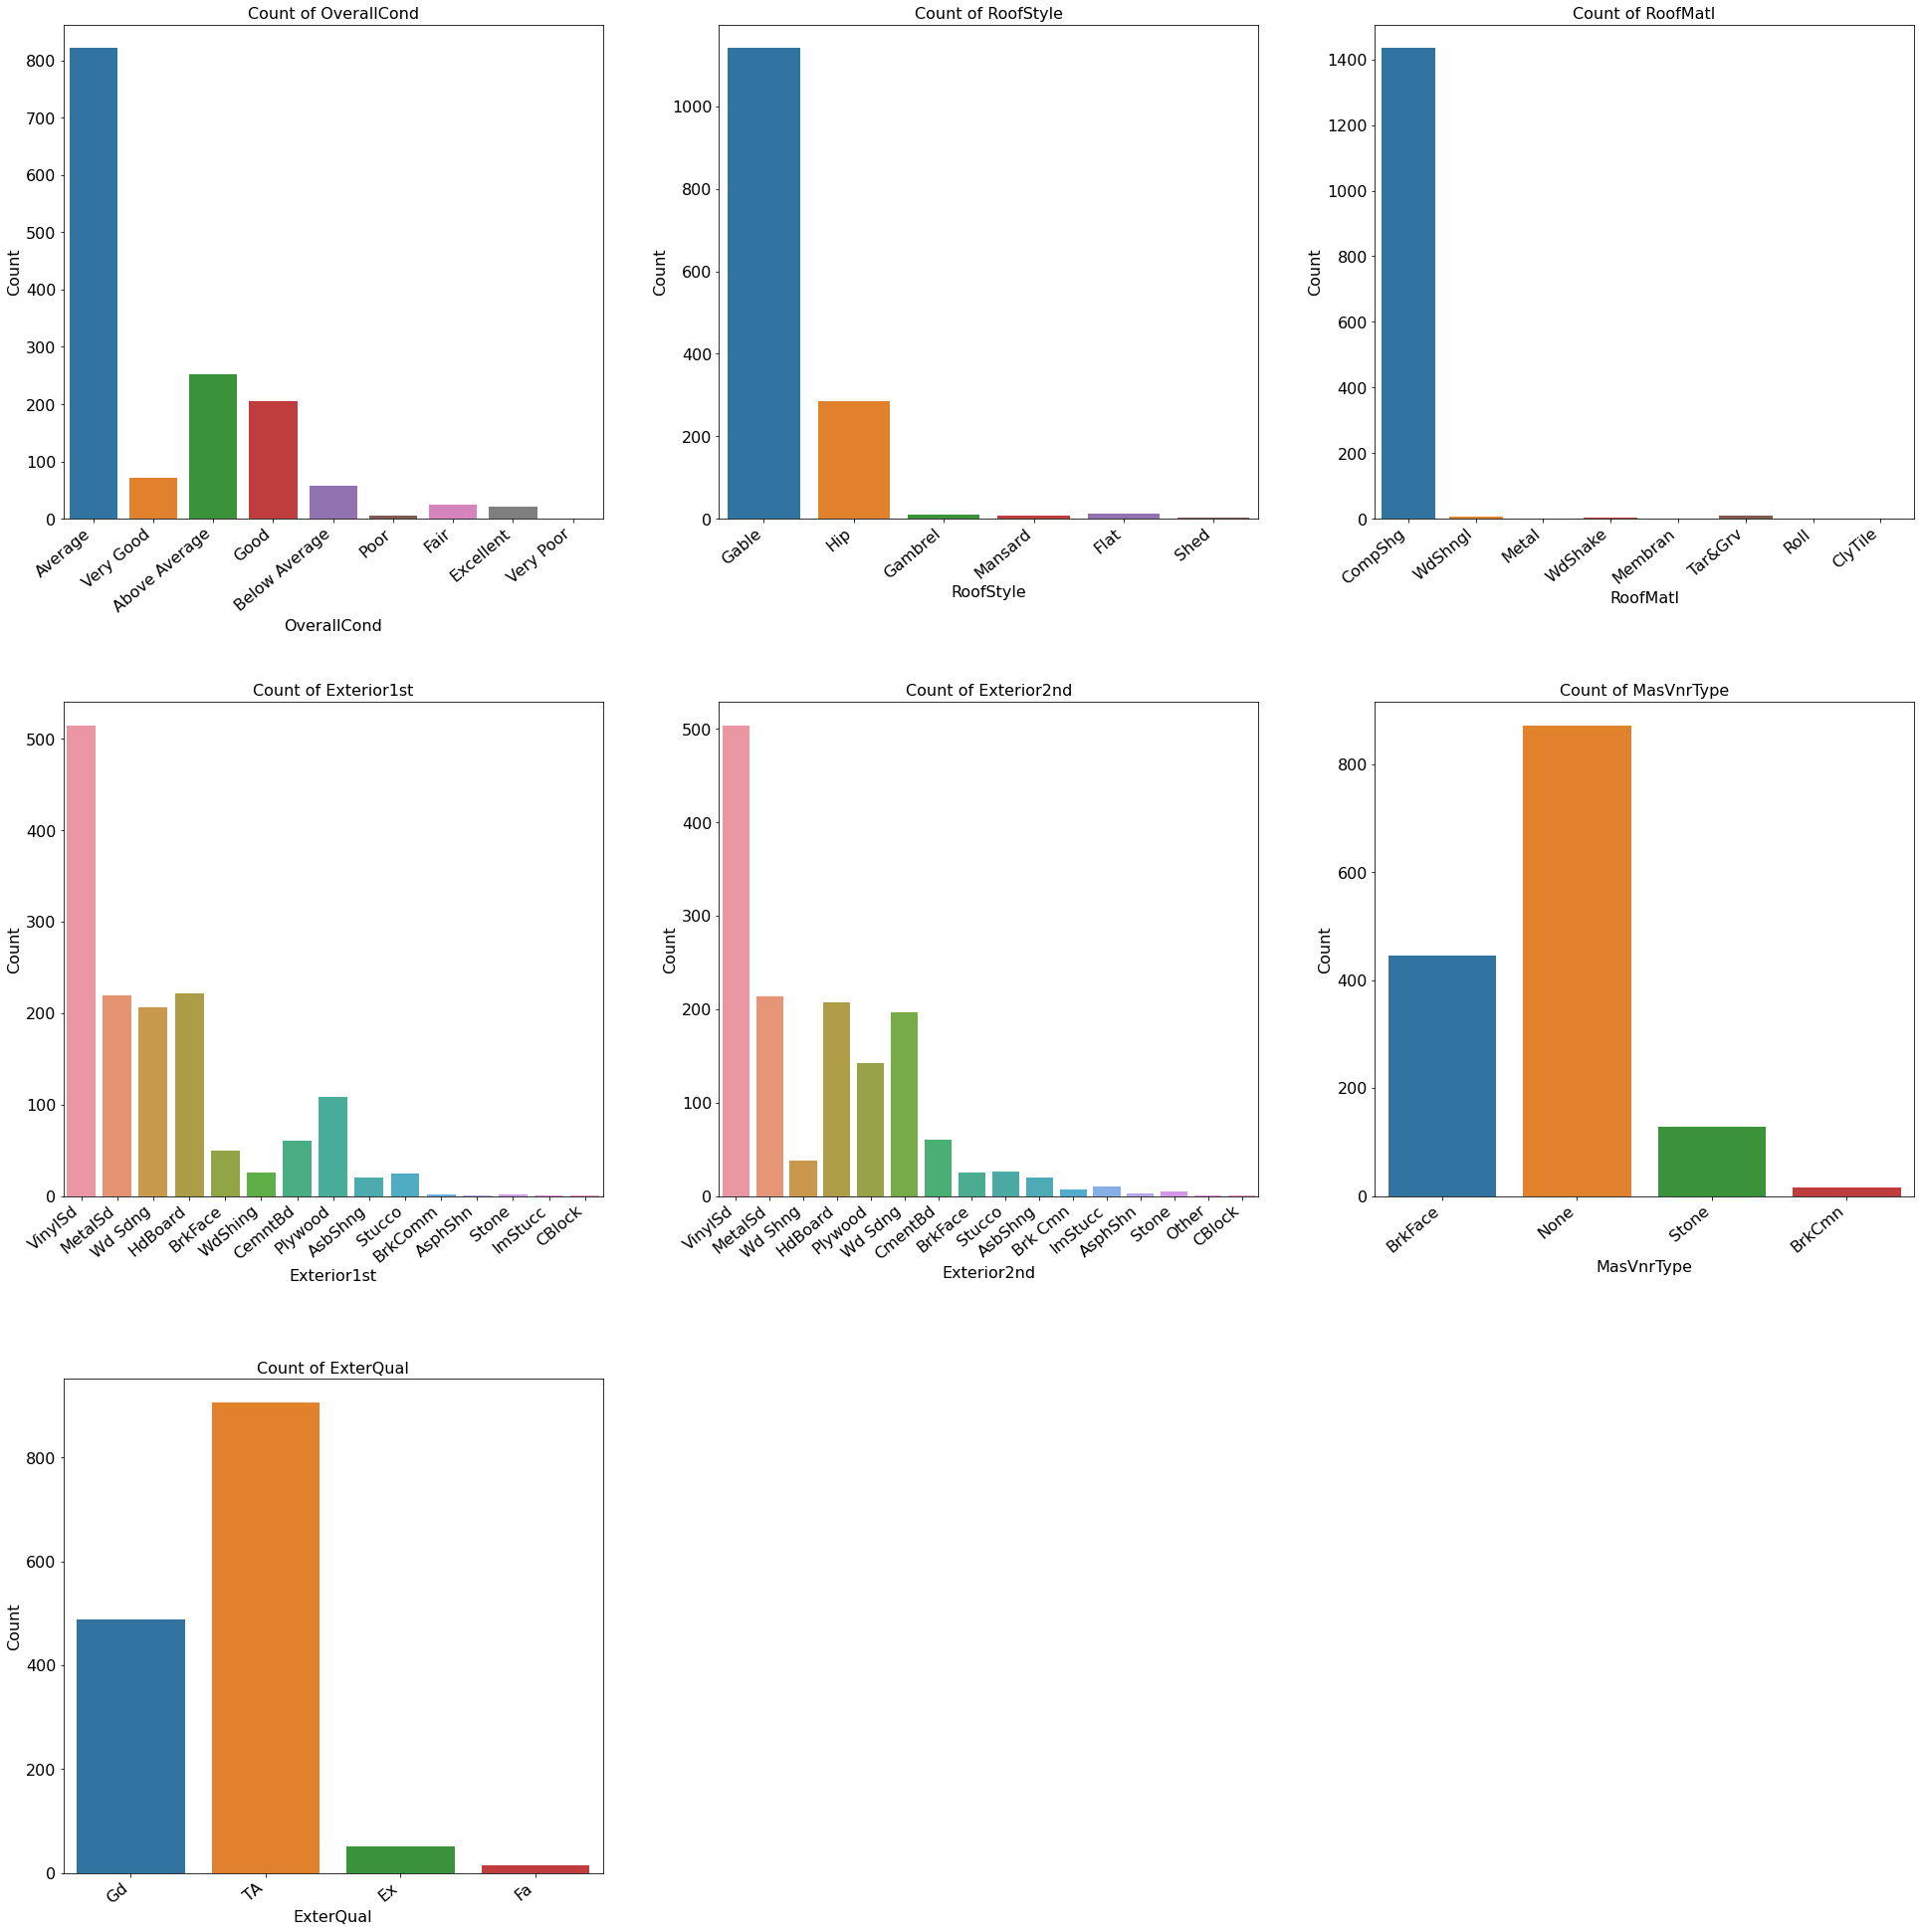

In [257]:
# Visualizing the data for the third slot
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_c.values()]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

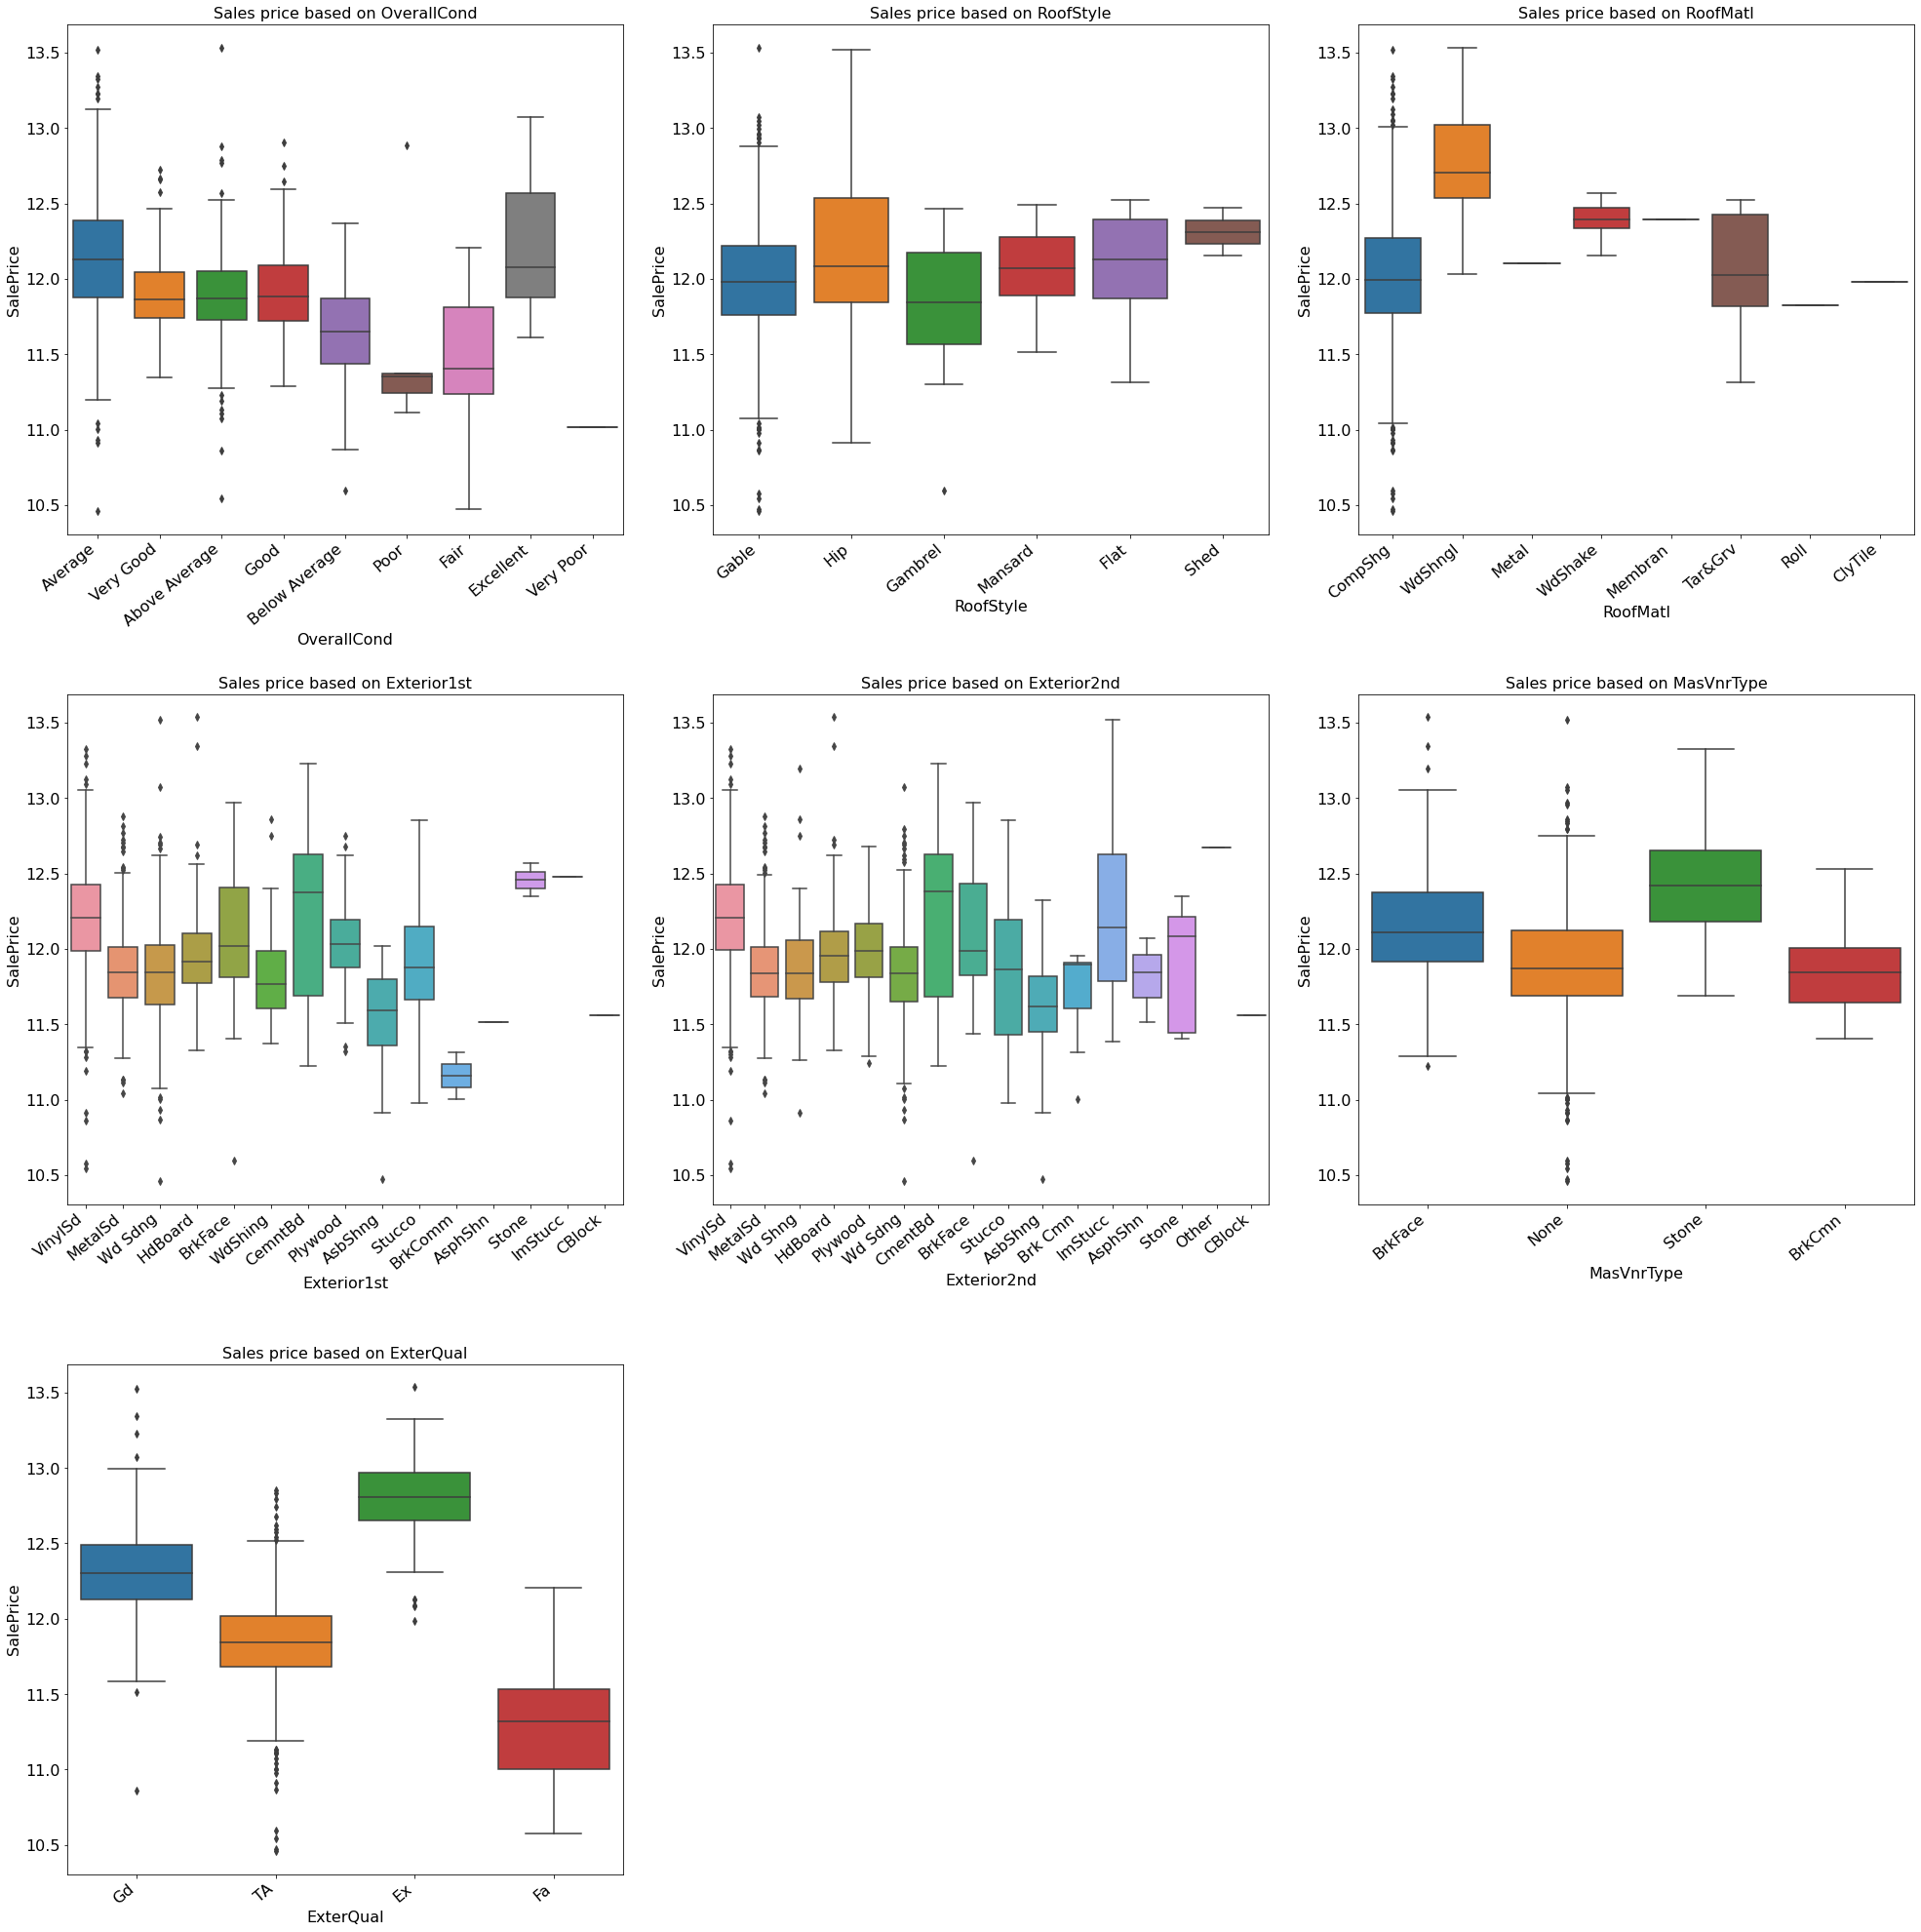

In [258]:
## Let's check these columns for the distribution of Sales price
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_c.values()]):
    plt.subplot(3,3,i+1)
    category_plot(j,df)
plt.show()

#### From above graphs, we have below observations:
- The Sales price are usually high for Stone type MasnrTytpe(Masonry veneer type)
- The Sales price are high for Excellent External Quality as expected

In [259]:
## The column OverallCond has some very low, let's do a value count on it
df.OverallCond.value_counts()

Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64

In [260]:
## We observe that the weightage of Very Poor and Poor is quite low, we can merge these together and rename
df['OverallCond'] = df['OverallCond'].replace(['Very Poor'],'Poor')

In [261]:
## Next considerable column is RoofStyle, let's do a value count on it
df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [262]:
## We also observe that the weightage of Flat, Gambrel, Mansard and Shed is quite low, we can merge these together and rename
df['RoofStyle'] = df['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Others')

#### The RoofMatl columns seems heavily biased towards CompShg value, let's do a value count

In [263]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

#### The distribution is highly skewed, 1434 for Norm alone and 26 for others

In [264]:
## We can drop the RoofMatl column since all the values are shifted towards CompShg values
df = df.drop(['RoofMatl'],axis =1)
rem_col(slot_c, 'RoofMatl')
cat_data.remove('RoofMatl')

In [265]:
#### Let's observe the Exterior1st column by using value counts()
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [266]:
## We observe that the weightage of SWdShing, Stucco, AsbShng, BrkComm, Stone, ImStucc, CBlock and AsphShn is quite low, we can merge these together and rename as Others
df['Exterior1st'] = df['Exterior1st'].replace(['WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn'],'Others')

In [267]:
#### Let's observe the Exterior2nd column by using value counts()
df.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [268]:
## We observe that the weightage of Stucco, BrkFace, AsbShng, ImStucc, Brk Cmn, Stone, AsphShn, CBlock and Other is quite low, we can merge these together and rename as OThers
df['Exterior2nd'] = df['Exterior2nd'].replace(['Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'CBlock' ,'Other'],'Others')

In [269]:
### Checking the dataframe shape 
df.shape

(1460, 60)

#### Visualizing the data for the fourth slot

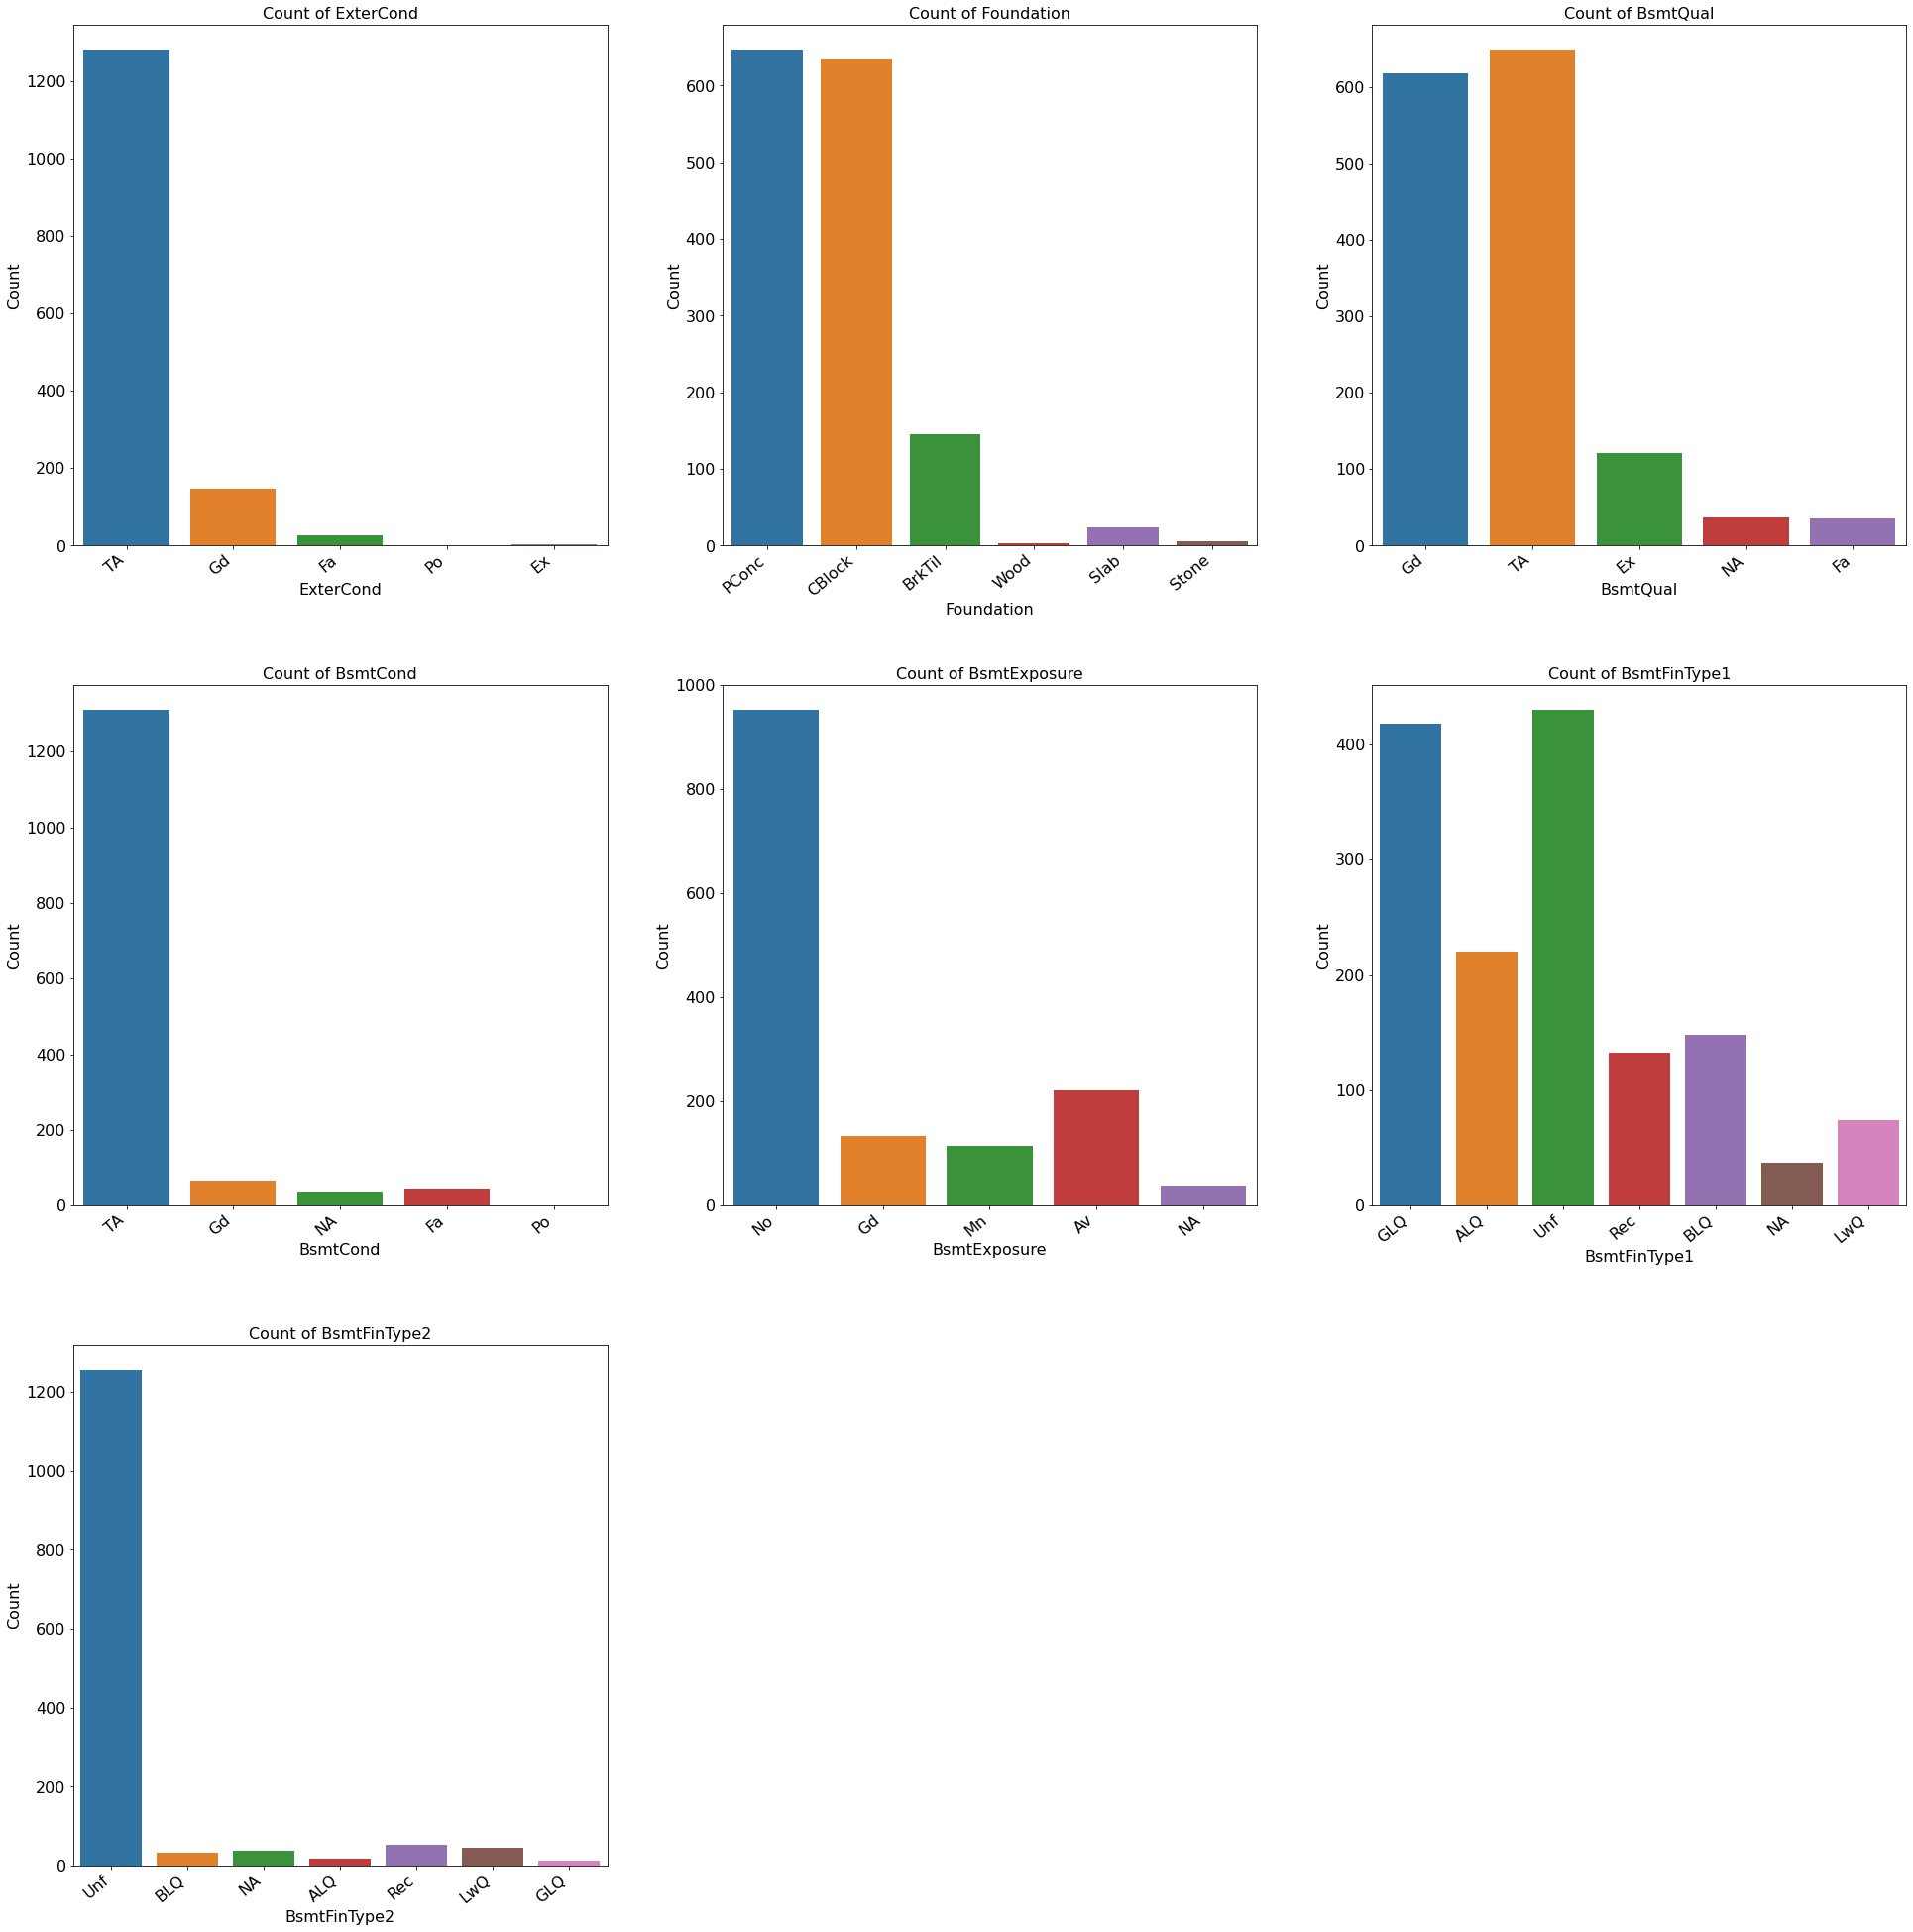

In [270]:
# Visualizing the data for the fourth slot
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_d.values()]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

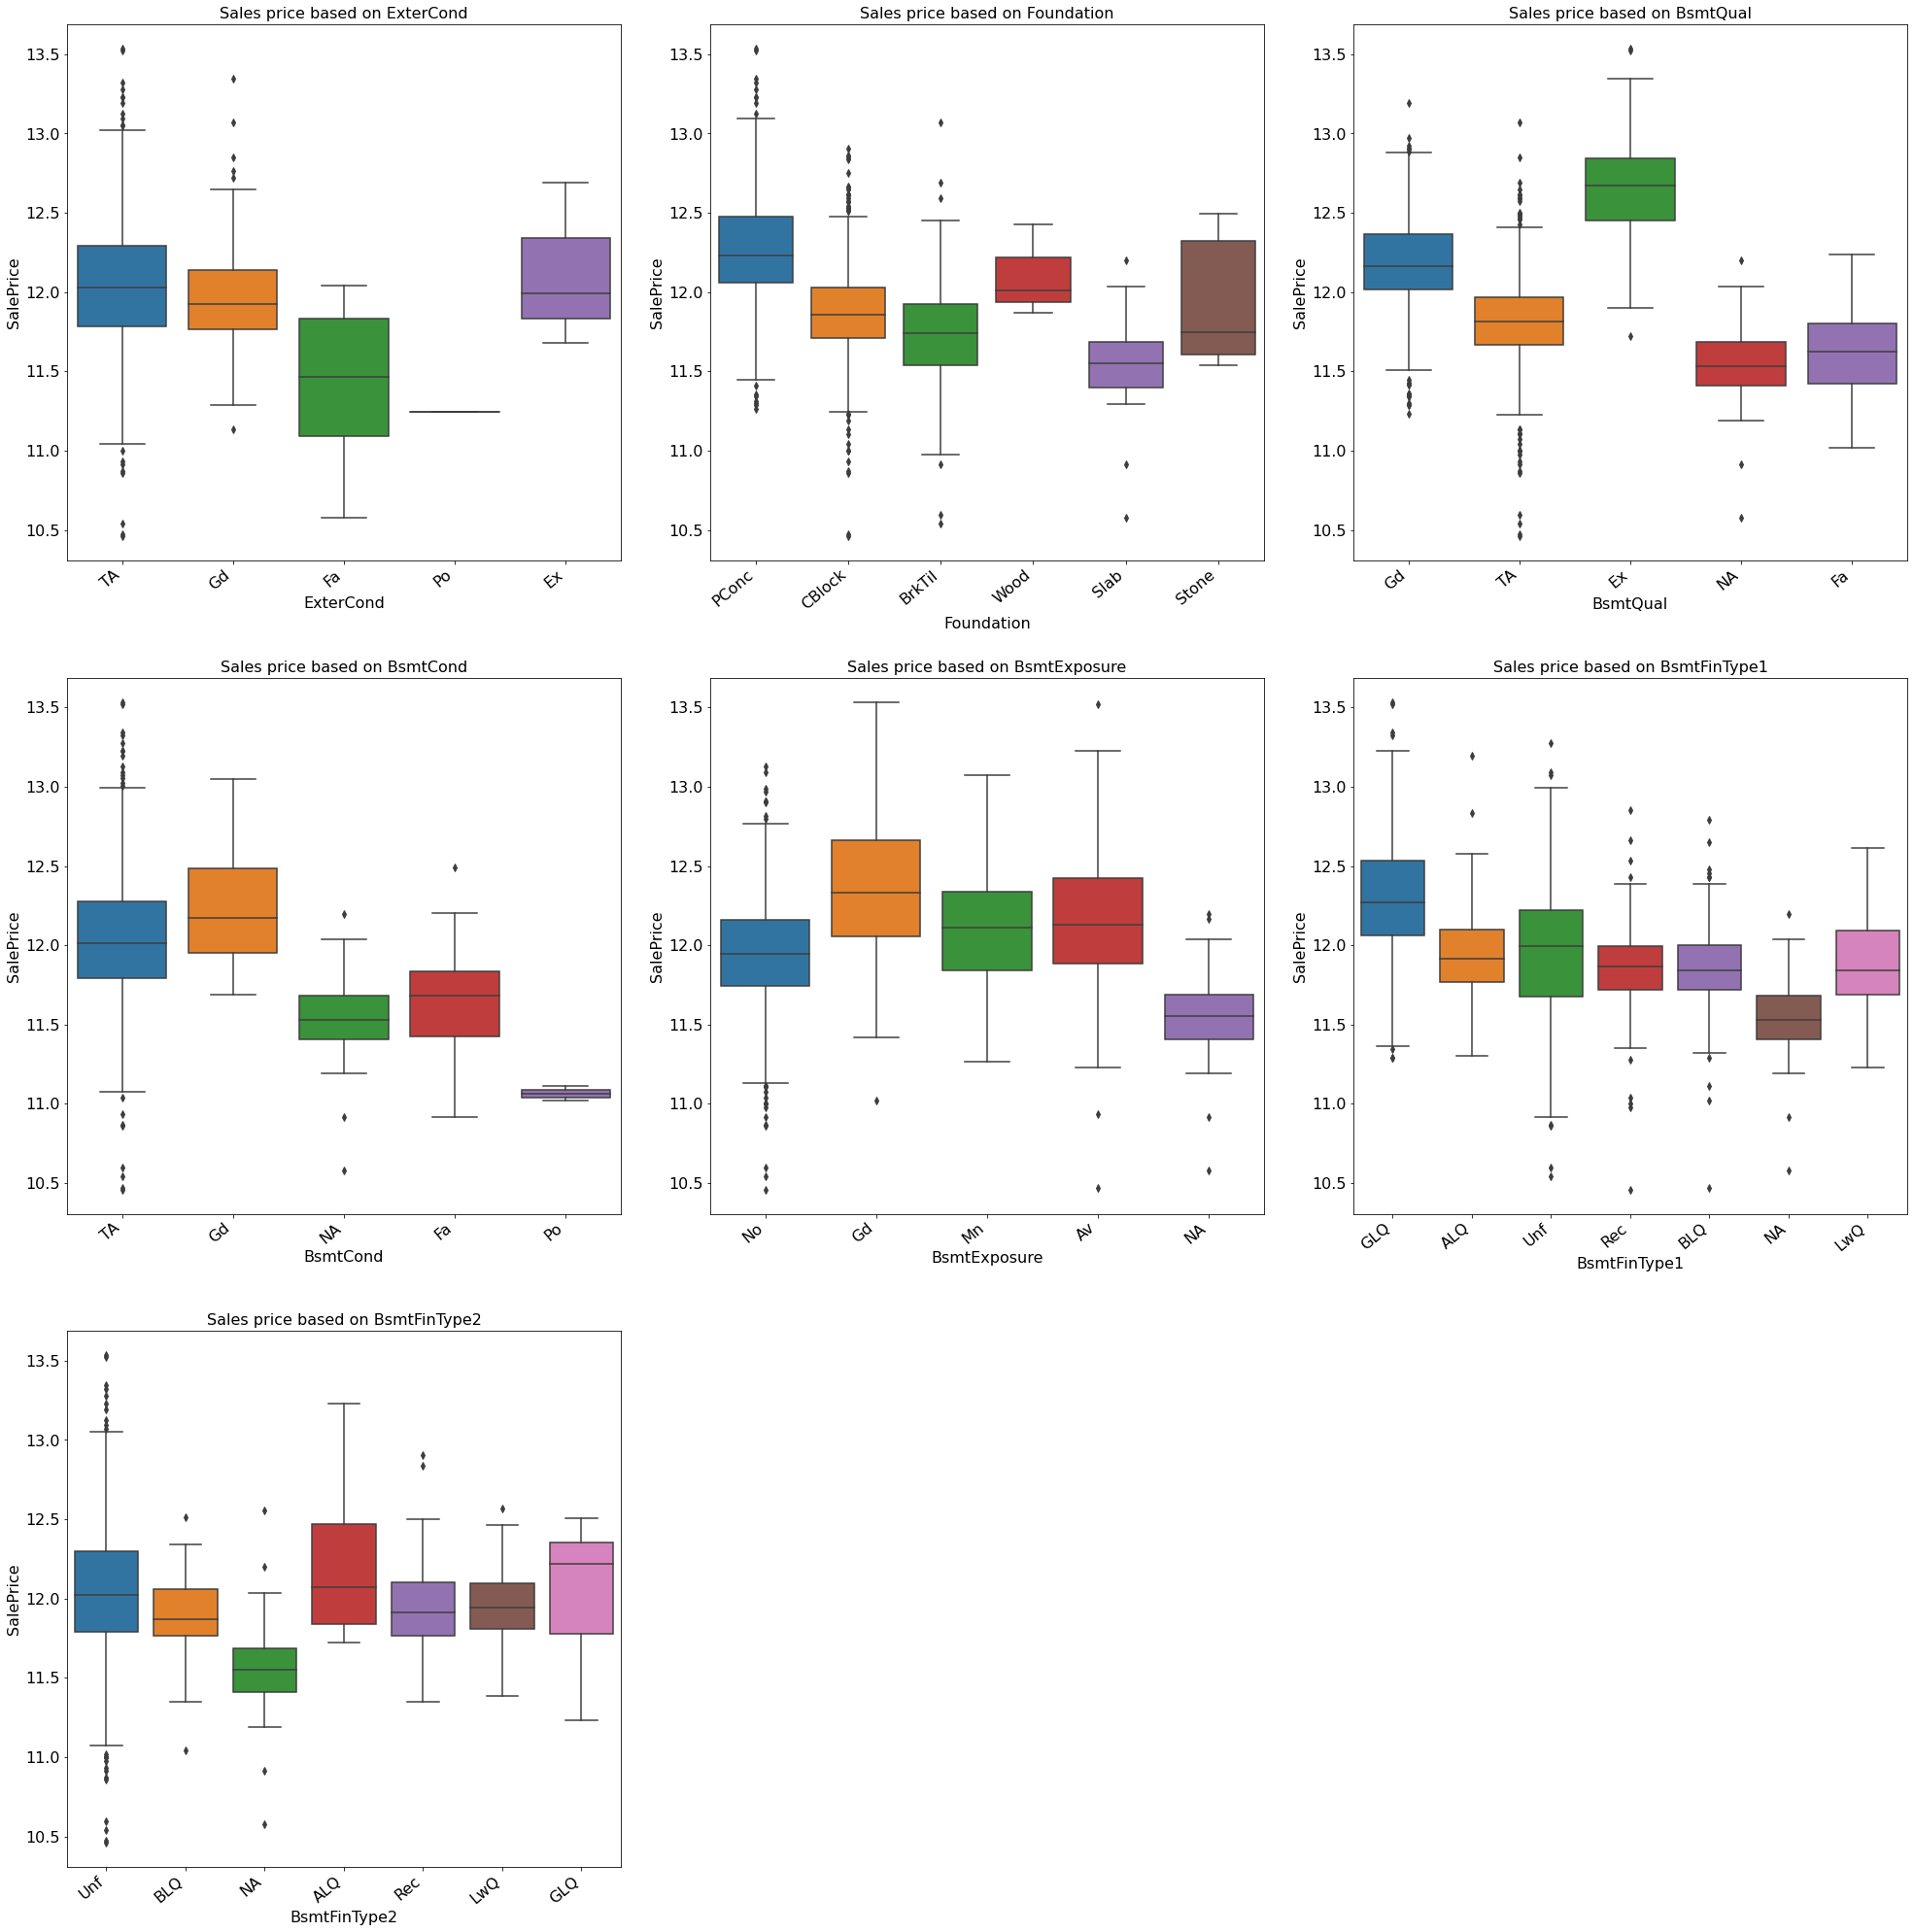

In [271]:
## Let's check these columns for the distribution of Sales price
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_d.values()]):
    plt.subplot(3,3,i+1)
    category_plot(j,df)
plt.show()

#### From above graphs, we have below observations:
- The Sales price are very high for Excellent type of External Condition as expected
- The Sales price are very high for Excellent type of Basement Quality as expected
- The Sales price are usually high for Good condition of basement

In [272]:
## We can drop the ExterCond column since most of the values are shifted towards Pave values
df = df.drop(['ExterCond'],axis =1)
rem_col(slot_d, 'ExterCond')
cat_data.remove('ExterCond')

In [273]:
### The next interesting column is Foundation, let's do a value count on it
df.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [274]:
### We observe that the represenation of Slab, Stone and Wood is quite low, we can merge these and rename
df['Foundation'] = df['Foundation'].replace(['Slab', 'Stone', 'Wood'],'Others')

In [275]:
### Let's check the column BsmtCond
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

#### The distribution is highly skewed, 1311 for TA alone

In [276]:
## We can drop the BsmtCond column since most of the values are shifted towards TA values
df = df.drop(['BsmtCond'],axis =1)
rem_col(slot_d, 'BsmtCond')
cat_data.remove('BsmtCond')

In [277]:
#### Let's observe the BsmtFinType2 column by using value counts()
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### The distribution is highly skewed, 1256 for Unf alone

In [278]:
## We can drop the BsmtFinType2 column since most of the values are shifted towards Unf values
df = df.drop(['BsmtFinType2'],axis =1)
rem_col(slot_d, 'BsmtFinType2')
cat_data.remove('BsmtFinType2')

In [279]:
### Checking the dataframe shape 
df.shape

(1460, 57)

#### Visualizing the data for the fifth slot

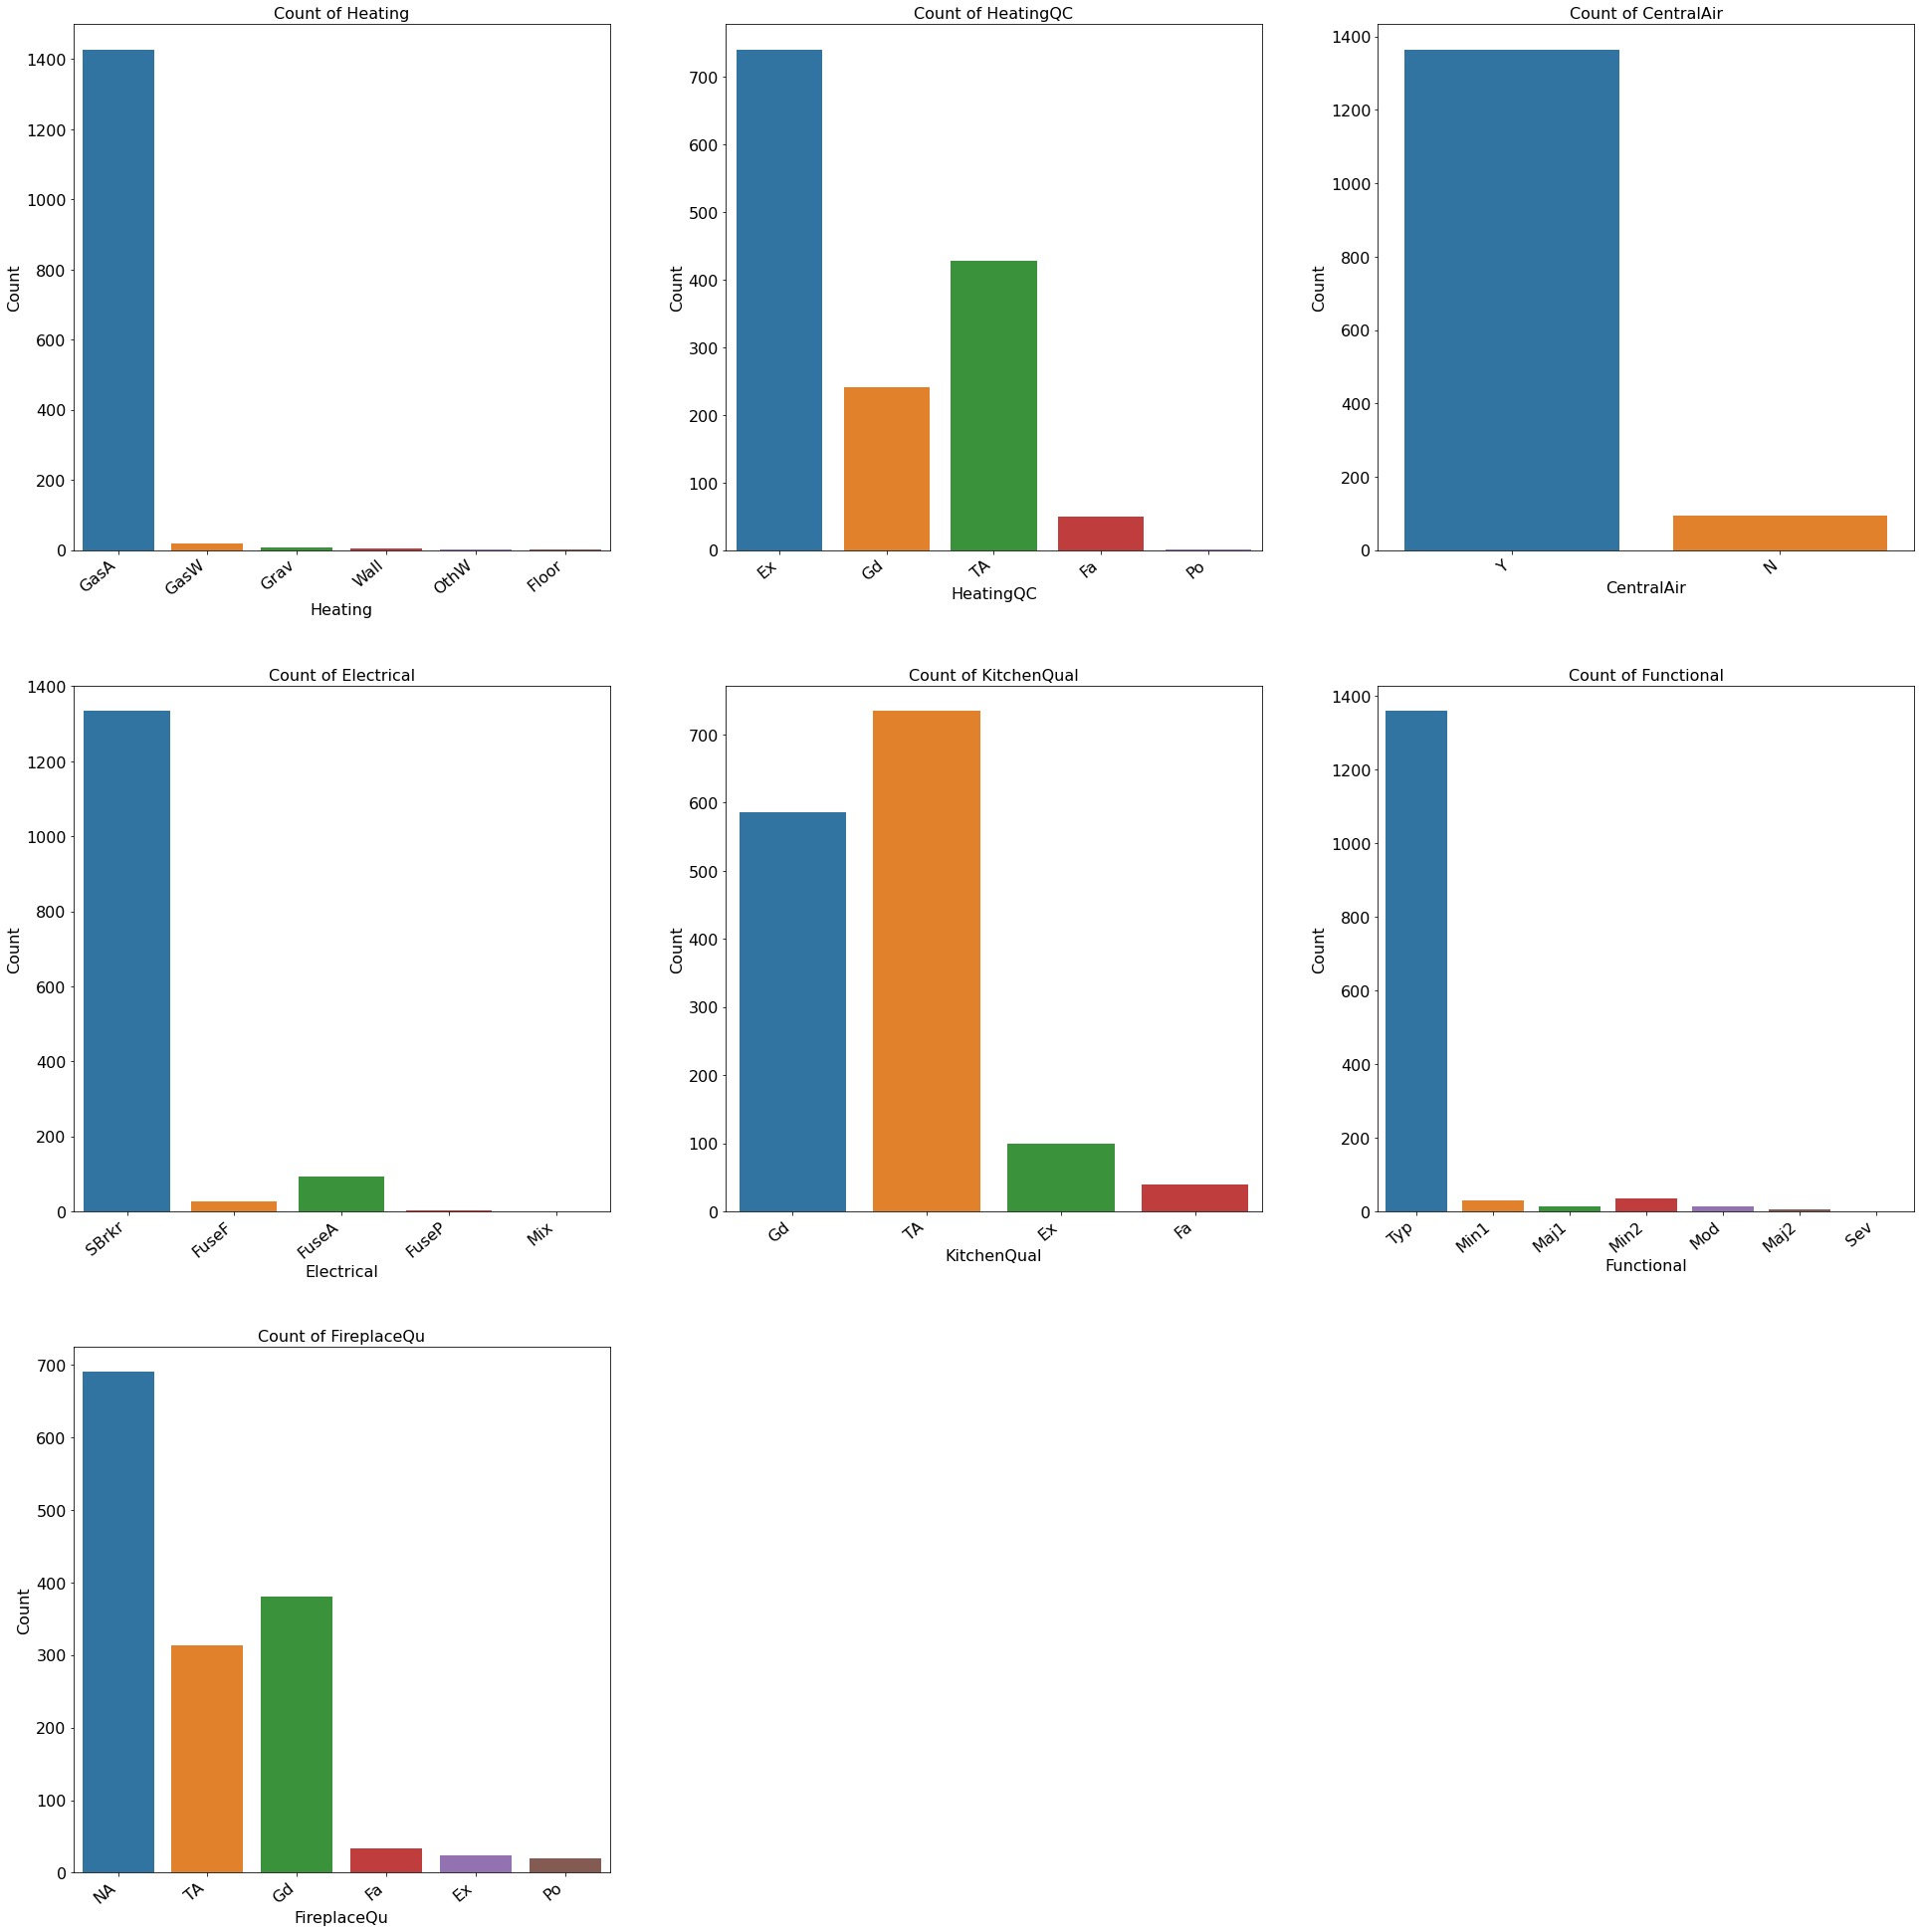

In [280]:
# Visualizing the data for the fifth slot
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_e.values()]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

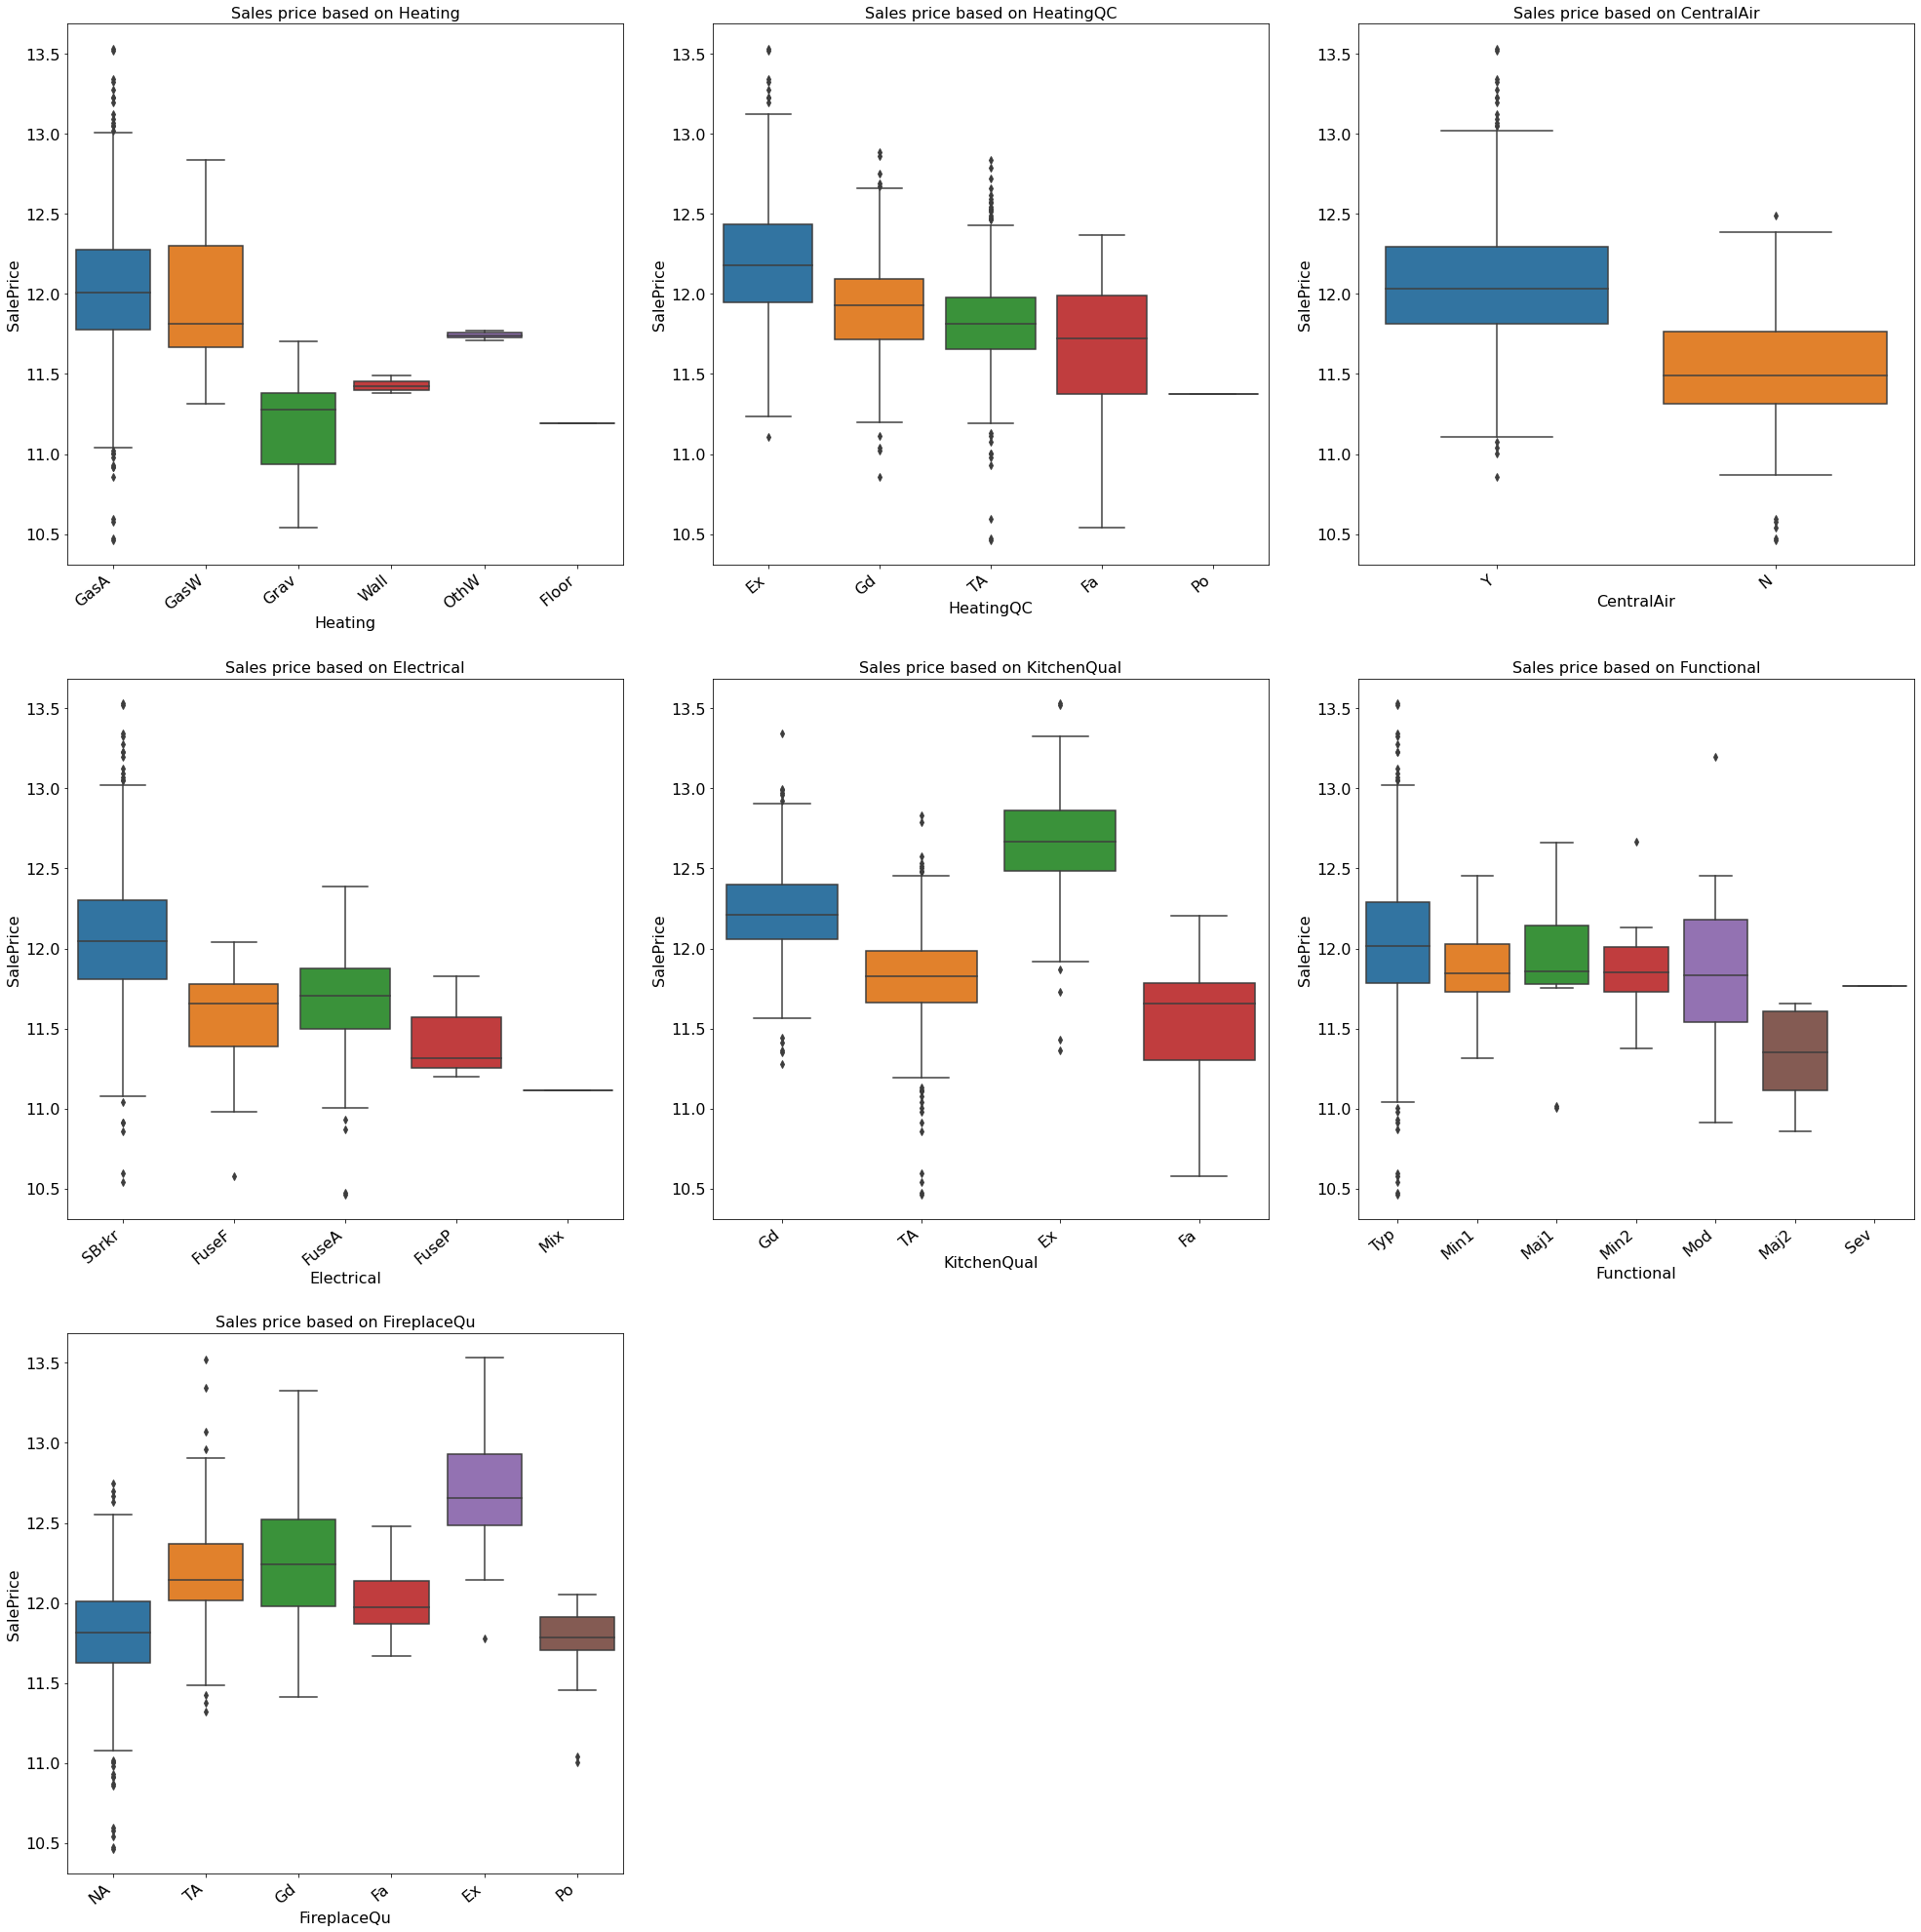

In [281]:
## Let's check these columns for the distribution of Sales price
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_e.values()]):
    plt.subplot(3,3,i+1)
    category_plot(j,df)
plt.show()

#### From above graphs, we have below observations:
- The Sales price are usually high for Excellent type HeatingQC(Heating quality and condition)
- The Sales price are high for houses with Central Air as expected
- The Sales price are very high for Excellent type of Kitchen Quality as expected

In [282]:
### Let's observe the Heating column by using value counts()
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

#### The distribution is highly skewed, 1428 for GasA alone

In [283]:
# We can drop the Heating column since most of the values are shifted towards Unf values
df = df.drop(['Heating'],axis =1)
rem_col(slot_d, 'Heating')
cat_data.remove('Heating')

In [284]:
### Let's observe the CentralAir column by using value counts()
df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

#### The distribution is highly skewed, 1365 for Y alone

In [285]:
## We can drop the CentralAir column since most of the values are shifted towards GasA values
df = df.drop(['CentralAir'],axis =1)
rem_col(slot_d, 'CentralAir')
cat_data.remove('CentralAir')

In [286]:
### Let's observe the Electrical column by using value counts()
df.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### The distribution is highly skewed, 1335 for SBrkr alone

In [287]:
# We can drop the Electrical column since most of the values are shifted towards SBrkr values
df = df.drop(['Electrical'],axis =1)
rem_col(slot_d, 'Electrical')
cat_data.remove('Electrical')

In [288]:
### Let's observe the Functional column by using value counts()
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

#### The distribution is highly skewed, 1360 for Typ alone

In [289]:
# We can drop the Functional column since most of the values are shifted towards Typ values
df = df.drop(['Functional'],axis =1)
rem_col(slot_e, 'Functional')
cat_data.remove('Functional')

In [290]:
### Let's observe the FireplaceQu column by using value counts()
df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### The distribution for FireplaceQu is looking good, we can use it as is

In [291]:
### Checking the dataframe shape 
df.shape

(1460, 53)

#### Visualizing the data for the sixth slot

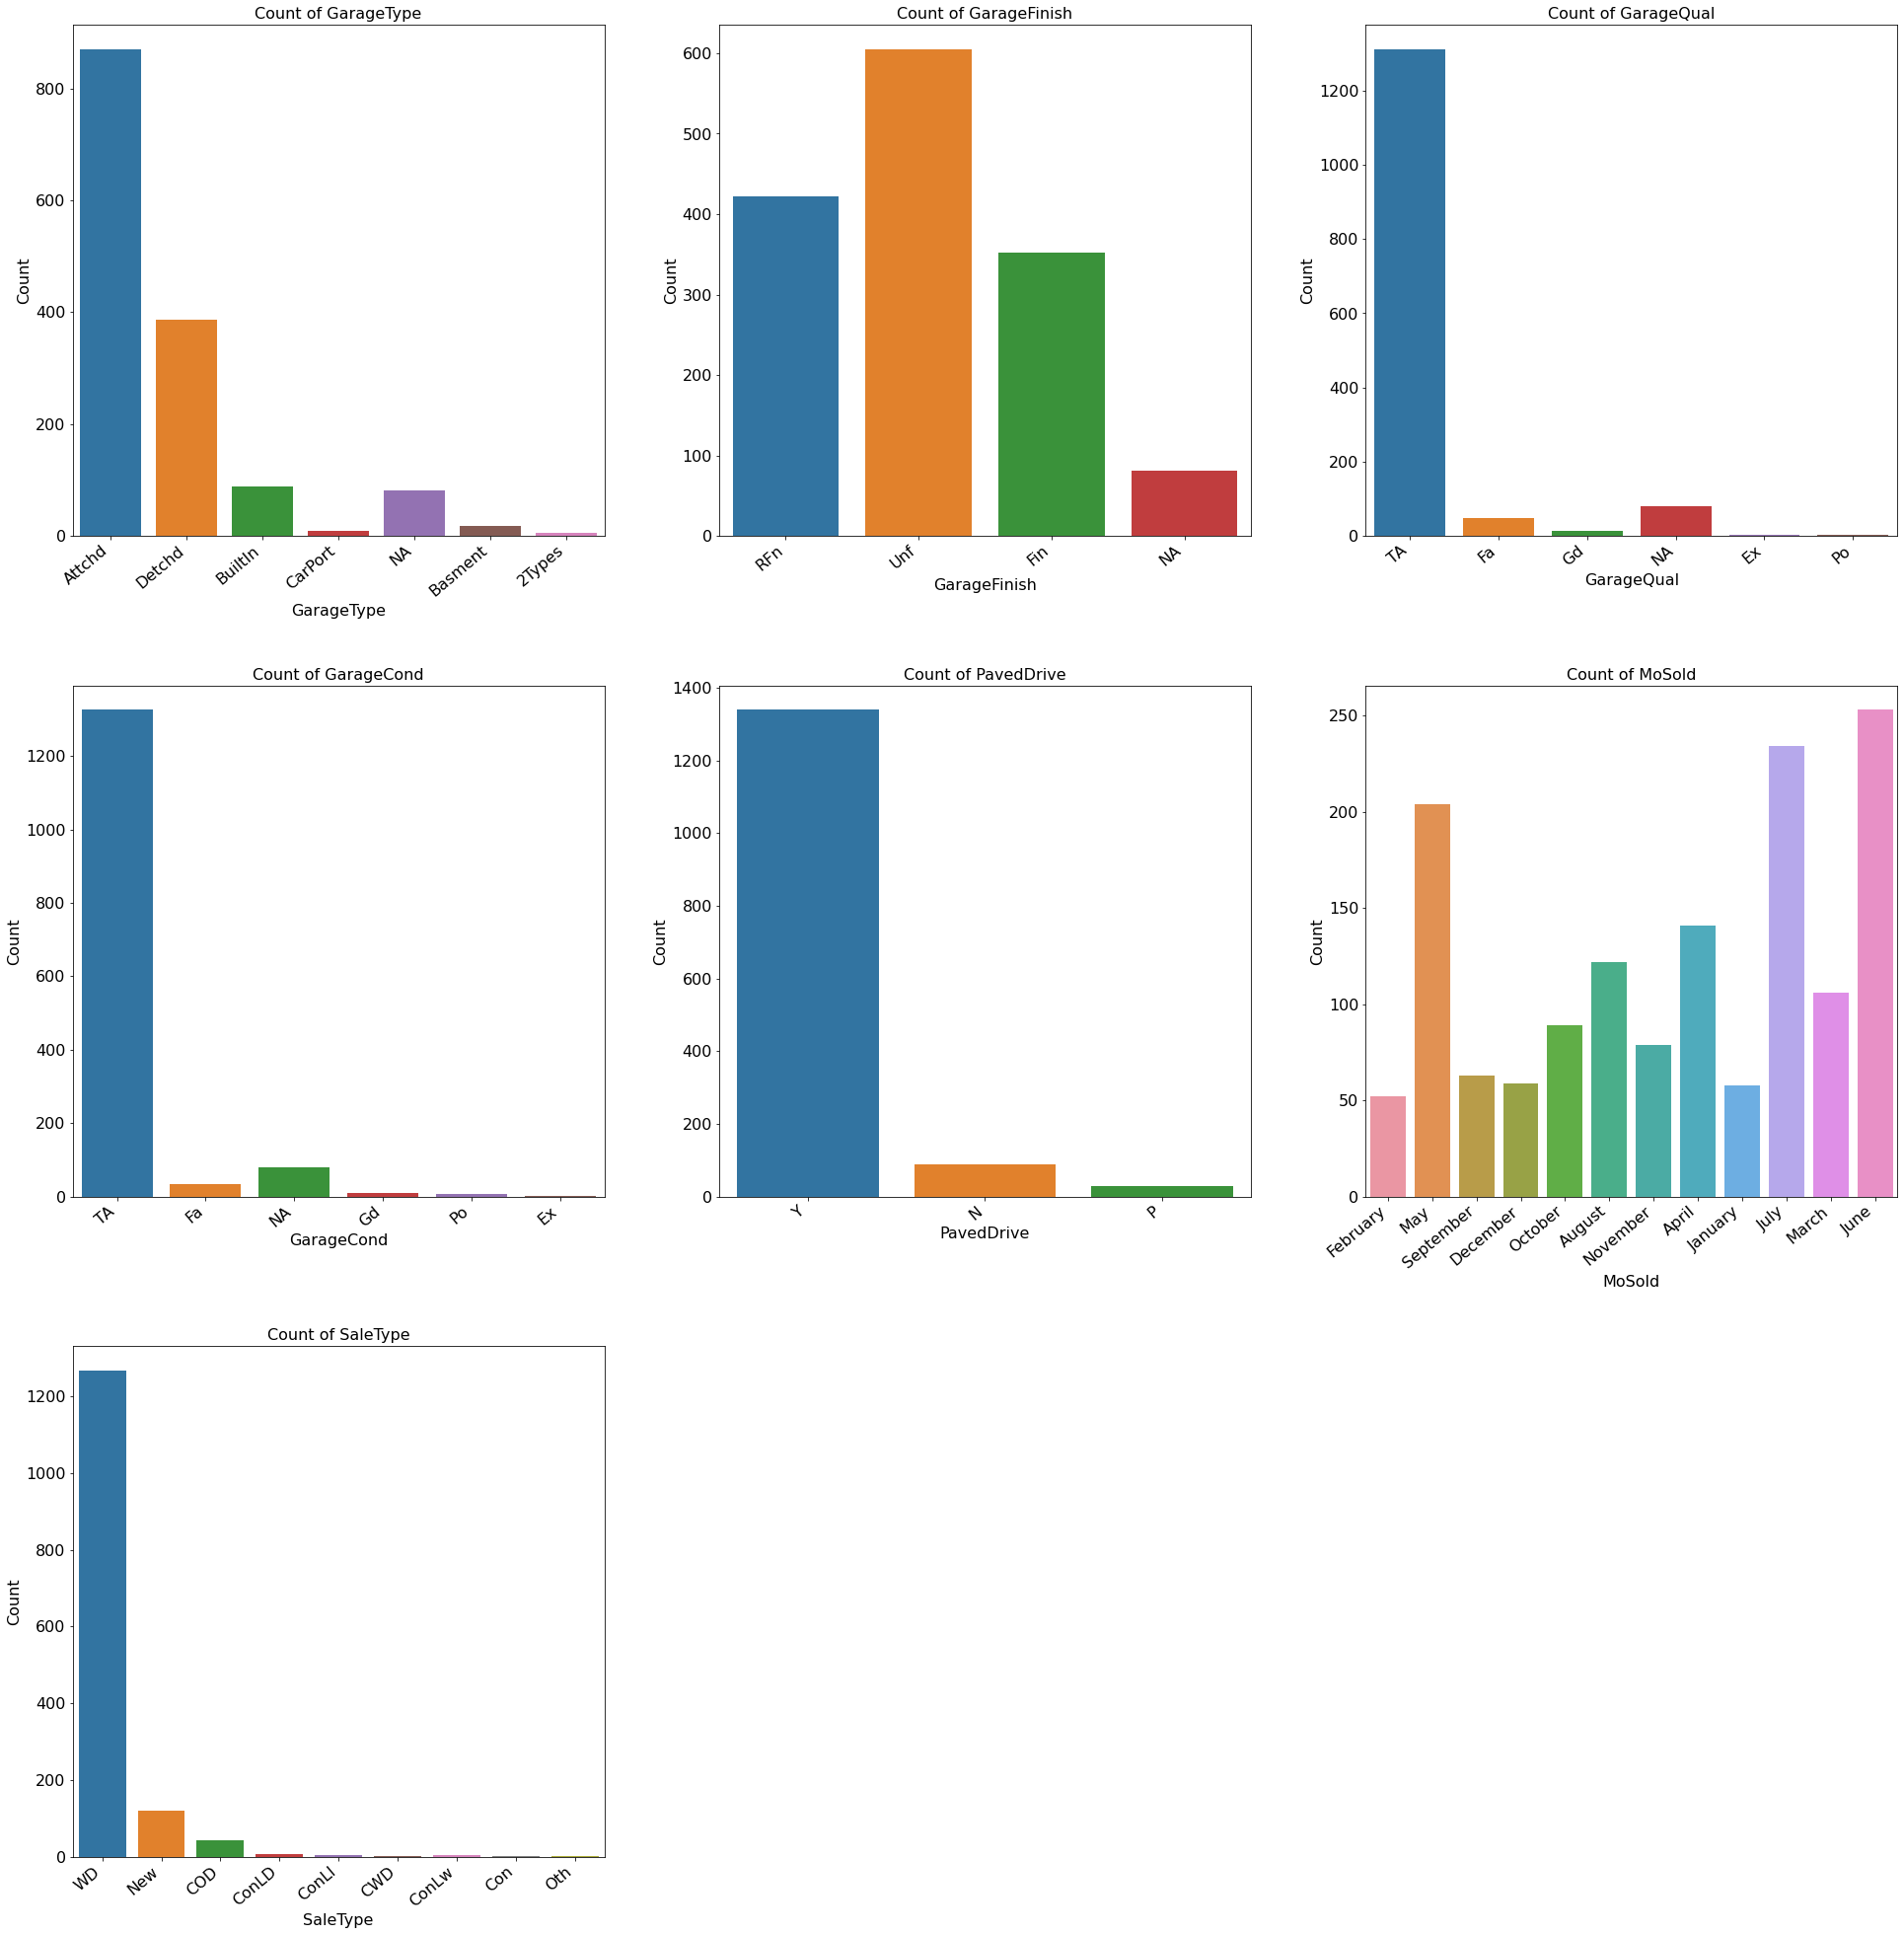

In [292]:
# Visualizing the data for the sixth slot
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_f.values()]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

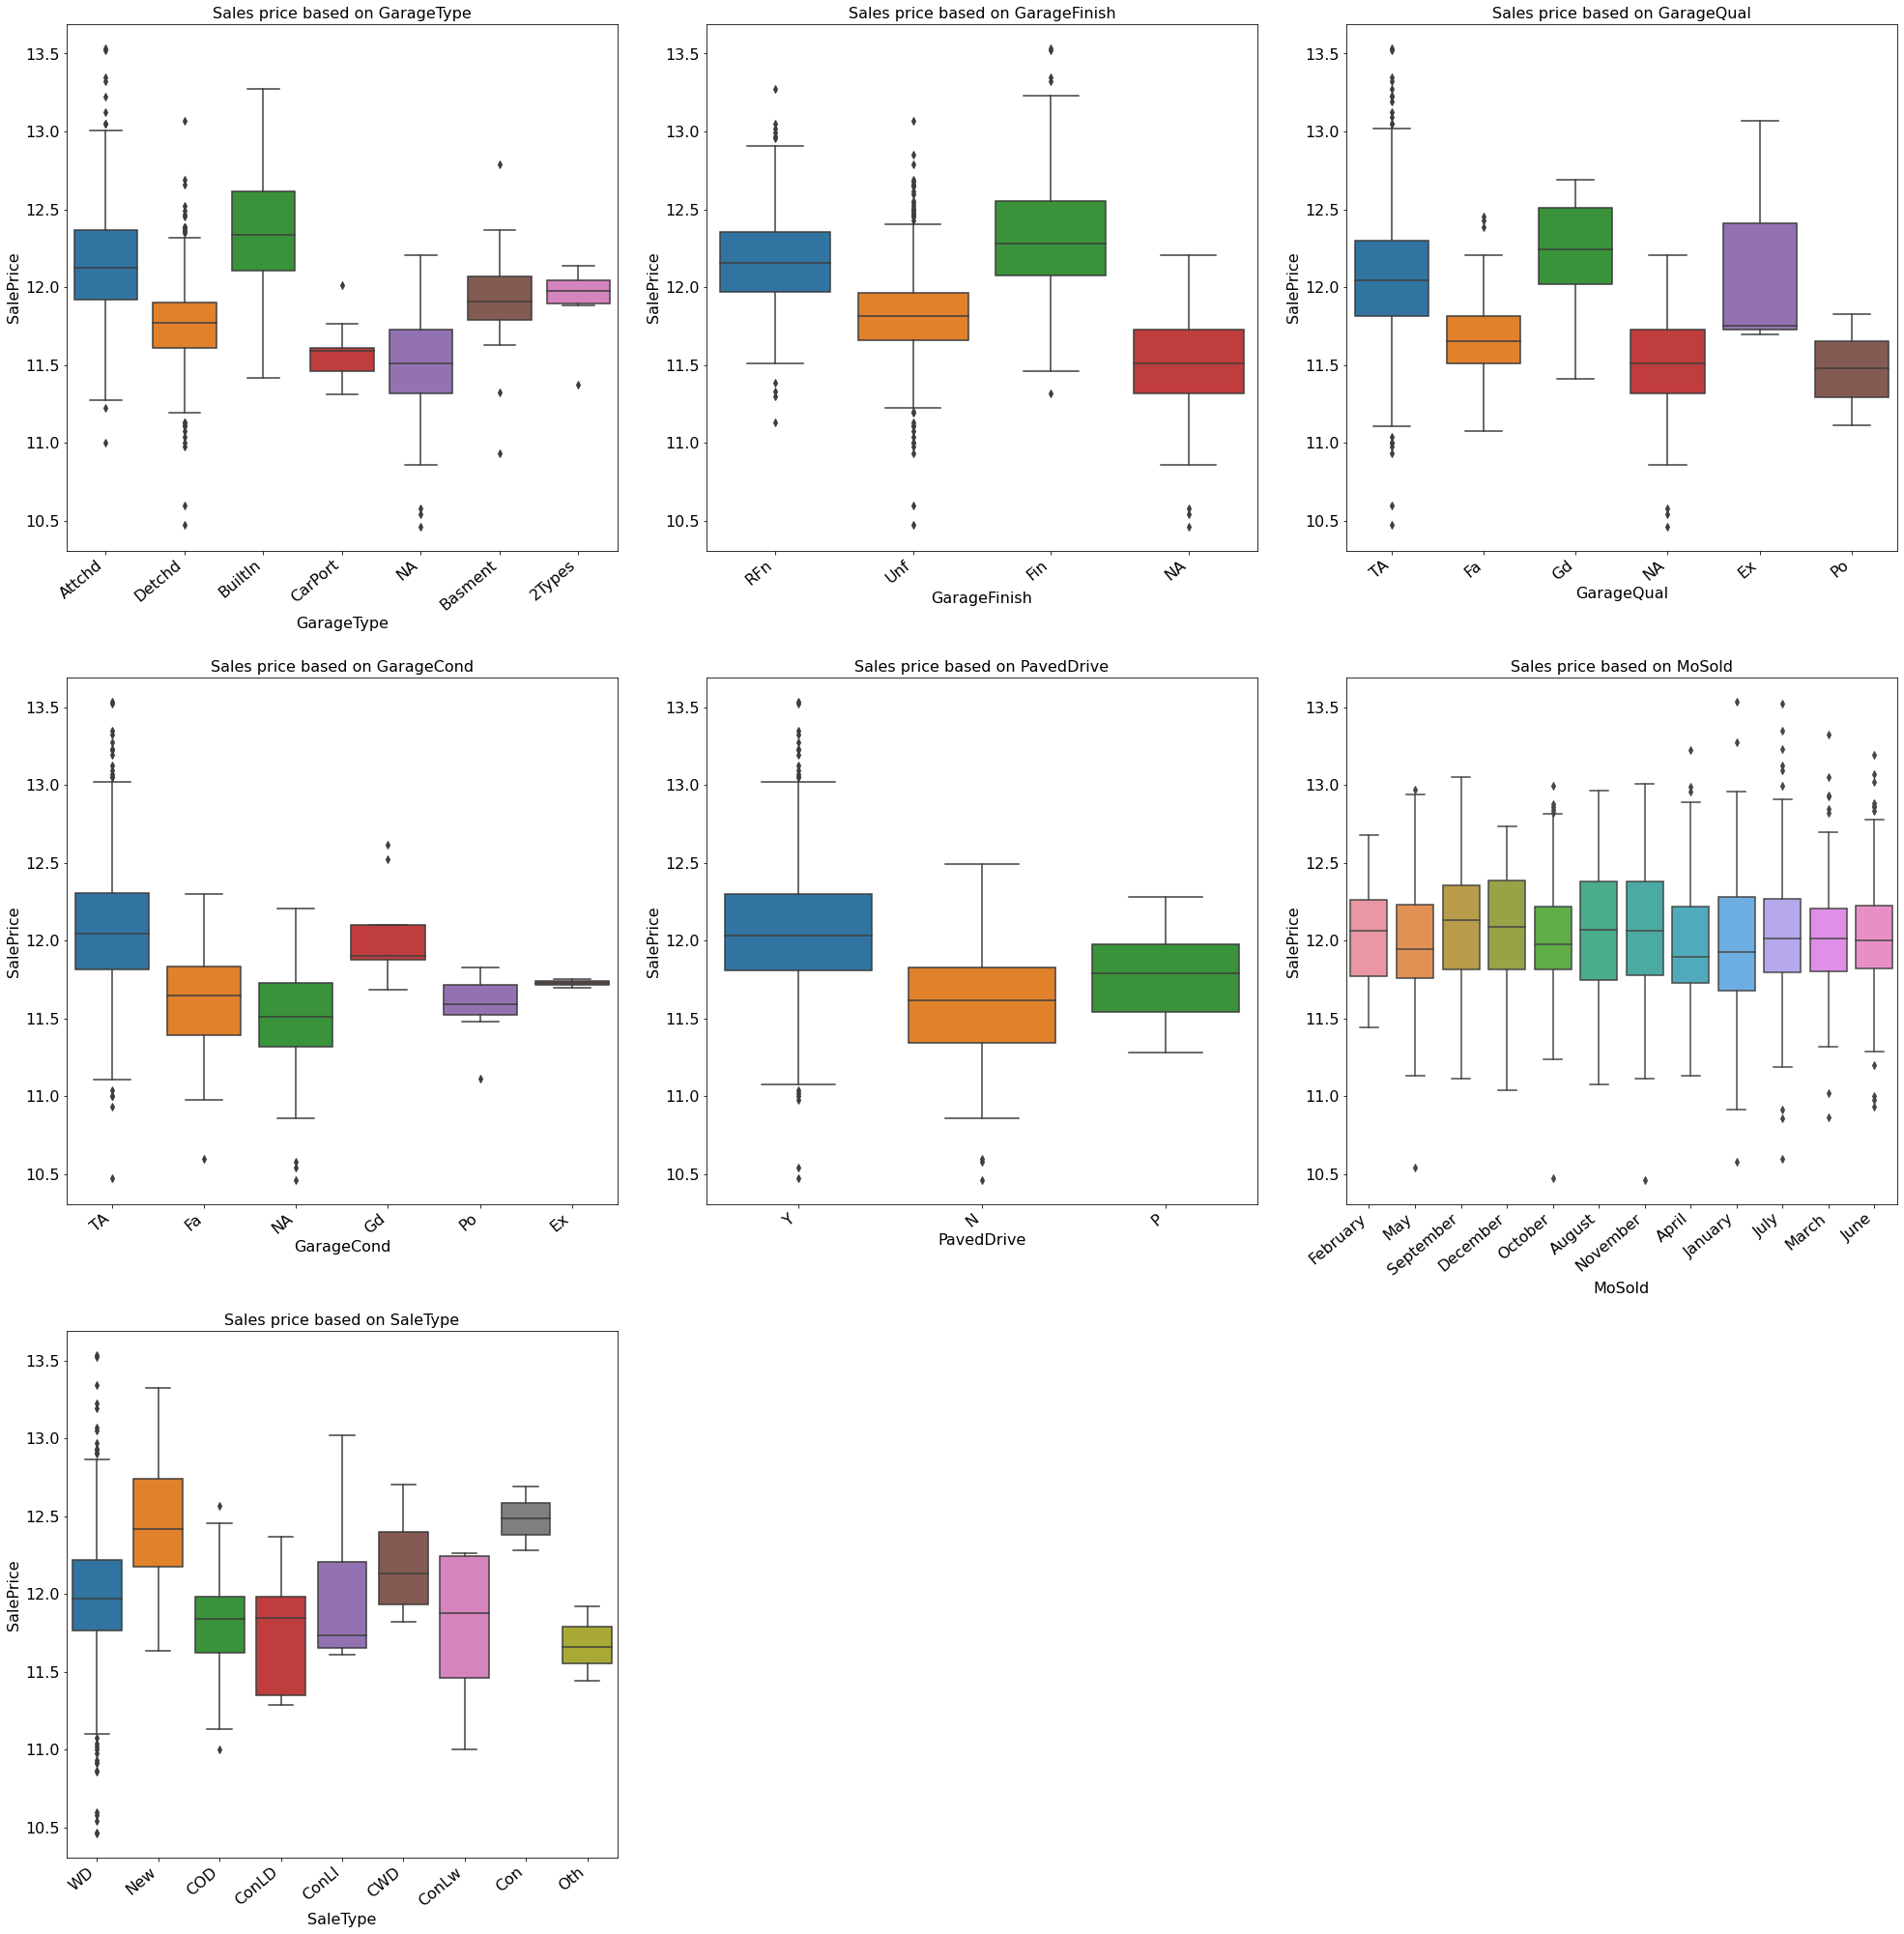

In [293]:
## Let's check these columns for the distribution of Sales price
plt.figure(figsize = (28, 28))
for i,j in enumerate(df.loc[:,slot_f.values()]):
    plt.subplot(3,3,i+1)
    category_plot(j,df)
plt.show()

#### From above graphs, we have below observations:
- The Sales price are usually high for Bulitin type Garage Type
- The Sales price are high for houses with Finished Garage as expected
- The Sales price are very high for Paved drive
- The Sales price are high for houses just constructed and sold

In [294]:
### Let's observe the GarageType column by using value counts()
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [295]:
### We observe that the represenation of Basment, CarPort and 2Types is quite low, we can merge these and rename
df['GarageType'] = df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')

In [296]:
### Let's check the GarageQual column by doing value counts
df.GarageQual.value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [297]:
# We can drop the GarageQual column since most of the values are shifted towards TA values
df = df.drop(['GarageQual'],axis =1)
rem_col(slot_f, 'GarageQual')
cat_data.remove('GarageQual')

In [298]:
### Let's observe the GarageCond column by using value counts()
df.GarageCond.value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [299]:
# The distribution is highly skewed, 1326 for TA alone

In [300]:
## We can drop the GarageCond column since most of the values are shifted towards TA values
df = df.drop(['GarageCond'],axis =1)
rem_col(slot_f, 'GarageCond')
cat_data.remove('GarageCond')

In [301]:
### Let's observe the PavedDrive column by using value counts()
df.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

#### The distribution is highly skewed, 1340 for Y alone

In [302]:
# We can drop the PavedDrive column since most of the values are shifted towards SBrkr values
df = df.drop(['PavedDrive'],axis =1)
rem_col(slot_f, 'PavedDrive')
cat_data.remove('PavedDrive')

In [303]:
### Let's observe the SaleType column by using value counts()
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

#### The distribution is highly skewed, 1267 for WD alone

In [304]:
# We can drop the Functional column since most of the values are shifted towards Typ values
df = df.drop(['SaleType'],axis =1)
rem_col(slot_f, 'SaleType')
cat_data.remove('SaleType')

In [305]:
df.shape

(1460, 49)

#### Visualizing the data for the seventh slot

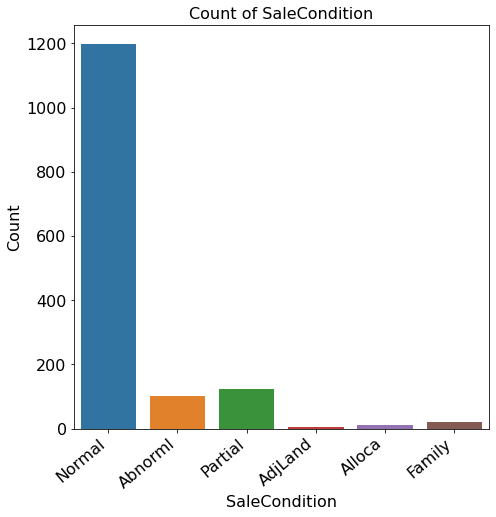

In [306]:
# Visualizing the data for the seventh slot
plt.figure(figsize = (21, 21))
for i,j in enumerate(df.loc[:,slot_g.values()]):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.show()

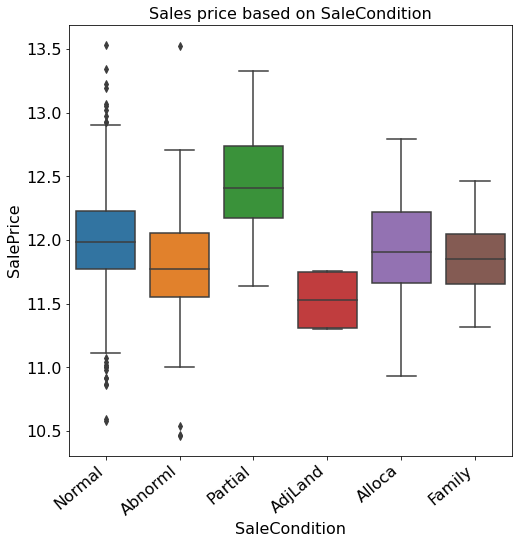

In [307]:
## Let's check these columns for the distribution of Sales price
plt.figure(figsize = (21, 21))
for i,j in enumerate(df.loc[:,slot_g.values()]):
    plt.subplot(3,3,i+1)
    category_plot(j,df)
plt.show()

In [308]:
### Let's observe the SaleCondition column by using value counts()
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [309]:
### We observe that the represenation of Family, Alloca, AdjLand is quite low, we can merge these and rename
df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

In [310]:
### Let's now check the updated shape of the dataset
df.shape

(1460, 49)

In [311]:
### We are left with 49 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

#### Using EDA, we have reduced the number of columns to 49

#### Let's check the correlation matrix for the numerical columns

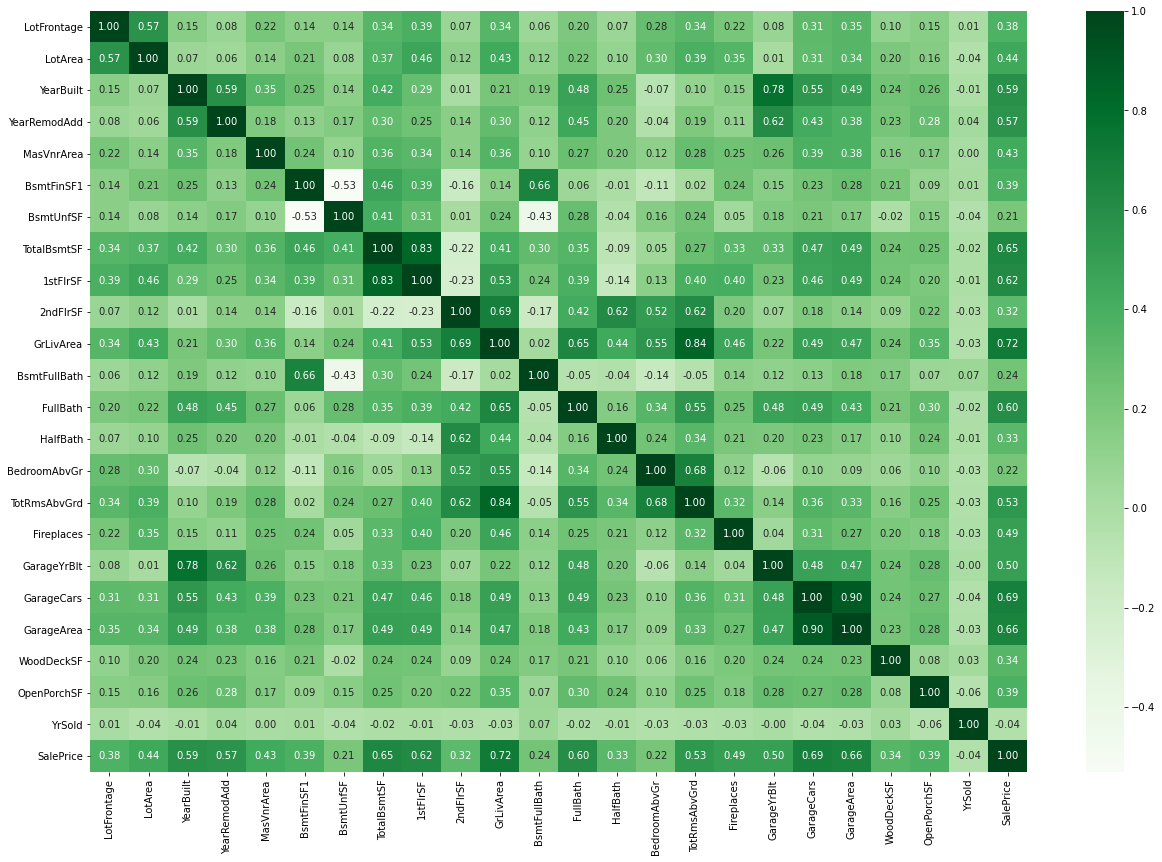

In [312]:
plt.figure(figsize = (21,14))
sns.heatmap(df.corr(), cmap = 'Greens',fmt='.2f', annot = True)
plt.show()

#### From the above matrix, we can observe below things:
- There is very high correlation between GarageCars and GarageArea
- There is high correlation between TotalRmsAbvGrd and GrLivArea
- There is high correlation between GarageYrBlt and YearBlt,and it is self explaining
- Also , the correlation between GrLivArea and SlePrice is very high, as expected

## Step 4: Preparing the data for modelling

- Converting categorical vars to dummy
- Splitting the train and test
- Rescaling of variables

#### Look at categorical columns

In [313]:
cat_data

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'MoSold',
 'SaleCondition']

In [314]:
df[cat_data].shape

(1460, 25)

In [315]:
df[num_vars].shape

(1460, 24)

In [316]:
## Take a backup of dataframe 
inp = df.copy()

In [317]:
### We will take columns with object datatype and create those in dummy variables

In [318]:
### Let's name the data for cat_data as cats
cats = inp[cat_data]

In [319]:
### Let's convert to dummies

In [320]:
cats = pd.get_dummies(cats,drop_first=True)  # Dummy variables
print(cats.shape)

(1460, 143)


In [321]:
### We had a column named MoSold, we need to convert it to dummies as well
inp.MoSold = pd.get_dummies(inp.MoSold,drop_first=True)

In [322]:
### Let's check the head
cats.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,...,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [323]:
# concat dummy variables with main dataset
inp = pd.concat([inp, cats], axis=1) 

In [324]:
### Let's check the head
inp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,...,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450.0,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,Ex,856.0,854,1710.0,1,2,1,3,Gd,8,0,NA,Attchd,2003.0,RFn,2,548.0,0.0,61.0,0,2008,Normal,12.247694,0,...,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600.0,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,Ex,1262.0,0,1262.0,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460.0,298.0,0.0,0,2007,Normal,12.109011,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2-STORY 1946 & NEWER,RL,68.0,11250.0,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,Ex,920.0,866,1786.0,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608.0,0.0,42.0,0,2008,Normal,12.317167,0,...,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,2-STORY 1945 & OLDER,RL,60.0,9550.0,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,Gd,961.0,756,1717.0,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642.0,0.0,35.0,0,2006,Abnorml,11.849398,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260.0,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,Ex,1145.0,1053,2198.0,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836.0,192.0,84.0,0,2008,Normal,12.429216,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [325]:
### We can drop the original categorical variables as these are repeating in the dummy variales
inp.drop(cat_data,axis=1,inplace=True) 

In [326]:
### Let's check the input now
inp.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450.0,2003,2003,196.0,706.0,150.0,856.0,856.0,854,1710.0,1,2,1,3,8,0,2003.0,2,548.0,0.0,61.0,2008,12.247694,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600.0,1976,1976,0.0,978.0,284.0,1262.0,1262.0,0,1262.0,0,2,0,3,6,1,1976.0,2,460.0,298.0,0.0,2007,12.109011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,68.0,11250.0,2001,2002,162.0,486.0,434.0,920.0,920.0,866,1786.0,1,2,1,3,6,1,2001.0,2,608.0,0.0,42.0,2008,12.317167,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,60.0,9550.0,1915,1970,0.0,216.0,540.0,756.0,961.0,756,1717.0,1,1,0,3,7,1,1998.0,3,642.0,0.0,35.0,2006,11.849398,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260.0,2000,2000,350.0,655.0,490.0,1145.0,1145.0,1053,2198.0,1,2,1,4,9,1,2000.0,3,836.0,192.0,84.0,2008,12.429216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Feature Engineering

#### The year columns are YearBuilt, YearRemodAdd, GarageYrBlt and YrSold
We can create a new column named house age, which will be YrSold - YearBuilt
After doing that we can drop these columns

In [327]:
inp['HouseAge'] = inp['YrSold'] - inp['YearBuilt']

In [328]:
num_vars.append('HouseAge')

In [329]:
## We can drop the colmns YearBuilt, YearRemodAdd, GarageYrBlt and YrSold as these will not be used
inp.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) 

In [330]:
### Let's remove these from num_vars list too
num_vars.remove('YearBuilt')
num_vars.remove('YearRemodAdd')
num_vars.remove('GarageYrBlt')
num_vars.remove('YrSold')

In [331]:
inp.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,HouseAge
0,65.0,8450.0,196.0,706.0,150.0,856.0,856.0,854,1710.0,1,2,1,3,8,0,2,548.0,0.0,61.0,12.247694,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,5
1,80.0,9600.0,0.0,978.0,284.0,1262.0,1262.0,0,1262.0,0,2,0,3,6,1,2,460.0,298.0,0.0,12.109011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,31
2,68.0,11250.0,162.0,486.0,434.0,920.0,920.0,866,1786.0,1,2,1,3,6,1,2,608.0,0.0,42.0,12.317167,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7
3,60.0,9550.0,0.0,216.0,540.0,756.0,961.0,756,1717.0,1,1,0,3,7,1,3,642.0,0.0,35.0,11.849398,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,91
4,84.0,14260.0,350.0,655.0,490.0,1145.0,1145.0,1053,2198.0,1,2,1,4,9,1,3,836.0,192.0,84.0,12.429216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,8


In [332]:
# Putting feature variable to X
X = inp.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,HouseAge
0,65.0,8450.0,196.0,706.0,150.0,856.0,856.0,854,1710.0,1,2,1,3,8,0,2,548.0,0.0,61.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,5
1,80.0,9600.0,0.0,978.0,284.0,1262.0,1262.0,0,1262.0,0,2,0,3,6,1,2,460.0,298.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,31
2,68.0,11250.0,162.0,486.0,434.0,920.0,920.0,866,1786.0,1,2,1,3,6,1,2,608.0,0.0,42.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7
3,60.0,9550.0,0.0,216.0,540.0,756.0,961.0,756,1717.0,1,1,0,3,7,1,3,642.0,0.0,35.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,91
4,84.0,14260.0,350.0,655.0,490.0,1145.0,1145.0,1053,2198.0,1,2,1,4,9,1,3,836.0,192.0,84.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,8


In [333]:
## dropping SalePrice from num_vars 
num_vars.remove('SalePrice')

In [334]:
# Putting response variable to y
y = inp['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [335]:
## Splitting Train-Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [336]:
## Performing scaling
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,HouseAge
210,-0.106549,-1.124157,-0.668736,0.060131,-0.374234,-0.504547,-0.812546,-0.787597,-1.335069,1.076638,-1.064471,-0.763509,-1.101707,-0.935650,-0.939097,-2.396900,-2.297804,-0.784357,-0.820245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.529604
318,1.267471,0.084927,1.279541,1.263662,-0.458073,0.756968,0.580543,2.140556,2.383361,1.076638,0.793349,1.309743,1.487114,1.556976,0.645726,1.677298,0.921278,2.196447,0.335046,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.677573
239,-1.002649,-0.241267,-0.668736,-0.807153,0.196336,-0.841473,-0.993538,0.795996,-0.035079,-0.841769,-1.064471,1.309743,0.192704,0.310663,0.645726,-1.038834,-1.218234,-0.784357,1.875434,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.936631
986,-0.584469,-1.206902,-0.668736,-1.025134,-0.166966,-1.494431,-0.436851,0.669584,0.273747,-0.841769,-1.064471,-0.763509,-1.101707,-0.935650,-0.939097,-1.038834,-1.046484,2.669869,-0.820245,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.957862
1416,-0.524729,0.490207,-0.668736,-1.025134,0.513060,-0.731776,0.235013,1.611926,1.640510,-0.841769,0.793349,-0.763509,1.487114,2.803289,-0.939097,0.319232,0.450193,-0.784357,-0.820245,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.913207


#### __Performing RFECV__ - Recursive Feature Elimination Cross Validation on data to list out features that are more significant than others

In [337]:
# Initialising LinearRegression() object
lm = LinearRegression()
# Fitting the model
lm.fit(X_train, y_train)

# Performing REECV
rfecv = RFECV(lm, step=1, cv=5)
## Fitting the model
rfecv = rfecv.fit(X_train, y_train)

#### Checking the unique values and there count

In [338]:
# Checking unique values
np.unique(rfecv.support_,return_counts = True)

(array([False,  True]), array([112,  51], dtype=int64))

#### RFECV has given us 51 True columns

#### Taking the count of true values

In [339]:
## Taking the count of true values 
true_values = np.unique(rfecv.support_,return_counts = True)[1][1]

In [340]:
# Checking the values
true_values

51

#### THE RFECV has given us the value 51. We will choose 51 values as suggested by RFECV for our model

#### Choosing 51 features for RFE

In [341]:
# Initialising LinearRegression() object
lm = LinearRegression()
# Fitting the model
lm.fit(X_train, y_train)

# Performing REECV
rfe = RFE(lm, true_values)
## Fitting the model
rfe = rfe.fit(X_train, y_train)

In [342]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank')
rfe_ranking

,rank,support,features
81,1,True,OverallQual_Very Excellent
92,1,True,Exterior1st_CemntBd
89,1,True,OverallCond_Very Good
86,1,True,OverallCond_Fair
85,1,True,OverallCond_Excellent
...,...,...,...
153,109,False,MoSold_June
0,110,False,LotFrontage
22,111,False,MSSubClass_1-STORY PUD (Planned Unit Developme...
18,112,False,OpenPorchSF


#### Assigning selected features to a variable

In [343]:
## Taking selected features
col = X_train.columns[rfe.support_]

In [344]:
### Converting this to list for easy reference
col = list(col)

#### Checking the variables that got eliminated from the RFE

In [345]:
## Checking dropped values
dropped_col = X_train.columns[~rfe.support_]
dropped_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       ...
       'MoSold_July', 'MoSold_June', 'MoSold_March', 'MoSold_May',
       'MoSold_November', 'MoSold_October', 'MoSold_September',
       'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=112)

#### We have selected 51 columns and eliminated 112 columns for further study

In [346]:
## Taking the selected columns in a variable
X_train_rfe = X_train[col]

In [347]:
X_train_rfe.shape

(1021, 51)

#### Now, we will create functions that we will be using repeatedly to calculate vif

####  Creating function for calculating vif, we will look at columns for which vif is greater than 5

In [348]:
## Function to calculate vif
def calculate_vif(data):
    vif = pd.DataFrame()
    df = sm.add_constant(data)
    columns = df.columns
    vif['Features'] = columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [349]:
calculate_vif(X_train_rfe)

                                        Features     VIF
17                               BldgType_Duplex     inf
50                               GarageFinish_NA     inf
48                                 GarageType_NA     inf
41                               BsmtFinType1_NA     inf
7        MSSubClass_DUPLEX - ALL STYLES AND AGES     inf
38                                   BsmtQual_NA     inf
0                                          const  122.78
36                                  ExterQual_TA   13.03
35                                  ExterQual_Gd   11.60
33                           Exterior1st_VinylSd    9.92
45                                KitchenQual_TA    9.81
44                                KitchenQual_Gd    7.76
30                           Exterior1st_MetalSd    6.21
51                                      HouseAge    6.16
29                           Exterior1st_HdBoard    5.95
34                           Exterior1st_Wd Sdng    5.33
39                             

#### Removing since VIF is high

In [351]:
X_train_rfe = X_train_rfe.drop('BldgType_Duplex', axis = 1)

In [352]:
## Removing from col list
col.remove('BldgType_Duplex')

In [353]:
calculate_vif(X_train_rfe)

                                        Features     VIF
49                               GarageFinish_NA     inf
47                                 GarageType_NA     inf
40                               BsmtFinType1_NA     inf
37                                   BsmtQual_NA     inf
0                                          const  122.78
35                                  ExterQual_TA   13.03
34                                  ExterQual_Gd   11.60
32                           Exterior1st_VinylSd    9.92
44                                KitchenQual_TA    9.81
43                                KitchenQual_Gd    7.76
29                           Exterior1st_MetalSd    6.21
50                                      HouseAge    6.16
28                           Exterior1st_HdBoard    5.95
33                           Exterior1st_Wd Sdng    5.33
38                                   BsmtQual_TA    5.10
36                                   BsmtQual_Gd    4.28
31                           Ex

#### Removing since VIF is high

In [354]:
X_train_rfe = X_train_rfe.drop('GarageFinish_NA', axis = 1)

In [355]:
# Removing from col list
col.remove('GarageFinish_NA')

In [356]:
calculate_vif(X_train_rfe)

                                        Features     VIF
40                               BsmtFinType1_NA     inf
37                                   BsmtQual_NA     inf
0                                          const  122.78
35                                  ExterQual_TA   13.03
34                                  ExterQual_Gd   11.60
32                           Exterior1st_VinylSd    9.92
44                                KitchenQual_TA    9.81
43                                KitchenQual_Gd    7.76
29                           Exterior1st_MetalSd    6.21
49                                      HouseAge    6.16
28                           Exterior1st_HdBoard    5.95
33                           Exterior1st_Wd Sdng    5.33
38                                   BsmtQual_TA    5.10
36                                   BsmtQual_Gd    4.28
31                           Exterior1st_Plywood    3.47
30                            Exterior1st_Others    3.14
27                           Ex

#### Removing since VIF is high

In [357]:
X_train_rfe = X_train_rfe.drop('BsmtFinType1_NA', axis = 1)

In [358]:
# Removing from col list
col.remove('BsmtFinType1_NA')

In [359]:
calculate_vif(X_train_rfe)

                                        Features     VIF
0                                          const  122.78
35                                  ExterQual_TA   13.03
34                                  ExterQual_Gd   11.60
32                           Exterior1st_VinylSd    9.92
43                                KitchenQual_TA    9.81
42                                KitchenQual_Gd    7.76
29                           Exterior1st_MetalSd    6.21
48                                      HouseAge    6.16
28                           Exterior1st_HdBoard    5.95
33                           Exterior1st_Wd Sdng    5.33
38                                   BsmtQual_TA    5.10
36                                   BsmtQual_Gd    4.28
31                           Exterior1st_Plywood    3.47
30                            Exterior1st_Others    3.14
27                           Exterior1st_CemntBd    2.74
21                         OverallQual_Very Good    2.67
1                              

#### Removing since VIF is high

In [360]:
X_train_rfe = X_train_rfe.drop('ExterQual_TA', axis = 1)

In [361]:
#Removing from col list
col.remove('ExterQual_TA')

In [362]:
calculate_vif(X_train_rfe)

                                        Features    VIF
0                                          const  84.75
32                           Exterior1st_VinylSd   9.91
42                                KitchenQual_TA   9.62
41                                KitchenQual_Gd   7.66
29                           Exterior1st_MetalSd   6.20
47                                      HouseAge   6.10
28                           Exterior1st_HdBoard   5.94
33                           Exterior1st_Wd Sdng   5.33
37                                   BsmtQual_TA   5.04
35                                   BsmtQual_Gd   4.25
31                           Exterior1st_Plywood   3.47
30                            Exterior1st_Others   3.13
34                                  ExterQual_Gd   2.79
27                           Exterior1st_CemntBd   2.72
21                         OverallQual_Very Good   2.66
1                                    TotalBsmtSF   2.39
2                                      GrLivArea

#### Removing since VIF is high

In [363]:
X_train_rfe = X_train_rfe.drop('Exterior1st_VinylSd', axis = 1)

In [364]:
# Removing from col list
col.remove('Exterior1st_VinylSd')

In [365]:
calculate_vif(X_train_rfe)

                                        Features    VIF
0                                          const  54.38
41                                KitchenQual_TA   9.58
40                                KitchenQual_Gd   7.61
46                                      HouseAge   5.90
36                                   BsmtQual_TA   5.01
34                                   BsmtQual_Gd   4.24
33                                  ExterQual_Gd   2.78
21                         OverallQual_Very Good   2.66
1                                    TotalBsmtSF   2.34
2                                      GrLivArea   2.21
17                         OverallQual_Excellent   2.20
39                                KitchenQual_Fa   2.10
35                                   BsmtQual_NA   2.01
18                              OverallQual_Good   1.97
22                           OverallCond_Average   1.93
32                           Exterior1st_Wd Sdng   1.82
20                    OverallQual_Very Excellent

#### Removing since VIF is high

In [366]:
X_train_rfe = X_train_rfe.drop('KitchenQual_TA', axis = 1)

In [367]:
# Removing from col list
col.remove('KitchenQual_TA')

In [368]:
calculate_vif(X_train_rfe)

                                        Features    VIF
0                                          const  28.10
45                                      HouseAge   5.82
36                                   BsmtQual_TA   5.00
34                                   BsmtQual_Gd   4.20
33                                  ExterQual_Gd   2.74
21                         OverallQual_Very Good   2.58
1                                    TotalBsmtSF   2.33
2                                      GrLivArea   2.20
35                                   BsmtQual_NA   2.01
18                              OverallQual_Good   1.96
40                                KitchenQual_Gd   1.93
22                           OverallCond_Average   1.91
17                         OverallQual_Excellent   1.89
32                           Exterior1st_Wd Sdng   1.82
29                           Exterior1st_MetalSd   1.73
14                          Neighborhood_OldTown   1.65
13                          Neighborhood_NridgHt

#### Now, all the VIF's are controlled

In [369]:
X_train_rfe.shape

(1021, 45)

#### Now, we have 45 columns, we will move forward with Ridge and Lasso regression

In [371]:
X_train_rfe.head()

,TotalBsmtSF,GrLivArea,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSZoning_Others,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Very Good,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Wd Sdng,ExterQual_Gd,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_Unf,KitchenQual_Fa,KitchenQual_Gd,FireplaceQu_NA,FireplaceQu_Po,GarageType_NA,GarageType_Others,HouseAge
210,-0.504547,-1.335069,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1.529604
318,0.756968,2.383361,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,-0.677573
239,-0.841473,-0.035079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.936631
986,-1.494431,0.273747,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1.957862
1416,-0.731776,1.640510,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,2.913207


In [372]:
X_test[col].head()

,TotalBsmtSF,GrLivArea,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSZoning_Others,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Very Good,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Wd Sdng,ExterQual_Gd,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_Unf,KitchenQual_Fa,KitchenQual_Gd,FireplaceQu_NA,FireplaceQu_Po,GarageType_NA,GarageType_Others,HouseAge
1436,864.0,864.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,36
57,860.0,1720.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,2
780,1237.0,1253.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,12
382,939.0,1797.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
1170,1096.0,1118.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,31


#### Applying transform on X_test

In [373]:
### Transforming the values of test records
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [374]:
X_test[col].head()

,TotalBsmtSF,GrLivArea,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSZoning_Others,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Very Good,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Wd Sdng,ExterQual_Gd,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_Unf,KitchenQual_Fa,KitchenQual_Gd,FireplaceQu_NA,FireplaceQu_Po,GarageType_NA,GarageType_Others,HouseAge
1436,-0.504547,-1.335069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,-0.018714
57,-0.514994,0.451113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,-1.138774
780,0.469667,-0.523358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,-0.809344
382,-0.308659,0.611786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,-1.171717
1170,0.101398,-0.805057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,-0.183429


## Linear Regression

Let's now try predicting sales price using linear regression.

In [375]:
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [376]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.158962987118752
[ 0.06041553  0.14527313 -0.07467249 -0.10273141  0.06254343 -0.14591909
 -0.08267578 -0.10263405  0.12095394 -0.09080958 -0.24458759  0.09442931
  0.08373746 -0.0747846   0.13333065  0.07491231  0.27286342  0.0830068
 -0.40909381  0.22376251  0.14239215 -0.09299852 -0.13669823  0.16223878
 -0.31133114  0.0628631  -0.02028216 -0.03491708 -0.03470565 -0.05869052
 -0.01827676 -0.03423462  0.01729181 -0.05343233 -0.15225349 -0.07677564
  0.10077949 -0.06439294 -0.04676858  0.00904358 -0.06261957 -0.07606982
 -0.0894782  -0.09003935 -0.0917259 ]


In [377]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test[col])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9060083653550645
0.8599990165971357
15.084928201551108
10.089670817936764
0.01477466033452606
0.023035778123143297


## Ridge and Lasso Regression

Let's now try predicting sales prices, to perform ridge and lasso regression.

## Ridge Regression

In [378]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [379]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [380]:
alpha_ridge = list(model_cv.best_params_.values())[0]

In [381]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised

ridge = Ridge(alpha=alpha_ridge)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.06535462  0.14961613 -0.07201508 -0.05578109  0.06711675 -0.13816083
 -0.08853315 -0.10122495  0.11752577 -0.08346965 -0.18819074  0.0867779
  0.0857675  -0.06398393  0.12799336  0.07066601  0.23646289  0.07508849
 -0.23883992  0.18015709  0.12900744 -0.08983058 -0.13029403  0.1463994
 -0.28023834  0.06403998 -0.02779024 -0.03170462 -0.0298509  -0.05659473
 -0.02020813 -0.03179925  0.01784673 -0.05319298 -0.12908897 -0.07338609
  0.09954989 -0.06166558 -0.05327199  0.01016029 -0.06364696 -0.06740017
 -0.08846389 -0.08165339 -0.09669338]


In [382]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9048653004131841
0.8622592115154287
15.268381257167297
9.926781799905172
0.014954340114757391
0.02266388538791135


#### Lasso

In [383]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [384]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [385]:
alpha_lasso = list(model_cv.best_params_.values())[0]

In [386]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [387]:
lasso.coef_

array([ 0.06203192,  0.14684434, -0.07154621, -0.06350176,  0.06257137,
       -0.14287682, -0.08428235, -0.09950201,  0.11960225, -0.08656614,
       -0.2324385 ,  0.08841209,  0.08184436, -0.06925928,  0.12904321,
        0.06552509,  0.26695808,  0.08092755, -0.37425054,  0.21529304,
        0.14069727, -0.09172655, -0.13530502,  0.15653828, -0.30660904,
        0.06235674, -0.01706728, -0.03098354, -0.03011387, -0.05364928,
       -0.01595955, -0.02935219,  0.01718694, -0.05082909, -0.14209679,
       -0.07372118,  0.09912558, -0.06324125, -0.04479064,  0.00947297,
       -0.0622466 , -0.06796971, -0.08876733, -0.08562468, -0.09465213])

#### We observe that none of the coefficients has been shrinked to 0 by Lasso Regression, may be because all the selected features are important

In [388]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9058747357292576
0.8615284871553834
15.10637471983447
9.979444060357217
0.014795665739308982
0.022784118859263052


In [389]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.906008,0.904865,0.905875
1,R2 Score (Test),0.859999,0.862259,0.861528
2,RSS (Train),15.084928,15.268381,15.106375
3,RSS (Test),10.089671,9.926782,9.979444
4,MSE (Train),0.121551,0.122288,0.121637
5,MSE (Test),0.151775,0.150545,0.150944


### The values for different metrices is coming  very close to each other, it means that the model has achieved stablity and the Linear Regression is as good as Ridge or Lasso regression

- The Linear Regression is slightly overfitting as compared to Ridge and Lasso.
- The Train score has slightly come down from Linear to Ridge Regression
- The Train score has further come down from Ridge to Lasso Regression

#### Lets observe the changes in the coefficients after regularization

In [390]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [391]:
betas.rows = X_train_rfe.columns

In [392]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [393]:
betas.head()

,Linear,Ridge,Lasso
TotalBsmtSF,0.060416,0.065355,0.062032
GrLivArea,0.145273,0.149616,0.146844
MSSubClass_1-STORY 1945 & OLDER,-0.074672,-0.072015,-0.071546
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.102731,-0.055781,-0.063502
MSSubClass_2-STORY 1945 & OLDER,0.062543,0.067117,0.062571


In [394]:
betas_sorted = betas.sort_values(by= ['Linear','Ridge','Lasso'], ascending = False)

In [395]:
betas_sorted.head()

,Linear,Ridge,Lasso
OverallQual_Excellent,0.272863,0.236463,0.266958
OverallQual_Very Excellent,0.223763,0.180157,0.215293
OverallCond_Excellent,0.162239,0.146399,0.156538
GrLivArea,0.145273,0.149616,0.146844
OverallQual_Very Good,0.142392,0.129007,0.140697


#### Selecting top 5 predictors

In [396]:
top_5_predictors = abs(betas_sorted).sort_values(by= ['Linear','Ridge','Lasso'], ascending=False).head().index

In [397]:
top_5_predictors

Index(['OverallQual_Poor', 'OverallCond_Fair', 'OverallQual_Excellent',
       'Neighborhood_MeadowV', 'OverallQual_Very Excellent'],
      dtype='object')

In [398]:
betas.loc[top_5_predictors]

,Linear,Ridge,Lasso
OverallQual_Poor,-0.409094,-0.238840,-0.374251
OverallCond_Fair,-0.311331,-0.280238,-0.306609
OverallQual_Excellent,0.272863,0.236463,0.266958
Neighborhood_MeadowV,-0.244588,-0.188191,-0.232438
OverallQual_Very Excellent,0.223763,0.180157,0.215293


### From above, we have below observations:
- The Sales price has negative relation with OverallQual_Poor. That means the more the houses with Poor quality, the sales price of houses is going to decrease
- The houses with Fair condition will fetch low sales price
- The houses with Excellent quality will beg more sales price
- The houses having MeadowV in neighbourhood will fetch low sales price
- The houses in Very excellent quality will have more sales price

# SUBJECTIVE PART OF ASSIGNEMNT

### For second part

__Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?__

#### Ridge Regression

In [399]:
alpha_ridge

2.0

In [400]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised

ridge = Ridge(alpha= 2* alpha_ridge)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.06860071  0.15233844 -0.06873808 -0.03703635  0.06931489 -0.13080071
 -0.09079559 -0.09706213  0.1132614  -0.07768591 -0.15467524  0.07999078
  0.08580983 -0.05648424  0.12192316  0.06457607  0.2112211   0.06967856
 -0.17072006  0.15221262  0.12017091 -0.08714963 -0.12490449  0.13240034
 -0.2518017   0.0639377  -0.03012318 -0.0291244  -0.02630901 -0.05458927
 -0.02139045 -0.02945329  0.01893108 -0.05284052 -0.11455382 -0.07128689
  0.09853562 -0.06003436 -0.05384523  0.01132945 -0.06479878 -0.06018188
 -0.08770799 -0.07536061 -0.09986159]


In [401]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9030703347607999
0.8616908337575983
15.556459319568845
9.967743972722516
0.01523649296725646
0.022757406330416705


#### Lasso Regression

In [402]:
alpha_lasso

0.0001

In [403]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised

lasso = Lasso(alpha= 2 * alpha_lasso)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [404]:
lasso.coef_

array([ 0.06364924,  0.14841099, -0.06842409, -0.02427718,  0.06259242,
       -0.13982669, -0.08588389, -0.09636783,  0.11824624, -0.08232819,
       -0.22030345,  0.08237233,  0.07994166, -0.06373219,  0.12474611,
        0.05610913,  0.2611274 ,  0.07885416, -0.33939357,  0.20690902,
        0.13902575, -0.09045   , -0.13391274,  0.15081811, -0.30188156,
        0.06185025, -0.01384971, -0.02705234, -0.02552643, -0.04861593,
       -0.01365145, -0.02447567,  0.01707835, -0.04817127, -0.13189503,
       -0.07063067,  0.0974695 , -0.06209146, -0.04281467,  0.00990588,
       -0.06187671, -0.05987511, -0.08806384, -0.08121406, -0.09756677])

In [405]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.906008,0.903070,0.905875
1,R2 Score (Test),0.859999,0.861691,0.861528
2,RSS (Train),15.084928,15.556459,15.106375
3,RSS (Test),10.089671,9.967744,9.979444
4,MSE (Train),0.121551,0.123436,0.121637
5,MSE (Test),0.151775,0.150856,0.150944


#### Lets observe the changes in the coefficients after regularization

In [406]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [407]:
betas.rows = X_train_rfe.columns

In [408]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [409]:
betas.head()

,Linear,Ridge,Lasso
TotalBsmtSF,0.060416,0.068601,0.063649
GrLivArea,0.145273,0.152338,0.148411
MSSubClass_1-STORY 1945 & OLDER,-0.074672,-0.068738,-0.068424
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.102731,-0.037036,-0.024277
MSSubClass_2-STORY 1945 & OLDER,0.062543,0.069315,0.062592


In [410]:
betas_sorted = betas.sort_values(by= ['Linear','Ridge','Lasso'], ascending = False)

In [411]:
betas_sorted.head()

,Linear,Ridge,Lasso
OverallQual_Excellent,0.272863,0.211221,0.261127
OverallQual_Very Excellent,0.223763,0.152213,0.206909
OverallCond_Excellent,0.162239,0.132400,0.150818
GrLivArea,0.145273,0.152338,0.148411
OverallQual_Very Good,0.142392,0.120171,0.139026


#### Selecting top 5 predictors

In [412]:
top_5_predictors = abs(betas_sorted).sort_values(by= ['Linear','Ridge','Lasso'], ascending=False).head().index

In [413]:
top_5_predictors

Index(['OverallQual_Poor', 'OverallCond_Fair', 'OverallQual_Excellent',
       'Neighborhood_MeadowV', 'OverallQual_Very Excellent'],
      dtype='object')

In [414]:
betas.loc[top_5_predictors]

,Linear,Ridge,Lasso
OverallQual_Poor,-0.409094,-0.170720,-0.339394
OverallCond_Fair,-0.311331,-0.251802,-0.301882
OverallQual_Excellent,0.272863,0.211221,0.261127
Neighborhood_MeadowV,-0.244588,-0.154675,-0.220303
OverallQual_Very Excellent,0.223763,0.152213,0.206909


__Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?__

In [415]:
X_train_rfe = X_train_rfe.drop(['OverallQual_Poor','OverallQual_Excellent','Neighborhood_MeadowV','OverallCond_Fair','OverallQual_Very Excellent'],axis = 1)

In [416]:
col.remove('OverallQual_Poor')
col.remove('OverallQual_Excellent')
col.remove('Neighborhood_MeadowV')
col.remove('OverallCond_Fair')
col.remove('OverallQual_Very Excellent')

## Linear Regression

Let's now try predicting sales using linear regression.

In [417]:
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [418]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.18301924909833
[ 0.06876129  0.16331534 -0.07047446 -0.07104943  0.08693178 -0.17461883
 -0.1090897  -0.14214253  0.13560594 -0.07170686  0.11662864  0.14741453
 -0.04680352  0.16480387  0.15370713  0.04694632  0.0638165  -0.07670751
 -0.12020173  0.2143194   0.07948786 -0.06506248 -0.02945454 -0.01967753
 -0.06860749 -0.02354455 -0.03735788  0.01764566 -0.08830854 -0.15736313
 -0.09504233  0.11786911 -0.05857943 -0.0625199   0.00425669 -0.06690953
 -0.09759375 -0.09541493 -0.08381409 -0.11176971]


In [419]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test[col])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8848253572664736
0.8370207570319144
18.484636668335256
11.74568114977167
0.018104443357821014
0.026816623629615684


## Ridge and Lasso Regression

Let's now try predicting sales price to perform ridge and lasso regression.

## Ridge Regression

In [420]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [421]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [422]:
alpha_ridge = list(model_cv.best_params_.values())[0]

In [423]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised

ridge = Ridge(alpha=alpha_ridge)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.07403015  0.16477906 -0.0633813  -0.02767025  0.08531189 -0.14830444
 -0.10691076 -0.11833426  0.12103093 -0.06556654  0.09134667  0.12936852
 -0.03801327  0.13951213  0.10473383  0.04545392  0.06841468 -0.07528356
 -0.11490188  0.15883055  0.07452153 -0.0527625  -0.02527764 -0.01542156
 -0.06155305 -0.02600104 -0.03054059  0.01984855 -0.07929812 -0.12328651
 -0.08626351  0.11133777 -0.05674115 -0.0571881   0.00784164 -0.06880992
 -0.07062603 -0.09280076 -0.07248967 -0.11387607]


In [424]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8837212851523298
0.8360560543712752
18.661831677594407
11.81520589200171
0.01827799380763409
0.026975355917812124


#### Lasso

In [425]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [426]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [427]:
alpha_lasso = list(model_cv.best_params_.values())[0]

In [428]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [429]:
lasso.coef_

array([ 0.0699061 ,  0.1642409 , -0.06696149, -0.03276192,  0.08631403,
       -0.17079903, -0.10973547, -0.13745713,  0.13375085, -0.06782348,
        0.11004613,  0.14406412, -0.04218901,  0.15945396,  0.14200442,
        0.04585002,  0.06426783, -0.07576349, -0.11918009,  0.20703304,
        0.07850407, -0.05917789, -0.02574891, -0.01552202, -0.06332706,
       -0.02110892, -0.03228858,  0.01767157, -0.08492046, -0.14828037,
       -0.09180647,  0.11592438, -0.05778857, -0.05869359,  0.00481004,
       -0.06652739, -0.08868393, -0.09454232, -0.07973104, -0.11413824])

In [430]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8847258477946884
0.8376564868349198
18.50060716659208
11.699865011301991
0.018120085373743468
0.02671202057374884


In [431]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.884825,0.883721,0.884726
1,R2 Score (Test),0.837021,0.836056,0.837656
2,RSS (Train),18.484637,18.661832,18.500607
3,RSS (Test),11.745681,11.815206,11.699865
4,MSE (Train),0.134553,0.135196,0.134611
5,MSE (Test),0.163758,0.164242,0.163438


#### Lets observe the changes in the coefficients after regularization

In [432]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [433]:
betas.rows = X_train_rfe.columns

In [434]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [435]:
betas.head()

,Linear,Ridge,Lasso
TotalBsmtSF,0.068761,0.074030,0.069906
GrLivArea,0.163315,0.164779,0.164241
MSSubClass_1-STORY 1945 & OLDER,-0.070474,-0.063381,-0.066961
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.071049,-0.027670,-0.032762
MSSubClass_2-STORY 1945 & OLDER,0.086932,0.085312,0.086314


In [436]:
betas_sorted = betas.sort_values(by= ['Linear','Ridge','Lasso'], ascending = False)

In [437]:
betas_sorted.head()

,Linear,Ridge,Lasso
OverallCond_Excellent,0.214319,0.158831,0.207033
Neighborhood_Somerst,0.164804,0.139512,0.159454
GrLivArea,0.163315,0.164779,0.164241
Neighborhood_StoneBr,0.153707,0.104734,0.142004
Neighborhood_NridgHt,0.147415,0.129369,0.144064


#### Selecting top 5 predictors

In [438]:
top_5_predictors = abs(betas_sorted).sort_values(by= ['Linear','Ridge','Lasso'], ascending=False).head().index

In [439]:
top_5_predictors

Index(['OverallCond_Excellent', 'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'Neighborhood_Somerst', 'GrLivArea', 'BsmtQual_NA'],
      dtype='object')

In [440]:
betas.loc[top_5_predictors]

,Linear,Ridge,Lasso
OverallCond_Excellent,0.214319,0.158831,0.207033
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.174619,-0.148304,-0.170799
Neighborhood_Somerst,0.164804,0.139512,0.159454
GrLivArea,0.163315,0.164779,0.164241
BsmtQual_NA,-0.157363,-0.123287,-0.148280
